# Testing of Hypothesis G

This is the hypothesis that global features can help metric learning

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# System imports
import os
import sys
from pprint import pprint as pp
from time import time as tt
import inspect
import logging
import copy

# External imports
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.decomposition import PCA
from sklearn.metrics import auc, f1_score 
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch_geometric.data import Data
from torch_geometric.data import DataLoader
from mpl_toolkits.mplot3d import Axes3D
from itertools import permutations
from itertools import chain

from torch.nn import Linear
from torch_scatter import scatter, segment_csr, scatter_add
from torch_geometric.nn.conv import MessagePassing
from torch_cluster import knn_graph, radius_graph
import trackml.dataset
import torch_geometric
import yaml

import pytorch_lightning as pl
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.loggers import WandbLogger
from torch.utils.checkpoint import checkpoint

# Limit CPU usage on Jupyter
os.environ['OMP_NUM_THREADS'] = '4'

# Pick up local packages
sys.path.append('..')

# Local imports
# from lightning_modules.GravNet.utils import evaluate_set_metrics, get_metrics, model_evaluation, build_edges, graph_intersection
from lightning_modules.Filter.utils import edge_model_evaluation
from pytorch_lightning.loggers import WandbLogger
%matplotlib inline

# Get rid of RuntimeWarnings, gross
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
logging.basicConfig(level=logging.INFO)

In [63]:
logging.basicConfig(level=logging.WARNING)

In [ ]:
trainer = Trainer(gpus=1, max_epochs=2, logger=wandb_logger, num_sanity_val_steps=0)

## GNNNodeEmbedding Performance

In [9]:
from lightning_modules.GNNEmbedding.Models.agnn import GlobalAttentionNodeEmbedding

In [10]:
with open("../lightning_modules/GNNEmbedding/train_coda_gnn.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [11]:
model = GlobalAttentionNodeEmbedding(hparams)
wandb_logger = WandbLogger(project='End2End-GlobalNodeEmbedding')
wandb_logger.watch(model)
trainer = Trainer(gpus=1, max_epochs=20, logger=wandb_logger, num_sanity_val_steps=0)

train_loss,0.30055
epoch,14
_step,1499
_runtime,724
_timestamp,1612546900
val_loss,0.80856
eff,0.86655
pur,0.11066
edge_eff,0.80447
edge_pur,0.52203
current_lr,0.0003


train_loss,█▄▃▂▂▁▂▁▂▁▂▁▂▁▂▁▂▁▂▁▁▁▂▁▂▁▁▁▁▁
epoch,▁▁▁▁▂▂▃▃▃▃▃▃▄▄▅▅▅▅▅▅▆▆▇▇▇▇▇▇██
_step,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
_runtime,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅█
_timestamp,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅█
val_loss,█▅▄▃▃▂▂▂▁▁▁▁▁▁▁
eff,▁▇█████████████
pur,▁▅▆▆▆▆▆▇▇▇█████
edge_eff,▁▃▇██▇▇▅▆▇▇██▇█
edge_pur,▁▃▄▃▄▅▅█▆▅▄▄▄▄▄
current_lr,▁▅████████▁▁▁▁▁


wandb: wandb version 0.10.17 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


### Training

In [12]:
trainer.fit(model)

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021001
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021002
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021004
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021005
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021006
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021007
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021008
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021089
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021090
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021091
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021092
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021093
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021094
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021095
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021178
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021179
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021180
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021181
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021182
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021183
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021184
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.

  | Name              | Type            | Params
------------------------------------------------------
0 | input_network     | Sequential      | 134 K 
1 | edge_network      | EdgeNetwork     | 269 K 
2 | node_network      | NodeMeanNetwork | 263 K 
3 | embedding_network | Sequential      | 199 K 
4 | multi_loss        | MultiNoiseLoss  | 0     
INFO:lightning:
  | Name              | Type            | Params
------------------------------------------------------
0 | input_network     | Sequential      | 134 K 
1 | edge_network      | EdgeNetwork     | 269 K 
2 | node_network      | NodeMeanNetwork | 263 K 
3 | embedding_network | Sequential      | 199 K 
4 | multi_loss        | MultiNoiseLoss  | 0     


INFO:root:Efficiency: 0.8867858052253723
INFO:root:Purity: 0.0972493588924408
INFO:root:Efficiency: 0.8643104434013367
INFO:root:Purity: 0.09578455239534378
INFO:root:Efficiency: 0.8378192186355591
INFO:root:Purity: 0.09220676869153976
INFO:root:Efficiency: 0.8725700378417969
INFO:root:Purity: 0.09610704332590103
INFO:root:Efficiency: 0.8709374070167542
INFO:root:Purity: 0.09579183906316757
INFO:root:Efficiency: 0.8796361088752747
INFO:root:Purity: 0.09761612862348557
INFO:root:Efficiency: 0.8781229257583618
INFO:root:Purity: 0.0978342741727829
INFO:root:Efficiency: 0.8710217475891113
INFO:root:Purity: 0.09542405605316162
INFO:root:Efficiency: 0.8386693000793457
INFO:root:Purity: 0.09235180914402008
INFO:root:Efficiency: 0.8804383277893066
INFO:root:Purity: 0.09711632132530212
INFO:root:Efficiency: 0.872373104095459
INFO:root:Purity: 0.09546629339456558
INFO:root:Efficiency: 0.8393487930297852
INFO:root:Purity: 0.09200111031532288
INFO:root:Efficiency: 0.8240119218826294
INFO:root:Puri

INFO:root:Efficiency: 0.8744538426399231
INFO:root:Purity: 0.0960724949836731
INFO:root:Efficiency: 0.8534529209136963
INFO:root:Purity: 0.09463533759117126
INFO:root:Efficiency: 0.8221091032028198
INFO:root:Purity: 0.09055652469396591
INFO:root:Efficiency: 0.8677067160606384
INFO:root:Purity: 0.09558238089084625
INFO:root:Efficiency: 0.8619545698165894
INFO:root:Purity: 0.0948738157749176
INFO:root:Efficiency: 0.86468905210495
INFO:root:Purity: 0.09597887098789215
INFO:root:Efficiency: 0.8637759685516357
INFO:root:Purity: 0.09633205085992813
INFO:root:Efficiency: 0.8647962808609009
INFO:root:Purity: 0.09486754983663559
INFO:root:Efficiency: 0.8245202302932739
INFO:root:Purity: 0.09080634266138077
INFO:root:Efficiency: 0.867814302444458
INFO:root:Purity: 0.09608609229326248
INFO:root:Efficiency: 0.8602256774902344
INFO:root:Purity: 0.09422879666090012
INFO:root:Efficiency: 0.8242731690406799
INFO:root:Purity: 0.09035299718379974
INFO:root:Efficiency: 0.8113401532173157
INFO:root:Purity

INFO:root:Efficiency: 0.8716956377029419
INFO:root:Purity: 0.09609583765268326
INFO:root:Efficiency: 0.8424684405326843
INFO:root:Purity: 0.09362220764160156
INFO:root:Efficiency: 0.806472897529602
INFO:root:Purity: 0.08887253701686859
INFO:root:Efficiency: 0.8489673733711243
INFO:root:Purity: 0.09369849413633347
INFO:root:Efficiency: 0.855748176574707
INFO:root:Purity: 0.09439011663198471
INFO:root:Efficiency: 0.856197714805603
INFO:root:Purity: 0.09538102895021439
INFO:root:Efficiency: 0.8584898114204407
INFO:root:Purity: 0.09582173824310303
INFO:root:Efficiency: 0.8515380620956421
INFO:root:Purity: 0.09361929446458817
INFO:root:Efficiency: 0.8145123720169067
INFO:root:Purity: 0.09002596884965897
INFO:root:Efficiency: 0.8573733568191528
INFO:root:Purity: 0.0949210673570633
INFO:root:Efficiency: 0.8534637093544006
INFO:root:Purity: 0.09354112297296524
INFO:root:Efficiency: 0.8174570798873901
INFO:root:Purity: 0.08979574590921402
INFO:root:Efficiency: 0.8023416996002197
INFO:root:Purit

INFO:root:Efficiency: 0.8861531615257263
INFO:root:Purity: 0.10052839666604996
INFO:root:Efficiency: 0.8590907454490662
INFO:root:Purity: 0.09766612201929092
INFO:root:Efficiency: 0.8321824669837952
INFO:root:Purity: 0.09385623037815094
INFO:root:Efficiency: 0.8690471649169922
INFO:root:Purity: 0.09807077050209045
INFO:root:Efficiency: 0.8739878535270691
INFO:root:Purity: 0.09920947253704071
INFO:root:Efficiency: 0.8781023621559143
INFO:root:Purity: 0.10046509653329849
INFO:root:Efficiency: 0.8769393563270569
INFO:root:Purity: 0.1000068411231041
INFO:root:Efficiency: 0.8719123005867004
INFO:root:Purity: 0.09836936742067337
INFO:root:Efficiency: 0.8367379307746887
INFO:root:Purity: 0.09409179538488388
INFO:root:Efficiency: 0.8793337941169739
INFO:root:Purity: 0.10015971213579178
INFO:root:Efficiency: 0.8732380867004395
INFO:root:Purity: 0.09830714762210846
INFO:root:Efficiency: 0.8368631601333618
INFO:root:Purity: 0.09394915401935577
INFO:root:Efficiency: 0.8223264813423157
INFO:root:Pu

INFO:root:Efficiency: 0.8852927684783936
INFO:root:Purity: 0.10918288677930832
INFO:root:Efficiency: 0.8625929951667786
INFO:root:Purity: 0.10747071355581284
INFO:root:Efficiency: 0.8387349843978882
INFO:root:Purity: 0.1025737002491951
INFO:root:Efficiency: 0.8787468671798706
INFO:root:Purity: 0.107927106320858
INFO:root:Efficiency: 0.8741143941879272
INFO:root:Purity: 0.10954109579324722
INFO:root:Efficiency: 0.8796988129615784
INFO:root:Purity: 0.10997892916202545
INFO:root:Efficiency: 0.8774591684341431
INFO:root:Purity: 0.11101409047842026
INFO:root:Efficiency: 0.8808759450912476
INFO:root:Purity: 0.10751526802778244
INFO:root:Efficiency: 0.8368347883224487
INFO:root:Purity: 0.10200376808643341
INFO:root:Efficiency: 0.8812322020530701
INFO:root:Purity: 0.10983085632324219
INFO:root:Efficiency: 0.8734110593795776
INFO:root:Purity: 0.10791610926389694
INFO:root:Efficiency: 0.8409779667854309
INFO:root:Purity: 0.1032918319106102
INFO:root:Efficiency: 0.8262181282043457
INFO:root:Purit

INFO:root:Efficiency: 0.8856217861175537
INFO:root:Purity: 0.11184900254011154
INFO:root:Efficiency: 0.8622195720672607
INFO:root:Purity: 0.11030462384223938
INFO:root:Efficiency: 0.8370058536529541
INFO:root:Purity: 0.1038147583603859
INFO:root:Efficiency: 0.8808619379997253
INFO:root:Purity: 0.11158125847578049
INFO:root:Efficiency: 0.8810307383537292
INFO:root:Purity: 0.11322718113660812
INFO:root:Efficiency: 0.8801589608192444
INFO:root:Purity: 0.112090103328228
INFO:root:Efficiency: 0.8765314817428589
INFO:root:Purity: 0.11270785331726074
INFO:root:Efficiency: 0.8895399570465088
INFO:root:Purity: 0.11155236512422562
INFO:root:Efficiency: 0.845964789390564
INFO:root:Purity: 0.104928158223629
INFO:root:Efficiency: 0.8885926008224487
INFO:root:Purity: 0.11198835074901581
INFO:root:Efficiency: 0.8760210871696472
INFO:root:Purity: 0.10970799624919891
INFO:root:Efficiency: 0.8386180400848389
INFO:root:Purity: 0.10563299804925919
INFO:root:Efficiency: 0.8272820711135864
INFO:root:Purity:

INFO:root:Efficiency: 0.8904381394386292
INFO:root:Purity: 0.1131083071231842
INFO:root:Efficiency: 0.8676409125328064
INFO:root:Purity: 0.11089741438627243
INFO:root:Efficiency: 0.8432626128196716
INFO:root:Purity: 0.105679452419281
INFO:root:Efficiency: 0.8851796388626099
INFO:root:Purity: 0.11219022423028946
INFO:root:Efficiency: 0.8829706907272339
INFO:root:Purity: 0.11422570049762726
INFO:root:Efficiency: 0.8828081488609314
INFO:root:Purity: 0.11341225355863571
INFO:root:Efficiency: 0.8810738921165466
INFO:root:Purity: 0.11457986384630203
INFO:root:Efficiency: 0.8904471397399902
INFO:root:Purity: 0.11145569384098053
INFO:root:Efficiency: 0.848283588886261
INFO:root:Purity: 0.10558763891458511
INFO:root:Efficiency: 0.8912761807441711
INFO:root:Purity: 0.11383888125419617
INFO:root:Efficiency: 0.8818427920341492
INFO:root:Purity: 0.11132993549108505
INFO:root:Efficiency: 0.8444159626960754
INFO:root:Purity: 0.10692580789327621
INFO:root:Efficiency: 0.8301042318344116
INFO:root:Purit

INFO:root:Efficiency: 0.8932469487190247
INFO:root:Purity: 0.11281947046518326
INFO:root:Efficiency: 0.868895411491394
INFO:root:Purity: 0.11065243184566498
INFO:root:Efficiency: 0.846834659576416
INFO:root:Purity: 0.10489870607852936
INFO:root:Efficiency: 0.8839874267578125
INFO:root:Purity: 0.11116833239793777
INFO:root:Efficiency: 0.8837087154388428
INFO:root:Purity: 0.11316358298063278
INFO:root:Efficiency: 0.8871793150901794
INFO:root:Purity: 0.1135527715086937
INFO:root:Efficiency: 0.8841607570648193
INFO:root:Purity: 0.11353719979524612
INFO:root:Efficiency: 0.8883247971534729
INFO:root:Purity: 0.11059601604938507
INFO:root:Efficiency: 0.8474420309066772
INFO:root:Purity: 0.10476052016019821
INFO:root:Efficiency: 0.8907756805419922
INFO:root:Purity: 0.11225469410419464
INFO:root:Efficiency: 0.8840240836143494
INFO:root:Purity: 0.1106065884232521
INFO:root:Efficiency: 0.8469794392585754
INFO:root:Purity: 0.1067052036523819
INFO:root:Efficiency: 0.8302721977233887
INFO:root:Purity

INFO:root:Efficiency: 0.895111083984375
INFO:root:Purity: 0.11456817388534546
INFO:root:Efficiency: 0.871464192867279
INFO:root:Purity: 0.11206130683422089
INFO:root:Efficiency: 0.8467777371406555
INFO:root:Purity: 0.10634443908929825
INFO:root:Efficiency: 0.8831858038902283
INFO:root:Purity: 0.11248142272233963
INFO:root:Efficiency: 0.8837860226631165
INFO:root:Purity: 0.11460012942552567
INFO:root:Efficiency: 0.887730062007904
INFO:root:Purity: 0.11484012752771378
INFO:root:Efficiency: 0.8858242034912109
INFO:root:Purity: 0.11584603041410446
INFO:root:Efficiency: 0.8883247971534729
INFO:root:Purity: 0.11179449409246445
INFO:root:Efficiency: 0.8492765426635742
INFO:root:Purity: 0.10629736632108688
INFO:root:Efficiency: 0.8900336027145386
INFO:root:Purity: 0.11342889815568924
INFO:root:Efficiency: 0.8835276365280151
INFO:root:Purity: 0.11213735491037369
INFO:root:Efficiency: 0.8482791781425476
INFO:root:Purity: 0.10802431404590607
INFO:root:Efficiency: 0.833805501461029
INFO:root:Purit

INFO:root:Efficiency: 0.8931120038032532
INFO:root:Purity: 0.11366962641477585
INFO:root:Efficiency: 0.8695824146270752
INFO:root:Purity: 0.11127259582281113
INFO:root:Efficiency: 0.8452135920524597
INFO:root:Purity: 0.10613002628087997
INFO:root:Efficiency: 0.8775478601455688
INFO:root:Purity: 0.11126351356506348
INFO:root:Efficiency: 0.8795968294143677
INFO:root:Purity: 0.11407636106014252
INFO:root:Efficiency: 0.8867331147193909
INFO:root:Purity: 0.1144728884100914
INFO:root:Efficiency: 0.8853123784065247
INFO:root:Purity: 0.11528751999139786
INFO:root:Efficiency: 0.8827818632125854
INFO:root:Purity: 0.11064308881759644
INFO:root:Efficiency: 0.8445662260055542
INFO:root:Purity: 0.10563776642084122
INFO:root:Efficiency: 0.8861247301101685
INFO:root:Purity: 0.11278524994850159
INFO:root:Efficiency: 0.8817224502563477
INFO:root:Purity: 0.1114366427063942
INFO:root:Efficiency: 0.8471291661262512
INFO:root:Purity: 0.10763977468013763
INFO:root:Efficiency: 0.8308209776878357
INFO:root:Pur

INFO:root:Efficiency: 0.8943772315979004
INFO:root:Purity: 0.11766311526298523
INFO:root:Efficiency: 0.8717852830886841
INFO:root:Purity: 0.11458098888397217
INFO:root:Efficiency: 0.8465445637702942
INFO:root:Purity: 0.10927289724349976
INFO:root:Efficiency: 0.8829500675201416
INFO:root:Purity: 0.11500310897827148
INFO:root:Efficiency: 0.8835540413856506
INFO:root:Purity: 0.11786044389009476
INFO:root:Efficiency: 0.8885806202888489
INFO:root:Purity: 0.11835385859012604
INFO:root:Efficiency: 0.8873756527900696
INFO:root:Purity: 0.11809952557086945
INFO:root:Efficiency: 0.8866852521896362
INFO:root:Purity: 0.11418120563030243
INFO:root:Efficiency: 0.8492341637611389
INFO:root:Purity: 0.10905071347951889
INFO:root:Efficiency: 0.8888859748840332
INFO:root:Purity: 0.11531026661396027
INFO:root:Efficiency: 0.8834900856018066
INFO:root:Purity: 0.11492419242858887
INFO:root:Efficiency: 0.8469674587249756
INFO:root:Purity: 0.11143148690462112
INFO:root:Efficiency: 0.832808792591095
INFO:root:Pu

INFO:root:Efficiency: 0.8948664665222168
INFO:root:Purity: 0.11752937734127045
INFO:root:Efficiency: 0.8719421029090881
INFO:root:Purity: 0.11496967822313309
INFO:root:Efficiency: 0.8461065888404846
INFO:root:Purity: 0.1093691736459732
INFO:root:Efficiency: 0.8841827511787415
INFO:root:Purity: 0.11534895747900009
INFO:root:Efficiency: 0.8836735486984253
INFO:root:Purity: 0.11828494817018509
INFO:root:Efficiency: 0.8882459402084351
INFO:root:Purity: 0.1183013841509819
INFO:root:Efficiency: 0.8867918848991394
INFO:root:Purity: 0.11823589354753494
INFO:root:Efficiency: 0.8877838253974915
INFO:root:Purity: 0.11439108103513718
INFO:root:Efficiency: 0.849397599697113
INFO:root:Purity: 0.10912396013736725
INFO:root:Efficiency: 0.8900595307350159
INFO:root:Purity: 0.11560821533203125
INFO:root:Efficiency: 0.8833997845649719
INFO:root:Purity: 0.11489705741405487
INFO:root:Efficiency: 0.8467817902565002
INFO:root:Purity: 0.11124163866043091
INFO:root:Efficiency: 0.8328031897544861
INFO:root:Puri

INFO:root:Efficiency: 0.894680917263031
INFO:root:Purity: 0.11782675981521606
INFO:root:Efficiency: 0.8714492917060852
INFO:root:Purity: 0.11485211551189423
INFO:root:Efficiency: 0.8449121117591858
INFO:root:Purity: 0.109445720911026
INFO:root:Efficiency: 0.8844791054725647
INFO:root:Purity: 0.11549357324838638
INFO:root:Efficiency: 0.8842288255691528
INFO:root:Purity: 0.11847944557666779
INFO:root:Efficiency: 0.8870398998260498
INFO:root:Purity: 0.11841287463903427
INFO:root:Efficiency: 0.8861441016197205
INFO:root:Purity: 0.11834990978240967
INFO:root:Efficiency: 0.8882249593734741
INFO:root:Purity: 0.11457595974206924
INFO:root:Efficiency: 0.8496034741401672
INFO:root:Purity: 0.1093146800994873
INFO:root:Efficiency: 0.8906117677688599
INFO:root:Purity: 0.11589036136865616
INFO:root:Efficiency: 0.883264422416687
INFO:root:Purity: 0.11512067168951035
INFO:root:Efficiency: 0.8460031747817993
INFO:root:Purity: 0.11149711906909943
INFO:root:Efficiency: 0.8320360779762268
INFO:root:Purity

INFO:root:Efficiency: 0.894993007183075
INFO:root:Purity: 0.11759496480226517
INFO:root:Efficiency: 0.8716060519218445
INFO:root:Purity: 0.11469826847314835
INFO:root:Efficiency: 0.8454638123512268
INFO:root:Purity: 0.10930714756250381
INFO:root:Efficiency: 0.8845936059951782
INFO:root:Purity: 0.11549410969018936
INFO:root:Efficiency: 0.884067177772522
INFO:root:Purity: 0.11820252239704132
INFO:root:Efficiency: 0.8868237733840942
INFO:root:Purity: 0.11823899298906326
INFO:root:Efficiency: 0.8861361145973206
INFO:root:Purity: 0.11820895224809647
INFO:root:Efficiency: 0.8883331418037415
INFO:root:Purity: 0.11429149657487869
INFO:root:Efficiency: 0.8494581580162048
INFO:root:Purity: 0.10913997143507004
INFO:root:Efficiency: 0.8909914493560791
INFO:root:Purity: 0.11575338244438171
INFO:root:Efficiency: 0.8836705684661865
INFO:root:Purity: 0.11484979838132858
INFO:root:Efficiency: 0.8467279076576233
INFO:root:Purity: 0.1113780215382576
INFO:root:Efficiency: 0.8319408893585205
INFO:root:Puri

INFO:root:Efficiency: 0.8946049809455872
INFO:root:Purity: 0.11793152242898941
INFO:root:Efficiency: 0.8717628717422485
INFO:root:Purity: 0.11516796797513962
INFO:root:Efficiency: 0.8455207347869873
INFO:root:Purity: 0.10978234559297562
INFO:root:Efficiency: 0.88438481092453
INFO:root:Purity: 0.11587211489677429
INFO:root:Efficiency: 0.8839336037635803
INFO:root:Purity: 0.11868725717067719
INFO:root:Efficiency: 0.8869910836219788
INFO:root:Purity: 0.11850429326295853
INFO:root:Efficiency: 0.885992169380188
INFO:root:Purity: 0.11849046498537064
INFO:root:Efficiency: 0.8882749080657959
INFO:root:Purity: 0.11465748399496078
INFO:root:Efficiency: 0.848550021648407
INFO:root:Purity: 0.10943547636270523
INFO:root:Efficiency: 0.8905858993530273
INFO:root:Purity: 0.11610718071460724
INFO:root:Efficiency: 0.8835427165031433
INFO:root:Purity: 0.11520065367221832
INFO:root:Efficiency: 0.8458774089813232
INFO:root:Purity: 0.1116562932729721
INFO:root:Efficiency: 0.8315433263778687
INFO:root:Purity

INFO:root:Efficiency: 0.8940988779067993
INFO:root:Purity: 0.11769022792577744
INFO:root:Efficiency: 0.8723080158233643
INFO:root:Purity: 0.11509646475315094
INFO:root:Efficiency: 0.8460952043533325
INFO:root:Purity: 0.10975529253482819
INFO:root:Efficiency: 0.8849910497665405
INFO:root:Purity: 0.11580713093280792
INFO:root:Efficiency: 0.8840179443359375
INFO:root:Purity: 0.1184469535946846
INFO:root:Efficiency: 0.8872211575508118
INFO:root:Purity: 0.11847256869077682
INFO:root:Efficiency: 0.8858881592750549
INFO:root:Purity: 0.11839641630649567
INFO:root:Efficiency: 0.8882665634155273
INFO:root:Purity: 0.11450030654668808
INFO:root:Efficiency: 0.8495550155639648
INFO:root:Purity: 0.10944827646017075
INFO:root:Efficiency: 0.8916040658950806
INFO:root:Purity: 0.11612027138471603
INFO:root:Efficiency: 0.8838887214660645
INFO:root:Purity: 0.11504573374986649
INFO:root:Efficiency: 0.8463385701179504
INFO:root:Purity: 0.11161568015813828
INFO:root:Efficiency: 0.8315377235412598
INFO:root:Pu

INFO:root:Efficiency: 0.8942844867706299
INFO:root:Purity: 0.11765273660421371
INFO:root:Efficiency: 0.8720391988754272
INFO:root:Purity: 0.11514709889888763
INFO:root:Efficiency: 0.8450372219085693
INFO:root:Purity: 0.10985618829727173
INFO:root:Efficiency: 0.8845936059951782
INFO:root:Purity: 0.11579962819814682
INFO:root:Efficiency: 0.8841796517372131
INFO:root:Purity: 0.118738554418087
INFO:root:Efficiency: 0.8872699737548828
INFO:root:Purity: 0.11843708157539368
INFO:root:Efficiency: 0.8857682347297668
INFO:root:Purity: 0.11838304251432419
INFO:root:Efficiency: 0.8884580135345459
INFO:root:Purity: 0.11466054618358612
INFO:root:Efficiency: 0.8490827679634094
INFO:root:Purity: 0.10947059839963913
INFO:root:Efficiency: 0.8912416696548462
INFO:root:Purity: 0.1161491721868515
INFO:root:Efficiency: 0.8838736414909363
INFO:root:Purity: 0.11498355120420456
INFO:root:Efficiency: 0.8459073305130005
INFO:root:Purity: 0.11159063130617142
INFO:root:Efficiency: 0.8320192694664001
INFO:root:Puri

INFO:root:Efficiency: 0.8939976692199707
INFO:root:Purity: 0.11794772744178772
INFO:root:Efficiency: 0.8720317482948303
INFO:root:Purity: 0.11539438366889954
INFO:root:Efficiency: 0.8456458449363708
INFO:root:Purity: 0.1101594865322113
INFO:root:Efficiency: 0.8849506378173828
INFO:root:Purity: 0.11617262661457062
INFO:root:Efficiency: 0.8844748139381409
INFO:root:Purity: 0.11895144730806351
INFO:root:Efficiency: 0.8865797519683838
INFO:root:Purity: 0.11856407672166824
INFO:root:Efficiency: 0.886056125164032
INFO:root:Purity: 0.11866185069084167
INFO:root:Efficiency: 0.8880085349082947
INFO:root:Purity: 0.11473453044891357
INFO:root:Efficiency: 0.8492644429206848
INFO:root:Purity: 0.109708271920681
INFO:root:Efficiency: 0.8914487361907959
INFO:root:Purity: 0.11649423092603683
INFO:root:Efficiency: 0.8835577368736267
INFO:root:Purity: 0.11521098017692566
INFO:root:Efficiency: 0.8456018567085266
INFO:root:Purity: 0.11188095062971115
INFO:root:Efficiency: 0.8316273093223572
INFO:root:Purit

INFO:root:Efficiency: 0.8945037722587585
INFO:root:Purity: 0.11806954443454742
INFO:root:Efficiency: 0.8718076944351196
INFO:root:Purity: 0.11521058529615402
INFO:root:Efficiency: 0.8456799983978271
INFO:root:Purity: 0.11019495874643326
INFO:root:Efficiency: 0.8848900198936462
INFO:root:Purity: 0.11621399968862534
INFO:root:Efficiency: 0.8841936588287354
INFO:root:Purity: 0.11893319338560104
INFO:root:Efficiency: 0.8869073987007141
INFO:root:Purity: 0.11866409331560135
INFO:root:Efficiency: 0.886591911315918
INFO:root:Purity: 0.11877546459436417
INFO:root:Efficiency: 0.8892070651054382
INFO:root:Purity: 0.11498681455850601
INFO:root:Efficiency: 0.8496337532997131
INFO:root:Purity: 0.10980416089296341
INFO:root:Efficiency: 0.8914832472801208
INFO:root:Purity: 0.1165531575679779
INFO:root:Efficiency: 0.8839714527130127
INFO:root:Purity: 0.11532724648714066
INFO:root:Efficiency: 0.8458833694458008
INFO:root:Purity: 0.11194267868995667
INFO:root:Efficiency: 0.831856906414032
INFO:root:Puri

INFO:root:Efficiency: 0.8941579461097717
INFO:root:Purity: 0.11794957518577576
INFO:root:Efficiency: 0.8716210126876831
INFO:root:Purity: 0.1152472198009491
INFO:root:Efficiency: 0.8455719351768494
INFO:root:Purity: 0.11013263463973999
INFO:root:Efficiency: 0.8848900198936462
INFO:root:Purity: 0.11615244299173355
INFO:root:Efficiency: 0.8838492631912231
INFO:root:Purity: 0.11880521476268768
INFO:root:Efficiency: 0.886705219745636
INFO:root:Purity: 0.11850638687610626
INFO:root:Efficiency: 0.8860001564025879
INFO:root:Purity: 0.1186905950307846
INFO:root:Efficiency: 0.8886494040489197
INFO:root:Purity: 0.11484882980585098
INFO:root:Efficiency: 0.8490525484085083
INFO:root:Purity: 0.1096043512225151
INFO:root:Efficiency: 0.891060471534729
INFO:root:Purity: 0.11642970144748688
INFO:root:Efficiency: 0.8836179375648499
INFO:root:Purity: 0.11531156301498413
INFO:root:Efficiency: 0.8454521298408508
INFO:root:Purity: 0.11179973930120468
INFO:root:Efficiency: 0.8314816951751709
INFO:root:Purity

1

In [8]:
trainer.test(ckpt_path=None)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


INFO:root:Efficiency: 0.9606665372848511
INFO:root:Purity: 0.042455099523067474
INFO:root:Efficiency: 0.9483796954154968
INFO:root:Purity: 0.04454655945301056
INFO:root:Efficiency: 0.9354404807090759
INFO:root:Purity: 0.04235435649752617
INFO:root:Efficiency: 0.9662193655967712
INFO:root:Purity: 0.04681840166449547
INFO:root:Efficiency: 0.9494401812553406
INFO:root:Purity: 0.042013052850961685
INFO:root:Efficiency: 0.9606983065605164
INFO:root:Purity: 0.04424251988530159
INFO:root:Efficiency: 0.9492781162261963
INFO:root:Purity: 0.0424494706094265
INFO:root:Efficiency: 0.9806956648826599
INFO:root:Purity: 0.04888773709535599
INFO:root:Efficiency: 0.9418500661849976
INFO:root:Purity: 0.0421764999628067
INFO:root:Efficiency: 0.9675005078315735
INFO:root:Purity: 0.04380270093679428
INFO:root:Efficiency: 0.9529621601104736
INFO:root:Purity: 0.04328588768839836
INFO:root:Efficiency: 0.9428498148918152
INFO:root:Purity: 0.04192404821515083
INFO:root:Efficiency: 0.9265901446342468
INFO:root:P

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'edge_eff': tensor(0.9470, device='cuda:0'),
 'edge_pur': tensor(0.8949, device='cuda:0'),
 'loss': tensor(0.9292, device='cuda:0'),
 'truth': array([False, False,  True, ..., False, False, False]),
 'truth_graph': array([[ 4096,  4096,  4096, ...,  4564,  4564,  4564],
       [12525,  5488, 13059, ..., 11186,   489,   538]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'edge_eff': tensor(0.9517, device='cuda:0'),
 'edge_pur': tensor(0.8919, device='cuda:0'),
 'loss': tensor(0.9184, device='cuda:0'),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[11801, 11801, 11801, ...,  4607,  4607,  4607],
       [ 4250,  1583, 12892, ..., 11526,  5371,  9663]])}
--------------------------------------------------------------------------------
DATALOADER:2 TEST RESULTS
{'edge_eff': tensor

[{'loss': 0.9292374849319458,
  'truth': array([False, False,  True, ..., False, False, False]),
  'truth_graph': array([[ 4096,  4096,  4096, ...,  4564,  4564,  4564],
         [12525,  5488, 13059, ..., 11186,   489,   538]]),
  'edge_eff': 0.946976363658905,
  'edge_pur': 0.8948776721954346},
 {'loss': 0.9184256792068481,
  'truth': array([False, False, False, ..., False, False, False]),
  'truth_graph': array([[11801, 11801, 11801, ...,  4607,  4607,  4607],
         [ 4250,  1583, 12892, ..., 11526,  5371,  9663]]),
  'edge_eff': 0.9516987204551697,
  'edge_pur': 0.8918918967247009},
 {'loss': 0.9415866136550903,
  'truth': array([False, False, False, ..., False, False, False]),
  'truth_graph': array([[14466, 14466, 14466, ..., 13955, 13955, 13955],
         [ 5280,  5264, 13247, ..., 10639, 10670,  9188]]),
  'edge_eff': 0.9396825432777405,
  'edge_pur': 0.8860480189323425},
 {'loss': 0.8487526774406433,
  'truth': array([ True,  True, False, ..., False, False, False]),
  'trut

### Testing

In [14]:
from lightning_modules.utils import embedding_model_evaluation

In [15]:
embedding_model_evaluation(model, trainer, "eff", 0.98)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


INFO:root:Efficiency: 0.9934486746788025
INFO:root:Purity: 0.029454803094267845
INFO:root:Efficiency: 0.9892996549606323
INFO:root:Purity: 0.03239157795906067
INFO:root:Efficiency: 0.9825626611709595
INFO:root:Purity: 0.029854673892259598
INFO:root:Efficiency: 0.9944565892219543
INFO:root:Purity: 0.03517455235123634
INFO:root:Efficiency: 0.988997757434845
INFO:root:Purity: 0.02930307388305664
INFO:root:Efficiency: 0.9919276833534241
INFO:root:Purity: 0.03207845613360405
INFO:root:Efficiency: 0.9863601326942444
INFO:root:Purity: 0.029991282150149345
INFO:root:Efficiency: 0.9961959719657898
INFO:root:Purity: 0.03697479888796806
INFO:root:Efficiency: 0.9886592030525208
INFO:root:Purity: 0.030000928789377213
INFO:root:Efficiency: 0.9901608824729919
INFO:root:Purity: 0.032725438475608826
INFO:root:Efficiency: 0.9897274971008301
INFO:root:Purity: 0.030901741236448288
INFO:root:Efficiency: 0.9903450012207031
INFO:root:Purity: 0.029671864584088326
INFO:root:Efficiency: 0.9817708134651184
INFO:

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'edge_eff': tensor(0.9465, device='cuda:0'),
 'edge_pur': tensor(0.8820, device='cuda:0'),
 'loss': tensor(0.8624, device='cuda:0'),
 'truth': array([False,  True, False, ..., False, False, False]),
 'truth_graph': array([[ 4096,  4096,  4096, ...,  4564,  4564,  4564],
       [12525,  5488, 13059, ..., 11186,   489,   538]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'edge_eff': tensor(0.9527, device='cuda:0'),
 'edge_pur': tensor(0.8777, device='cuda:0'),
 'loss': tensor(0.8666, device='cuda:0'),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[11801, 11801, 11801, ...,  4607,  4607,  4607],
       [ 4250,  1583, 12892, ..., 11526,  5371,  9663]])}
--------------------------------------------------------------------------------
DATALOADER:2 TEST RESULTS
{'edge_eff': tensor

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0314604980002712 0.9894915835840233


INFO:root:Efficiency: 0.9942396879196167
INFO:root:Purity: 0.026994144544005394
INFO:root:Efficiency: 0.9910747408866882
INFO:root:Purity: 0.028631648048758507
INFO:root:Efficiency: 0.9838752746582031
INFO:root:Purity: 0.02708592265844345


RuntimeError: Error in virtual void* faiss::gpu::StandardGpuResourcesImpl::allocMemory(const faiss::gpu::AllocRequest&) at /__w/faiss-wheels/faiss-wheels/faiss/faiss/gpu/StandardGpuResources.cpp:410: Error: 'err == cudaSuccess' failed: Failed to cudaMalloc 1610612736 bytes on device 0 (error 2 out of memory
Outstanding allocations:


## INNodeEmbedding Performance

In [4]:
from lightning_modules.GNNEmbedding.Models.interaction_gnn import GlobalInteractionNodeEmbedding

INFO:faiss.loader:Loading faiss with AVX2 support.
INFO:faiss.loader:Loading faiss.


In [5]:
with open("../lightning_modules/GNNEmbedding/train_coda_gnn.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [6]:
model = GlobalInteractionNodeEmbedding(hparams)
wandb_logger = WandbLogger(project='End2End-GlobalNodeEmbedding')
wandb_logger.watch(model)
trainer = Trainer(gpus=1, max_epochs=20, logger=wandb_logger, num_sanity_val_steps=0)

ERROR:wandb.jupyter:Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.18 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


### Training

In [8]:
trainer.fit(model)

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021001
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021002
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021004
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021005
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021006
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021007
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021008
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021089
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021090
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021091
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021092
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021093
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021094
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021095
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021178
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021179
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021180
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021181
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021182
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021183
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021184
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.

  | Name                   | Type           | Params
----------------------------------------------------------
0 | node_encoder           | Sequential     | 17 K  
1 | edge_encoder           | Sequential     | 49 K  
2 | edge_network           | Sequential     | 82 K  
3 | node_network           | Sequential     | 49 K  
4 | output_node_classifier | Sequential     | 50 K  
5 | multi_loss             | MultiNoiseLoss | 0     
INFO:lightning:
  | Name                   | Type           | Params
----------------------------------------------------------
0 | node_encoder           | Sequential     | 17 K  
1 | edge_encoder           | Sequential     | 49 K  
2 | edge_network           | Sequential     | 82 K  
3 | node_network           | Sequential     | 49 K  
4 | output_node_classifier | Sequential     | 50 K  
5 | multi_loss             | MultiNoiseLoss | 0     
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/py

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
INFO:root:Efficiency: 0.8715437650680542
INFO:root:Purity: 0.09562791138887405
INFO:root:Efficiency: 0.84415602684021
INFO:root:Purity: 0.09356555342674255
INFO:root:Efficiency: 0.8085546493530273
INFO:root:Purity: 0.0890456810593605
INFO:root:Efficiency: 0.8514529466629028
INFO:root:Purity: 0.09377343952655792
INFO:root:Efficiency: 0.8546587228775024
INFO:root:Purity: 0.0940224751830101
INFO:root:Efficiency: 0.8546918630599976
INFO:root:Purity: 0.0948634

INFO:root:Efficiency: 0.8779374957084656
INFO:root:Purity: 0.09640313684940338
INFO:root:Efficiency: 0.8514516353607178
INFO:root:Purity: 0.0944419652223587
INFO:root:Efficiency: 0.817757785320282
INFO:root:Purity: 0.09005865454673767
INFO:root:Efficiency: 0.8631330132484436
INFO:root:Purity: 0.09505867958068848
INFO:root:Efficiency: 0.8617156147956848
INFO:root:Purity: 0.09480365365743637
INFO:root:Efficiency: 0.8656929731369019
INFO:root:Purity: 0.09608851373195648
INFO:root:Efficiency: 0.8668549060821533
INFO:root:Purity: 0.09649890661239624
INFO:root:Efficiency: 0.8584793210029602
INFO:root:Purity: 0.09403857588768005
INFO:root:Efficiency: 0.8281407356262207
INFO:root:Purity: 0.09123172610998154
INFO:root:Efficiency: 0.8648977279663086
INFO:root:Purity: 0.09553351998329163
INFO:root:Efficiency: 0.8629860877990723
INFO:root:Purity: 0.09447326511144638
INFO:root:Efficiency: 0.8244048953056335
INFO:root:Purity: 0.0903969407081604
INFO:root:Efficiency: 0.8085907697677612
INFO:root:Puri

INFO:root:Efficiency: 0.8816066980361938
INFO:root:Purity: 0.10319331288337708
INFO:root:Efficiency: 0.8568505644798279
INFO:root:Purity: 0.10040346533060074
INFO:root:Efficiency: 0.826824426651001
INFO:root:Purity: 0.0960543230175972
INFO:root:Efficiency: 0.8724892139434814
INFO:root:Purity: 0.10153667628765106
INFO:root:Efficiency: 0.8701712489128113
INFO:root:Purity: 0.10251329094171524
INFO:root:Efficiency: 0.8687953352928162
INFO:root:Purity: 0.10266262292861938
INFO:root:Efficiency: 0.8721570372581482
INFO:root:Purity: 0.10367439687252045
INFO:root:Efficiency: 0.8721036911010742
INFO:root:Purity: 0.1020224392414093
INFO:root:Efficiency: 0.832106351852417
INFO:root:Purity: 0.09621089696884155
INFO:root:Efficiency: 0.8711536526679993
INFO:root:Purity: 0.10268537700176239
INFO:root:Efficiency: 0.8698006868362427
INFO:root:Purity: 0.10197585076093674
INFO:root:Efficiency: 0.8264952301979065
INFO:root:Purity: 0.09584948420524597
INFO:root:Efficiency: 0.8135015964508057
INFO:root:Purit

INFO:root:Efficiency: 0.8807632327079773
INFO:root:Purity: 0.10973244905471802
INFO:root:Efficiency: 0.8597628474235535
INFO:root:Purity: 0.10820991545915604
INFO:root:Efficiency: 0.8223024606704712
INFO:root:Purity: 0.10053232312202454
INFO:root:Efficiency: 0.8780665397644043
INFO:root:Purity: 0.10913090407848358
INFO:root:Efficiency: 0.8709865808486938
INFO:root:Purity: 0.1101878210902214
INFO:root:Efficiency: 0.8698480129241943
INFO:root:Purity: 0.10923944413661957
INFO:root:Efficiency: 0.869645893573761
INFO:root:Purity: 0.11042230576276779
INFO:root:Efficiency: 0.8756991624832153
INFO:root:Purity: 0.10836869478225708
INFO:root:Efficiency: 0.8329721093177795
INFO:root:Purity: 0.10137112438678741
INFO:root:Efficiency: 0.880282998085022
INFO:root:Purity: 0.10988520830869675
INFO:root:Efficiency: 0.8685520887374878
INFO:root:Purity: 0.10735465586185455
INFO:root:Efficiency: 0.8295019865036011
INFO:root:Purity: 0.10243210941553116
INFO:root:Efficiency: 0.8141847252845764
INFO:root:Puri

INFO:root:Efficiency: 0.8799956440925598
INFO:root:Purity: 0.11238004267215729
INFO:root:Efficiency: 0.860808253288269
INFO:root:Purity: 0.11183624714612961
INFO:root:Efficiency: 0.8293612003326416
INFO:root:Purity: 0.10524781048297882
INFO:root:Efficiency: 0.873378336429596
INFO:root:Purity: 0.11152560263872147
INFO:root:Efficiency: 0.8689411878585815
INFO:root:Purity: 0.11464355885982513
INFO:root:Efficiency: 0.8722532391548157
INFO:root:Purity: 0.1130879670381546
INFO:root:Efficiency: 0.8723969459533691
INFO:root:Purity: 0.11450763791799545
INFO:root:Efficiency: 0.8721619844436646
INFO:root:Purity: 0.1101309284567833
INFO:root:Efficiency: 0.8336986303329468
INFO:root:Purity: 0.10478862375020981
INFO:root:Efficiency: 0.875571608543396
INFO:root:Purity: 0.11254486441612244
INFO:root:Efficiency: 0.8678150177001953
INFO:root:Purity: 0.11030600219964981
INFO:root:Efficiency: 0.8328680992126465
INFO:root:Purity: 0.10629861801862717
INFO:root:Efficiency: 0.8137311935424805
INFO:root:Purity

INFO:root:Efficiency: 0.8853687047958374
INFO:root:Purity: 0.11258172988891602
INFO:root:Efficiency: 0.8613160252571106
INFO:root:Purity: 0.11037196218967438
INFO:root:Efficiency: 0.8339400291442871
INFO:root:Purity: 0.10456150770187378
INFO:root:Efficiency: 0.8800469040870667
INFO:root:Purity: 0.11127813905477524
INFO:root:Efficiency: 0.8780997395515442
INFO:root:Purity: 0.11378086358308792
INFO:root:Efficiency: 0.8760597109794617
INFO:root:Purity: 0.1120874285697937
INFO:root:Efficiency: 0.8778190016746521
INFO:root:Purity: 0.11398740112781525
INFO:root:Efficiency: 0.8808592557907104
INFO:root:Purity: 0.11095595359802246
INFO:root:Efficiency: 0.840340256690979
INFO:root:Purity: 0.10464931279420853
INFO:root:Efficiency: 0.8835792541503906
INFO:root:Purity: 0.11200255155563354
INFO:root:Efficiency: 0.8745995163917542
INFO:root:Purity: 0.11052694916725159
INFO:root:Efficiency: 0.83510822057724
INFO:root:Purity: 0.10580345243215561
INFO:root:Efficiency: 0.8173260688781738
INFO:root:Purit

INFO:root:Efficiency: 0.8831840753555298
INFO:root:Purity: 0.11191908270120621
INFO:root:Efficiency: 0.8624585270881653
INFO:root:Purity: 0.11040522158145905
INFO:root:Efficiency: 0.8328251838684082
INFO:root:Purity: 0.10450206696987152
INFO:root:Efficiency: 0.8813402056694031
INFO:root:Purity: 0.11211258172988892
INFO:root:Efficiency: 0.877685010433197
INFO:root:Purity: 0.11370548605918884
INFO:root:Efficiency: 0.8761433362960815
INFO:root:Purity: 0.11286283284425735
INFO:root:Efficiency: 0.8761876225471497
INFO:root:Purity: 0.1139168068766594
INFO:root:Efficiency: 0.8804015517234802
INFO:root:Purity: 0.11047197878360748
INFO:root:Efficiency: 0.8401526212692261
INFO:root:Purity: 0.10514997690916061
INFO:root:Efficiency: 0.882655918598175
INFO:root:Purity: 0.1120593249797821
INFO:root:Efficiency: 0.8743888735771179
INFO:root:Purity: 0.110545314848423
INFO:root:Efficiency: 0.8341139554977417
INFO:root:Purity: 0.10576802492141724
INFO:root:Efficiency: 0.8181099891662598
INFO:root:Purity:

INFO:root:Efficiency: 0.8862712383270264
INFO:root:Purity: 0.11168129742145538
INFO:root:Efficiency: 0.8639072179794312
INFO:root:Purity: 0.10978813469409943
INFO:root:Efficiency: 0.8339059352874756
INFO:root:Purity: 0.10359331965446472
INFO:root:Efficiency: 0.8793935179710388
INFO:root:Purity: 0.11032333970069885
INFO:root:Efficiency: 0.8798147439956665
INFO:root:Purity: 0.11278127133846283
INFO:root:Efficiency: 0.880939781665802
INFO:root:Purity: 0.11232317239046097
INFO:root:Efficiency: 0.8812897801399231
INFO:root:Purity: 0.11348913609981537
INFO:root:Efficiency: 0.879768967628479
INFO:root:Purity: 0.10914245247840881
INFO:root:Efficiency: 0.8413513898849487
INFO:root:Purity: 0.10460171848535538
INFO:root:Efficiency: 0.8813184499740601
INFO:root:Purity: 0.11063964664936066
INFO:root:Efficiency: 0.8772470951080322
INFO:root:Purity: 0.10982687771320343
INFO:root:Efficiency: 0.8411096930503845
INFO:root:Purity: 0.10593844950199127
INFO:root:Efficiency: 0.8210945725440979
INFO:root:Pur

INFO:root:Efficiency: 0.8913406729698181
INFO:root:Purity: 0.113494373857975
INFO:root:Efficiency: 0.8663938641548157
INFO:root:Purity: 0.11102339625358582
INFO:root:Efficiency: 0.8387463688850403
INFO:root:Purity: 0.10540800541639328
INFO:root:Efficiency: 0.8784841895103455
INFO:root:Purity: 0.11143266409635544
INFO:root:Efficiency: 0.8799763917922974
INFO:root:Purity: 0.11383514106273651
INFO:root:Efficiency: 0.8809467554092407
INFO:root:Purity: 0.11331256479024887
INFO:root:Efficiency: 0.8811298608779907
INFO:root:Purity: 0.11426651477813721
INFO:root:Efficiency: 0.8811755180358887
INFO:root:Purity: 0.11075069010257721
INFO:root:Efficiency: 0.8415935635566711
INFO:root:Purity: 0.10551268607378006
INFO:root:Efficiency: 0.8858572244644165
INFO:root:Purity: 0.11237059533596039
INFO:root:Efficiency: 0.8800601959228516
INFO:root:Purity: 0.11140691488981247
INFO:root:Efficiency: 0.841073751449585
INFO:root:Purity: 0.10697781294584274
INFO:root:Efficiency: 0.8226176500320435
INFO:root:Puri

INFO:root:Efficiency: 0.89026939868927
INFO:root:Purity: 0.11424795538187027
INFO:root:Efficiency: 0.8673945069313049
INFO:root:Purity: 0.11168608069419861
INFO:root:Efficiency: 0.8422956466674805
INFO:root:Purity: 0.1063002422451973
INFO:root:Efficiency: 0.8816163539886475
INFO:root:Purity: 0.11265934258699417
INFO:root:Efficiency: 0.880095899105072
INFO:root:Purity: 0.11426180601119995
INFO:root:Efficiency: 0.8829336166381836
INFO:root:Purity: 0.114662766456604
INFO:root:Efficiency: 0.8825613260269165
INFO:root:Purity: 0.1154322475194931
INFO:root:Efficiency: 0.8840385675430298
INFO:root:Purity: 0.1118377298116684
INFO:root:Efficiency: 0.8434885740280151
INFO:root:Purity: 0.10639399290084839
INFO:root:Efficiency: 0.8850979208946228
INFO:root:Purity: 0.1128004938364029
INFO:root:Efficiency: 0.8792553544044495
INFO:root:Purity: 0.11230409890413284
INFO:root:Efficiency: 0.8439487218856812
INFO:root:Purity: 0.10847606509923935
INFO:root:Efficiency: 0.8252606391906738
INFO:root:Purity: 0.

INFO:root:Efficiency: 0.8913490772247314
INFO:root:Purity: 0.11686453968286514
INFO:root:Efficiency: 0.8695077300071716
INFO:root:Purity: 0.11429959535598755
INFO:root:Efficiency: 0.8408566117286682
INFO:root:Purity: 0.10891934484243393
INFO:root:Efficiency: 0.880585789680481
INFO:root:Purity: 0.11460546404123306
INFO:root:Efficiency: 0.8794071078300476
INFO:root:Purity: 0.11697374284267426
INFO:root:Efficiency: 0.883819043636322
INFO:root:Purity: 0.11740469187498093
INFO:root:Efficiency: 0.8843767046928406
INFO:root:Purity: 0.11805371940135956
INFO:root:Efficiency: 0.8800269961357117
INFO:root:Purity: 0.11342761665582657
INFO:root:Efficiency: 0.8435430526733398
INFO:root:Purity: 0.10840485990047455
INFO:root:Efficiency: 0.8870134949684143
INFO:root:Purity: 0.11504675447940826
INFO:root:Efficiency: 0.8779014945030212
INFO:root:Purity: 0.11415133625268936
INFO:root:Efficiency: 0.8427448272705078
INFO:root:Purity: 0.11075609922409058
INFO:root:Efficiency: 0.8253054022789001
INFO:root:Pur

INFO:root:Efficiency: 0.8921504020690918
INFO:root:Purity: 0.11689344793558121
INFO:root:Efficiency: 0.8702470064163208
INFO:root:Purity: 0.11428583413362503
INFO:root:Efficiency: 0.8423184156417847
INFO:root:Purity: 0.1090095117688179
INFO:root:Efficiency: 0.8828423023223877
INFO:root:Purity: 0.11477669328451157
INFO:root:Efficiency: 0.8801661729812622
INFO:root:Purity: 0.1169506162405014
INFO:root:Efficiency: 0.8845998644828796
INFO:root:Purity: 0.11738308519124985
INFO:root:Efficiency: 0.8851684331893921
INFO:root:Purity: 0.11806424707174301
INFO:root:Efficiency: 0.8813003897666931
INFO:root:Purity: 0.11352987587451935
INFO:root:Efficiency: 0.8443180322647095
INFO:root:Purity: 0.108364999294281
INFO:root:Efficiency: 0.8877901434898376
INFO:root:Purity: 0.11504087597131729
INFO:root:Efficiency: 0.8791651129722595
INFO:root:Purity: 0.1142788752913475
INFO:root:Efficiency: 0.8436912298202515
INFO:root:Purity: 0.11049629002809525
INFO:root:Efficiency: 0.8267893195152283
INFO:root:Purity

INFO:root:Efficiency: 0.893145740032196
INFO:root:Purity: 0.11713364720344543
INFO:root:Efficiency: 0.8709638714790344
INFO:root:Purity: 0.1144145280122757
INFO:root:Efficiency: 0.8433194756507874
INFO:root:Purity: 0.10915360599756241
INFO:root:Efficiency: 0.883172333240509
INFO:root:Purity: 0.11481870710849762
INFO:root:Efficiency: 0.8800326585769653
INFO:root:Purity: 0.11712166666984558
INFO:root:Efficiency: 0.8849205374717712
INFO:root:Purity: 0.11762890964746475
INFO:root:Efficiency: 0.8859281539916992
INFO:root:Purity: 0.11822321265935898
INFO:root:Efficiency: 0.8826903104782104
INFO:root:Purity: 0.11365239322185516
INFO:root:Efficiency: 0.8450081944465637
INFO:root:Purity: 0.10848982632160187
INFO:root:Efficiency: 0.8881180286407471
INFO:root:Purity: 0.114942766726017
INFO:root:Efficiency: 0.879654049873352
INFO:root:Purity: 0.11452740430831909
INFO:root:Efficiency: 0.8449429869651794
INFO:root:Purity: 0.11084265261888504
INFO:root:Efficiency: 0.8273492455482483
INFO:root:Purity:

INFO:root:Efficiency: 0.8938795924186707
INFO:root:Purity: 0.11736997961997986
INFO:root:Efficiency: 0.8721362352371216
INFO:root:Purity: 0.11472124606370926
INFO:root:Efficiency: 0.8445025682449341
INFO:root:Purity: 0.10955143719911575
INFO:root:Efficiency: 0.8838324546813965
INFO:root:Purity: 0.11502781510353088
INFO:root:Efficiency: 0.8817476630210876
INFO:root:Purity: 0.11747992783784866
INFO:root:Efficiency: 0.8857570886611938
INFO:root:Purity: 0.11786003410816193
INFO:root:Efficiency: 0.8869917988777161
INFO:root:Purity: 0.11849109083414078
INFO:root:Efficiency: 0.8838638067245483
INFO:root:Purity: 0.11404228955507278
INFO:root:Efficiency: 0.8468002676963806
INFO:root:Purity: 0.1088808998465538
INFO:root:Efficiency: 0.8899990916252136
INFO:root:Purity: 0.11541112512350082
INFO:root:Efficiency: 0.881015419960022
INFO:root:Purity: 0.1147090420126915
INFO:root:Efficiency: 0.8455000519752502
INFO:root:Purity: 0.11112397164106369
INFO:root:Efficiency: 0.8288779258728027
INFO:root:Puri

INFO:root:Efficiency: 0.8945122361183167
INFO:root:Purity: 0.11762840300798416
INFO:root:Efficiency: 0.8737491965293884
INFO:root:Purity: 0.11516350507736206
INFO:root:Efficiency: 0.8454183340072632
INFO:root:Purity: 0.11003502458333969
INFO:root:Efficiency: 0.8861900568008423
INFO:root:Purity: 0.11558005213737488
INFO:root:Efficiency: 0.8837227821350098
INFO:root:Purity: 0.118190236389637
INFO:root:Efficiency: 0.8867261409759521
INFO:root:Purity: 0.11817260086536407
INFO:root:Efficiency: 0.8880873918533325
INFO:root:Purity: 0.11885751783847809
INFO:root:Efficiency: 0.885728120803833
INFO:root:Purity: 0.1144503504037857
INFO:root:Efficiency: 0.8484652638435364
INFO:root:Purity: 0.10934258252382278
INFO:root:Efficiency: 0.8916645050048828
INFO:root:Purity: 0.11607479304075241
INFO:root:Efficiency: 0.8821135759353638
INFO:root:Purity: 0.11493068188428879
INFO:root:Efficiency: 0.8464823365211487
INFO:root:Purity: 0.11149522662162781
INFO:root:Efficiency: 0.8301658034324646
INFO:root:Purit

INFO:root:Efficiency: 0.8949761390686035
INFO:root:Purity: 0.1178758442401886
INFO:root:Efficiency: 0.874204695224762
INFO:root:Purity: 0.11529310047626495
INFO:root:Efficiency: 0.8461748361587524
INFO:root:Purity: 0.11022904515266418
INFO:root:Efficiency: 0.8865200877189636
INFO:root:Purity: 0.11572527140378952
INFO:root:Efficiency: 0.8839969038963318
INFO:root:Purity: 0.11832856386899948
INFO:root:Efficiency: 0.8872351050376892
INFO:root:Purity: 0.11842019855976105
INFO:root:Efficiency: 0.8880794048309326
INFO:root:Purity: 0.1189647912979126
INFO:root:Efficiency: 0.8862607479095459
INFO:root:Purity: 0.11460878700017929
INFO:root:Efficiency: 0.8495973944664001
INFO:root:Purity: 0.10960377007722855
INFO:root:Efficiency: 0.8917075991630554
INFO:root:Purity: 0.1160186380147934
INFO:root:Efficiency: 0.8823317289352417
INFO:root:Purity: 0.1151309385895729
INFO:root:Efficiency: 0.8467099070549011
INFO:root:Purity: 0.11171098053455353
INFO:root:Efficiency: 0.8303785920143127
INFO:root:Purity

INFO:root:Efficiency: 0.8965197205543518
INFO:root:Purity: 0.11829454451799393
INFO:root:Efficiency: 0.8758400678634644
INFO:root:Purity: 0.11579100787639618
INFO:root:Efficiency: 0.8480120301246643
INFO:root:Purity: 0.1106586828827858
INFO:root:Efficiency: 0.8880289793014526
INFO:root:Purity: 0.11608698219060898
INFO:root:Efficiency: 0.8861196041107178
INFO:root:Purity: 0.11886129528284073
INFO:root:Efficiency: 0.8885596990585327
INFO:root:Purity: 0.11868268251419067
INFO:root:Efficiency: 0.8895828723907471
INFO:root:Purity: 0.11923978477716446
INFO:root:Efficiency: 0.8876423835754395
INFO:root:Purity: 0.11494245380163193
INFO:root:Efficiency: 0.851195752620697
INFO:root:Purity: 0.10995957255363464
INFO:root:Efficiency: 0.8935800790786743
INFO:root:Purity: 0.11667079478502274
INFO:root:Efficiency: 0.8832493424415588
INFO:root:Purity: 0.11546827107667923
INFO:root:Efficiency: 0.8482552170753479
INFO:root:Purity: 0.11199362576007843
INFO:root:Efficiency: 0.8320192694664001
INFO:root:Pur

INFO:root:Efficiency: 0.8975319266319275
INFO:root:Purity: 0.11796176433563232
INFO:root:Efficiency: 0.8770423531532288
INFO:root:Purity: 0.11563225090503693
INFO:root:Efficiency: 0.8486661314964294
INFO:root:Purity: 0.11037986725568771
INFO:root:Efficiency: 0.8898880481719971
INFO:root:Purity: 0.11591338366270065
INFO:root:Efficiency: 0.8875323534011841
INFO:root:Purity: 0.11849678307771683
INFO:root:Efficiency: 0.8902049660682678
INFO:root:Purity: 0.11854556202888489
INFO:root:Efficiency: 0.890534520149231
INFO:root:Purity: 0.1191374659538269
INFO:root:Efficiency: 0.8898978233337402
INFO:root:Purity: 0.11483883857727051
INFO:root:Efficiency: 0.8519707322120667
INFO:root:Purity: 0.10977985709905624
INFO:root:Efficiency: 0.8949089050292969
INFO:root:Purity: 0.11629088222980499
INFO:root:Efficiency: 0.8843098878860474
INFO:root:Purity: 0.11528972536325455
INFO:root:Efficiency: 0.8492794036865234
INFO:root:Purity: 0.11158599704504013
INFO:root:Efficiency: 0.8332567811012268
INFO:root:Pur

INFO:root:Efficiency: 0.9000371098518372
INFO:root:Purity: 0.11862412840127945
INFO:root:Efficiency: 0.8787150382995605
INFO:root:Purity: 0.11595987528562546
INFO:root:Efficiency: 0.8503839373588562
INFO:root:Purity: 0.11077652871608734
INFO:root:Efficiency: 0.8921176195144653
INFO:root:Purity: 0.11640100926160812
INFO:root:Efficiency: 0.8894512057304382
INFO:root:Purity: 0.11887077242136002
INFO:root:Efficiency: 0.8911600708961487
INFO:root:Purity: 0.1188470795750618
INFO:root:Efficiency: 0.8921259641647339
INFO:root:Purity: 0.11939520388841629
INFO:root:Efficiency: 0.8910546898841858
INFO:root:Purity: 0.1152324378490448
INFO:root:Efficiency: 0.8537930846214294
INFO:root:Purity: 0.1101582795381546
INFO:root:Efficiency: 0.8969798684120178
INFO:root:Purity: 0.11674247682094574
INFO:root:Efficiency: 0.8859421014785767
INFO:root:Purity: 0.11570481210947037
INFO:root:Efficiency: 0.851088285446167
INFO:root:Purity: 0.11227612942457199
INFO:root:Efficiency: 0.8346062898635864
INFO:root:Purit

INFO:root:Efficiency: 0.9014288783073425
INFO:root:Purity: 0.11906130611896515
INFO:root:Efficiency: 0.8802458047866821
INFO:root:Purity: 0.11641553789377213
INFO:root:Efficiency: 0.8518627882003784
INFO:root:Purity: 0.1110762506723404
INFO:root:Efficiency: 0.8933435678482056
INFO:root:Purity: 0.11672603338956833
INFO:root:Efficiency: 0.8911662697792053
INFO:root:Purity: 0.1194346472620964
INFO:root:Efficiency: 0.8933839797973633
INFO:root:Purity: 0.1191960871219635
INFO:root:Efficiency: 0.8937334418296814
INFO:root:Purity: 0.11980343610048294
INFO:root:Efficiency: 0.8916622400283813
INFO:root:Purity: 0.11546648293733597
INFO:root:Efficiency: 0.8553308844566345
INFO:root:Purity: 0.11036669462919235
INFO:root:Efficiency: 0.898464024066925
INFO:root:Purity: 0.11707974970340729
INFO:root:Efficiency: 0.8882813453674316
INFO:root:Purity: 0.1162412092089653
INFO:root:Efficiency: 0.8530827760696411
INFO:root:Purity: 0.1126009076833725
INFO:root:Efficiency: 0.8362917304039001
INFO:root:Purity:

1

TODO:
Visualise purity/eff(?) around TRUE edges only, and FALSE edges only. I.e. Can this method be used to distinguish fake from true edges, or in tandem with filter to 

In [18]:
trainer.test(ckpt_path=None)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


RuntimeError: CUDA out of memory. Tried to allocate 7.56 GiB (GPU 0; 15.78 GiB total capacity; 8.46 GiB already allocated; 5.85 GiB free; 8.67 GiB reserved in total by PyTorch)

### Testing

In [19]:
from lightning_modules.utils import embedding_model_evaluation

[autoreload of lightning_modules.EdgeEmbedding.Models.tight_filter_embedding failed: Traceback (most recent call last):
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../lightning_modules/EdgeEmbedding/Models/tight_f

In [21]:
embedding_model_evaluation(model, trainer, "eff", 0.99)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


INFO:root:Efficiency: 0.9597566723823547
INFO:root:Purity: 0.18260617554187775
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9617206454277039
INFO:root:Purity: 0.19844481348991394
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.957740843296051
INFO:root:Purity: 0.17416676878929138
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9638161063194275
INFO:root:Purity: 0.27521812915802
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.957286536693573
INFO:root:Purity: 0.20312811434268951
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9659504294395447
INFO:root:Purity: 0.1854756474494934
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/t

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.4704, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 101921, 104017,  29727]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.5091, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


,
 'loss': tensor(0.5231, device='cuda:0'),
 'preds': array([[     1,      1,      1, ..., 115668, 115668, 115668],
       [ 12504,  27951,  72438, ...,  30825, 115449,  32503]]),
 'truth': array([ True,  True,  True, ..., False,  True, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.4795, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ..., 107919,  60150,  47734]]),
 'truth': array([False, False, False, ...,  True,  True, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [1063

INFO:root:Efficiency: 0.979009747505188
INFO:root:Purity: 0.10556737333536148
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9810492396354675
INFO:root:Purity: 0.12574777007102966
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9781029224395752
INFO:root:Purity: 0.09919944405555725
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9823979735374451
INFO:root:Purity: 0.1682433784008026
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9784225225448608
INFO:root:Purity: 0.11180278658866882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9838870167732239
INFO:root:Purity: 0.11171062290668488
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2812, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105784,  42613,  38855]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.3296, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.3363, device='cuda:0'),
 'preds': array([[     0,      0,      1, ..., 115668, 115668, 115668],
       [ 55598,  65837,  12504, ...,  60383, 112901,  68640]]),
 'truth': array([False, False,  True, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2907, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  47736,  36742,  68743]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [106310

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.12063215952578603 0.980185942465314


INFO:root:Efficiency: 0.9840590953826904
INFO:root:Purity: 0.08587411791086197
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9860903024673462
INFO:root:Purity: 0.10150260478258133
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9823713302612305
INFO:root:Purity: 0.0807320773601532
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9869116544723511
INFO:root:Purity: 0.13329800963401794
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9840718507766724
INFO:root:Purity: 0.08751079440116882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9881607294082642
INFO:root:Purity: 0.09157411009073257
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2283, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  45822,  98838,  46191]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2655, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2777, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  32543, 106462, 111297]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2330, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  60873, 110205, 110225]]),
 'truth': array([False, False, False, ..., False, False, False

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0971955852954813 0.9849895758473837


INFO:root:Efficiency: 0.9859046936035156
INFO:root:Purity: 0.07735564559698105
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9881168603897095
INFO:root:Purity: 0.09053421020507812
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9837182760238647
INFO:root:Purity: 0.07312434911727905
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9887510538101196
INFO:root:Purity: 0.11742416769266129
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9857105016708374
INFO:root:Purity: 0.07767938822507858
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9894179701805115
INFO:root:Purity: 0.08289886265993118
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2055, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  10405, 104647, 102858]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2367, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.2278, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2524, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  68637,  32506,  61187]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.08704247098997171 0.9866784293141583


INFO:root:Efficiency: 0.9875062108039856
INFO:root:Purity: 0.06636966019868851
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9901093244552612
INFO:root:Purity: 0.07611929625272751
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9849777221679688
INFO:root:Purity: 0.0634341686964035
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9911808967590332
INFO:root:Purity: 0.0971762016415596
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9872162938117981
INFO:root:Purity: 0.06600846350193024
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9906214475631714
INFO:root:Purity: 0.07128526270389557
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1763, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  15293,  98791,  95860]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1990, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0738060835288659 0.9883120526614297


INFO:root:Efficiency: 0.9880504012107849
INFO:root:Purity: 0.059651024639606476
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9906927347183228
INFO:root:Purity: 0.06779550760984421
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9854874610900879
INFO:root:Purity: 0.057176411151885986
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9923284649848938
INFO:root:Purity: 0.08443566411733627
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9876227378845215
INFO:root:Purity: 0.059246134012937546
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9908961057662964
INFO:root:Purity: 0.0638115182518959
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1585, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1772, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1770, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1987, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 103923,  75167,  70744]]),


Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.06575207005524084 0.988873863856482


INFO:root:Efficiency: 0.9882125854492188
INFO:root:Purity: 0.051156509667634964
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9907976388931274
INFO:root:Purity: 0.05882164463400841
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857097864151001
INFO:root:Purity: 0.048645056784152985
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.992852509021759
INFO:root:Purity: 0.07288966327905655
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9878494739532471
INFO:root:Purity: 0.05056624859571457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910143613815308
INFO:root:Purity: 0.054392315447330475
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1359, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1538, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.1519, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1706, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 108025,  57909,  37907]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  8

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.05645971993742187 0.9891232146408984


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.04131942614912987
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04627935588359833
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03959156572818756
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05749582499265671
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03985745832324028
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04424714297056198
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1098, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1210, device='cuda:0'),
 'preds': array([[

 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': array([False, False, False, ...,  True, False, False]),
 'truth_graph': array([[22897, 22897, 22897, ..., 66112, 66112, 66112],
       [73589, 73794, 56647, ..., 66111, 89436, 45408]])}
--------------------------------------------------------------------------------
DATALOADER:15 TEST RESULTS
{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1228, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
----------------

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0452513592074251 0.9891979599074221


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04587864875793457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03950297832489014
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05618221312761307
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03968716785311699
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04398689791560173
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1092, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1199, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([False, False, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9278, device='cuda:0'),
 'filter_pur': tensor(0.7916, device='cuda:0'),
 'loss': tensor(0.1091, device='cuda:0'),
 'preds': array([[    0,     0,     0, ..., 67259, 67259, 67259],
       [33184, 33185, 29533, ..., 47310, 21078, 62005]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[41278, 41278, 41278, ..., 15829, 15829, 15829],
       [24539, 30030, 24540, ..., 23756, 23755, 63729]])}
--------------------------------------------------------------------------------
DATALOADER:14 TEST RESULTS
{'doublet_truth': array([False, False,  True, ...,  True, False,  True]),
 'filter_eff': tensor(0.9079, device='cuda:0'),
 'filter_pur': tensor(0.7059, device='cuda:0'),
 'loss': tensor(0.1183, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': ar

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.04480375271180539 0.9891983884478543


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']


KeyboardInterrupt: 

## GNNEdgeEmbedding Performance

In [4]:
from lightning_modules.GNNEmbedding.Models.agnn import AttentionEdgeEmbedding

INFO:faiss.loader:Loading faiss with AVX2 support.
INFO:faiss.loader:Loading faiss.


In [5]:
with open("../lightning_modules/GNNEmbedding/train_coda_gnn.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [6]:
model = AttentionEdgeEmbedding(hparams)
wandb_logger = WandbLogger(project='End2End-GNNEdgeEmbedding')
wandb_logger.watch(model)
trainer = Trainer(gpus=1, max_epochs=15, logger=wandb_logger, num_sanity_val_steps=0)

ERROR:wandb.jupyter:Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.17 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


### Training

In [7]:
trainer.fit(model)

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021001
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021002
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021004
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021005
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021006
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021007
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021008
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021089
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021090
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021091
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021092
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021093
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021094
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021095
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
INFO:root:Efficiency: 0.34959396719932556
INFO:root:Purity: 0.1084076538681984
INFO:root:Efficiency: 0.3086983263492584
INFO:root:Purity: 0.09072129428386688
INFO:root:Efficiency: 0.2778337895870209
INFO:root:Purity: 0.06759405136108398
INFO:root:Efficiency: 0.30151134729385376
INFO:root:Purity: 0.08857293426990509
INFO:root:Efficiency: 0.3032328486442566
INFO:root:Purity: 0.0941183865070343
INFO:root:Efficiency: 0.31754806637763977
INFO:root:Purity: 0.09886984527111053
INFO:root:Efficiency: 0.3288053274154663
INFO:root:Purity: 0.0995342805981636
INFO:root:Efficiency: 0.32358837127685547
INFO:root:Purity: 0.09515460580587387
INFO:root:Efficiency: 0.28601980209350586
INFO:root:Purity: 0.07041013240814209
INFO:root:Efficiency

INFO:root:Efficiency: 0.49242743849754333
INFO:root:Purity: 0.15269966423511505
INFO:root:Efficiency: 0.45072463154792786
INFO:root:Purity: 0.1324603408575058
INFO:root:Efficiency: 0.4246377646923065
INFO:root:Purity: 0.10330992192029953
INFO:root:Efficiency: 0.44678422808647156
INFO:root:Purity: 0.13124875724315643
INFO:root:Efficiency: 0.4396956264972687
INFO:root:Purity: 0.136474147439003
INFO:root:Efficiency: 0.459632009267807
INFO:root:Purity: 0.14310823380947113
INFO:root:Efficiency: 0.4727110266685486
INFO:root:Purity: 0.14309664070606232
INFO:root:Efficiency: 0.4614516496658325
INFO:root:Purity: 0.1356947273015976
INFO:root:Efficiency: 0.4309903085231781
INFO:root:Purity: 0.10609785467386246
INFO:root:Efficiency: 0.4795423448085785
INFO:root:Purity: 0.14796391129493713
INFO:root:Efficiency: 0.46182361245155334
INFO:root:Purity: 0.13264432549476624
INFO:root:Efficiency: 0.4519958198070526
INFO:root:Purity: 0.11590688675642014
INFO:root:Efficiency: 0.3994942903518677
INFO:root:Pu

INFO:root:Efficiency: 0.538434624671936
INFO:root:Purity: 0.16696636378765106
INFO:root:Efficiency: 0.5001672506332397
INFO:root:Purity: 0.1469898223876953
INFO:root:Efficiency: 0.47612109780311584
INFO:root:Purity: 0.1158352792263031
INFO:root:Efficiency: 0.48607292771339417
INFO:root:Purity: 0.14279015362262726
INFO:root:Efficiency: 0.48723194003105164
INFO:root:Purity: 0.1512286216020584
INFO:root:Efficiency: 0.5127094388008118
INFO:root:Purity: 0.15963411331176758
INFO:root:Efficiency: 0.5197347402572632
INFO:root:Purity: 0.1573314666748047
INFO:root:Efficiency: 0.5148665904998779
INFO:root:Purity: 0.15140201151371002
INFO:root:Efficiency: 0.48335155844688416
INFO:root:Purity: 0.11898773908615112
INFO:root:Efficiency: 0.5258579254150391
INFO:root:Purity: 0.1622546762228012
INFO:root:Efficiency: 0.5112963318824768
INFO:root:Purity: 0.14685380458831787
INFO:root:Efficiency: 0.5016536116600037
INFO:root:Purity: 0.128640815615654
INFO:root:Efficiency: 0.4533243477344513
INFO:root:Purit

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


1

TODO:
Visualise purity/eff(?) around TRUE edges only, and FALSE edges only. I.e. Can this method be used to distinguish fake from true edges, or in tandem with filter to 

In [8]:
trainer.test(ckpt_path=None)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


INFO:root:Efficiency: 0.9277957677841187
INFO:root:Purity: 0.5653819441795349
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9343464374542236
INFO:root:Purity: 0.5432947278022766
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9319637417793274
INFO:root:Purity: 0.5591942667961121
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9341900944709778
INFO:root:Purity: 0.701016902923584
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9276788234710693
INFO:root:Purity: 0.590079665184021
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9397476315498352
INFO:root:Purity: 0.5796317458152771
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/tra

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'loss': tensor(0.3595, device='cuda:0'),
 'preds': array([[     1,      2,      6, ..., 106077, 106077, 106077],
       [    14,     15,      9, ..., 104951, 103391, 103390]]),
 'truth': array([False, False, False, ...,  True,  True,  True]),
 'truth_graph': array([[35377, 35377, 35377, ..., 39070, 39070, 39070],
       [34201, 53971, 34565, ..., 48700, 48701, 48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'loss': tensor(0.3894, device='cuda:0'),
 'preds': array([[    2,     2,     2, ..., 86783, 86783, 86784],
       [ 7305,     7,  3016, ..., 83468, 83469, 86781]]),
 'truth': array([ True, False, False, ...,  True,  True, False]),
 'truth_graph': array([[85900, 8

[{'loss': 0.3594932556152344,
  'preds': array([[     1,      2,      6, ..., 106077, 106077, 106077],
         [    14,     15,      9, ..., 104951, 103391, 103390]]),
  'truth': array([False, False, False, ...,  True,  True,  True]),
  'truth_graph': array([[35377, 35377, 35377, ..., 39070, 39070, 39070],
         [34201, 53971, 34565, ..., 48700, 48701, 48703]]),
  'doublet_truth': array([False,  True, False, ...,  True,  True,  True])},
 {'loss': 0.3893519341945648,
  'preds': array([[    2,     2,     2, ..., 86783, 86783, 86784],
         [ 7305,     7,  3016, ..., 83468, 83469, 86781]]),
  'truth': array([ True, False, False, ...,  True,  True, False]),
  'truth_graph': array([[85900, 85900, 85900, ..., 77627, 77627, 77627],
         [84767, 84766, 83380, ..., 83730, 77624, 77623]]),
  'doublet_truth': array([False,  True,  True, ...,  True,  True, False])},
 {'loss': 0.3546825647354126,
  'preds': array([[     4,      4,      4, ..., 126891, 126891, 126891],
         [ 12907,  

### Testing

In [19]:
from lightning_modules.utils import embedding_model_evaluation

[autoreload of lightning_modules.EdgeEmbedding.Models.tight_filter_embedding failed: Traceback (most recent call last):
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../lightning_modules/EdgeEmbedding/Models/tight_f

In [21]:
embedding_model_evaluation(model, trainer, "eff", 0.99)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


INFO:root:Efficiency: 0.9597566723823547
INFO:root:Purity: 0.18260617554187775
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9617206454277039
INFO:root:Purity: 0.19844481348991394
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.957740843296051
INFO:root:Purity: 0.17416676878929138
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9638161063194275
INFO:root:Purity: 0.27521812915802
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.957286536693573
INFO:root:Purity: 0.20312811434268951
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9659504294395447
INFO:root:Purity: 0.1854756474494934
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/t

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.4704, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 101921, 104017,  29727]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.5091, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


,
 'loss': tensor(0.5231, device='cuda:0'),
 'preds': array([[     1,      1,      1, ..., 115668, 115668, 115668],
       [ 12504,  27951,  72438, ...,  30825, 115449,  32503]]),
 'truth': array([ True,  True,  True, ..., False,  True, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.4795, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ..., 107919,  60150,  47734]]),
 'truth': array([False, False, False, ...,  True,  True, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [1063

INFO:root:Efficiency: 0.979009747505188
INFO:root:Purity: 0.10556737333536148
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9810492396354675
INFO:root:Purity: 0.12574777007102966
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9781029224395752
INFO:root:Purity: 0.09919944405555725
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9823979735374451
INFO:root:Purity: 0.1682433784008026
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9784225225448608
INFO:root:Purity: 0.11180278658866882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9838870167732239
INFO:root:Purity: 0.11171062290668488
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2812, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105784,  42613,  38855]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.3296, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.3363, device='cuda:0'),
 'preds': array([[     0,      0,      1, ..., 115668, 115668, 115668],
       [ 55598,  65837,  12504, ...,  60383, 112901,  68640]]),
 'truth': array([False, False,  True, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2907, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  47736,  36742,  68743]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [106310

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.12063215952578603 0.980185942465314


INFO:root:Efficiency: 0.9840590953826904
INFO:root:Purity: 0.08587411791086197
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9860903024673462
INFO:root:Purity: 0.10150260478258133
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9823713302612305
INFO:root:Purity: 0.0807320773601532
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9869116544723511
INFO:root:Purity: 0.13329800963401794
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9840718507766724
INFO:root:Purity: 0.08751079440116882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9881607294082642
INFO:root:Purity: 0.09157411009073257
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2283, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  45822,  98838,  46191]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2655, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2777, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  32543, 106462, 111297]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2330, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  60873, 110205, 110225]]),
 'truth': array([False, False, False, ..., False, False, False

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0971955852954813 0.9849895758473837


INFO:root:Efficiency: 0.9859046936035156
INFO:root:Purity: 0.07735564559698105
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9881168603897095
INFO:root:Purity: 0.09053421020507812
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9837182760238647
INFO:root:Purity: 0.07312434911727905
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9887510538101196
INFO:root:Purity: 0.11742416769266129
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9857105016708374
INFO:root:Purity: 0.07767938822507858
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9894179701805115
INFO:root:Purity: 0.08289886265993118
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2055, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  10405, 104647, 102858]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2367, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.2278, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2524, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  68637,  32506,  61187]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.08704247098997171 0.9866784293141583


INFO:root:Efficiency: 0.9875062108039856
INFO:root:Purity: 0.06636966019868851
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9901093244552612
INFO:root:Purity: 0.07611929625272751
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9849777221679688
INFO:root:Purity: 0.0634341686964035
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9911808967590332
INFO:root:Purity: 0.0971762016415596
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9872162938117981
INFO:root:Purity: 0.06600846350193024
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9906214475631714
INFO:root:Purity: 0.07128526270389557
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1763, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  15293,  98791,  95860]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1990, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0738060835288659 0.9883120526614297


INFO:root:Efficiency: 0.9880504012107849
INFO:root:Purity: 0.059651024639606476
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9906927347183228
INFO:root:Purity: 0.06779550760984421
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9854874610900879
INFO:root:Purity: 0.057176411151885986
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9923284649848938
INFO:root:Purity: 0.08443566411733627
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9876227378845215
INFO:root:Purity: 0.059246134012937546
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9908961057662964
INFO:root:Purity: 0.0638115182518959
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1585, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1772, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1770, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1987, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 103923,  75167,  70744]]),


Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.06575207005524084 0.988873863856482


INFO:root:Efficiency: 0.9882125854492188
INFO:root:Purity: 0.051156509667634964
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9907976388931274
INFO:root:Purity: 0.05882164463400841
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857097864151001
INFO:root:Purity: 0.048645056784152985
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.992852509021759
INFO:root:Purity: 0.07288966327905655
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9878494739532471
INFO:root:Purity: 0.05056624859571457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910143613815308
INFO:root:Purity: 0.054392315447330475
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1359, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1538, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.1519, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1706, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 108025,  57909,  37907]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  8

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.05645971993742187 0.9891232146408984


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.04131942614912987
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04627935588359833
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03959156572818756
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05749582499265671
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03985745832324028
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04424714297056198
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1098, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1210, device='cuda:0'),
 'preds': array([[

 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': array([False, False, False, ...,  True, False, False]),
 'truth_graph': array([[22897, 22897, 22897, ..., 66112, 66112, 66112],
       [73589, 73794, 56647, ..., 66111, 89436, 45408]])}
--------------------------------------------------------------------------------
DATALOADER:15 TEST RESULTS
{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1228, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
----------------

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0452513592074251 0.9891979599074221


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04587864875793457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03950297832489014
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05618221312761307
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03968716785311699
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04398689791560173
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1092, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1199, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([False, False, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9278, device='cuda:0'),
 'filter_pur': tensor(0.7916, device='cuda:0'),
 'loss': tensor(0.1091, device='cuda:0'),
 'preds': array([[    0,     0,     0, ..., 67259, 67259, 67259],
       [33184, 33185, 29533, ..., 47310, 21078, 62005]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[41278, 41278, 41278, ..., 15829, 15829, 15829],
       [24539, 30030, 24540, ..., 23756, 23755, 63729]])}
--------------------------------------------------------------------------------
DATALOADER:14 TEST RESULTS
{'doublet_truth': array([False, False,  True, ...,  True, False,  True]),
 'filter_eff': tensor(0.9079, device='cuda:0'),
 'filter_pur': tensor(0.7059, device='cuda:0'),
 'loss': tensor(0.1183, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': ar

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.04480375271180539 0.9891983884478543


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']


KeyboardInterrupt: 

## INEdgeEmbedding Performance

In [4]:
from lightning_modules.GNNEmbedding.Models.interaction_gnn import InteractionEdgeEmbedding

INFO:faiss.loader:Loading faiss with AVX2 support.
INFO:faiss.loader:Loading faiss.


In [5]:
with open("../lightning_modules/GNNEmbedding/train_coda_gnn.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [6]:
model = InteractionEdgeEmbedding(hparams)
wandb_logger = WandbLogger(project='End2End-GNNEdgeEmbedding')
wandb_logger.watch(model)
trainer = Trainer(gpus=1, max_epochs=20, logger=wandb_logger, num_sanity_val_steps=0)

ERROR:wandb.jupyter:Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.17 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


### Training

In [ ]:
trainer.fit(model)

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021001
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021002
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021004
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021005
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021006
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021007
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021008
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021089
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021090
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021091
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021092
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021093
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021094
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021095
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021178
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021179
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021180
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021181
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021182
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021183
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021184
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.

  | Name                   | Type           | Params
----------------------------------------------------------
0 | node_encoder           | Sequential     | 67 K  
1 | edge_encoder           | Sequential     | 197 K 
2 | edge_network           | Sequential     | 263 K 
3 | node_network           | Sequential     | 198 K 
4 | output_edge_classifier | Sequential     | 265 K 
5 | multi_loss             | MultiNoiseLoss | 0     
INFO:lightning:
  | Name                   | Type           | Params
----------------------------------------------------------
0 | node_encoder           | Sequential     | 67 K  
1 | edge_encoder           | Sequential     | 197 K 
2 | edge_network           | Sequential     | 263 K 
3 | node_network           | Sequential     | 198 K 
4 | output_edge_classifier | Sequential     | 265 K 
5 | multi_loss             | MultiNoiseLoss | 0     
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/py

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
INFO:root:Efficiency: 0.7208735346794128
INFO:root:Purity: 0.11214127391576767
INFO:root:Efficiency: 0.6891089081764221
INFO:root:Purity: 0.10163114964962006
INFO:root:Efficiency: 0.6570258736610413
INFO:root:Purity: 0.08021768927574158
INFO:root:Efficiency: 0.6796042919158936
INFO:root:Purity: 0.10008388012647629
INFO:root:Efficiency: 0.6866344213485718
INFO:root:Purity: 0.10692794620990753
INFO:root:Efficiency: 0.6910287141799927
INFO:root:Purity: 0.107

INFO:root:Efficiency: 0.768750011920929
INFO:root:Purity: 0.12311359494924545
INFO:root:Efficiency: 0.7415057420730591
INFO:root:Purity: 0.11307711154222488
INFO:root:Efficiency: 0.7065582871437073
INFO:root:Purity: 0.09032917767763138
INFO:root:Efficiency: 0.7251571416854858
INFO:root:Purity: 0.10980166494846344
INFO:root:Efficiency: 0.7444149851799011
INFO:root:Purity: 0.11910950392484665
INFO:root:Efficiency: 0.7386825680732727
INFO:root:Purity: 0.11810463666915894
INFO:root:Efficiency: 0.7447143197059631
INFO:root:Purity: 0.11699333041906357
INFO:root:Efficiency: 0.7492226362228394
INFO:root:Purity: 0.1145685538649559
INFO:root:Efficiency: 0.7136843204498291
INFO:root:Purity: 0.09118110686540604
INFO:root:Efficiency: 0.7700734734535217
INFO:root:Purity: 0.12389633059501648
INFO:root:Efficiency: 0.7519726157188416
INFO:root:Purity: 0.11175466328859329
INFO:root:Efficiency: 0.7288231253623962
INFO:root:Purity: 0.09684935212135315
INFO:root:Efficiency: 0.6859443783760071
INFO:root:Pur

INFO:root:Efficiency: 0.7906656861305237
INFO:root:Purity: 0.13304471969604492
INFO:root:Efficiency: 0.7613814473152161
INFO:root:Purity: 0.12120942771434784
INFO:root:Efficiency: 0.730742335319519
INFO:root:Purity: 0.0981949046254158
INFO:root:Efficiency: 0.7507776021957397
INFO:root:Purity: 0.11814112961292267
INFO:root:Efficiency: 0.7630633115768433
INFO:root:Purity: 0.1268407553434372
INFO:root:Efficiency: 0.7646526098251343
INFO:root:Purity: 0.12736453115940094
INFO:root:Efficiency: 0.7735822796821594
INFO:root:Purity: 0.12753356993198395
INFO:root:Efficiency: 0.7717242240905762
INFO:root:Purity: 0.12370076775550842
INFO:root:Efficiency: 0.7377434968948364
INFO:root:Purity: 0.09835185110569
INFO:root:Efficiency: 0.7840206623077393
INFO:root:Purity: 0.13181129097938538
INFO:root:Efficiency: 0.7735140323638916
INFO:root:Purity: 0.12047187983989716
INFO:root:Efficiency: 0.749396026134491
INFO:root:Purity: 0.10391698032617569
INFO:root:Efficiency: 0.7118608951568604
INFO:root:Purity: 

TODO:
Visualise purity/eff(?) around TRUE edges only, and FALSE edges only. I.e. Can this method be used to distinguish fake from true edges, or in tandem with filter to 

In [18]:
trainer.test(ckpt_path=None)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


RuntimeError: CUDA out of memory. Tried to allocate 7.56 GiB (GPU 0; 15.78 GiB total capacity; 8.46 GiB already allocated; 5.85 GiB free; 8.67 GiB reserved in total by PyTorch)

### Testing

In [19]:
from lightning_modules.utils import embedding_model_evaluation

[autoreload of lightning_modules.EdgeEmbedding.Models.tight_filter_embedding failed: Traceback (most recent call last):
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../lightning_modules/EdgeEmbedding/Models/tight_f

In [21]:
embedding_model_evaluation(model, trainer, "eff", 0.99)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


INFO:root:Efficiency: 0.9597566723823547
INFO:root:Purity: 0.18260617554187775
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9617206454277039
INFO:root:Purity: 0.19844481348991394
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.957740843296051
INFO:root:Purity: 0.17416676878929138
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9638161063194275
INFO:root:Purity: 0.27521812915802
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.957286536693573
INFO:root:Purity: 0.20312811434268951
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9659504294395447
INFO:root:Purity: 0.1854756474494934
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/t

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.4704, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 101921, 104017,  29727]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.5091, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


,
 'loss': tensor(0.5231, device='cuda:0'),
 'preds': array([[     1,      1,      1, ..., 115668, 115668, 115668],
       [ 12504,  27951,  72438, ...,  30825, 115449,  32503]]),
 'truth': array([ True,  True,  True, ..., False,  True, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.4795, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ..., 107919,  60150,  47734]]),
 'truth': array([False, False, False, ...,  True,  True, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [1063

INFO:root:Efficiency: 0.979009747505188
INFO:root:Purity: 0.10556737333536148
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9810492396354675
INFO:root:Purity: 0.12574777007102966
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9781029224395752
INFO:root:Purity: 0.09919944405555725
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9823979735374451
INFO:root:Purity: 0.1682433784008026
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9784225225448608
INFO:root:Purity: 0.11180278658866882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9838870167732239
INFO:root:Purity: 0.11171062290668488
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2812, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105784,  42613,  38855]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.3296, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.3363, device='cuda:0'),
 'preds': array([[     0,      0,      1, ..., 115668, 115668, 115668],
       [ 55598,  65837,  12504, ...,  60383, 112901,  68640]]),
 'truth': array([False, False,  True, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2907, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  47736,  36742,  68743]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [106310

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.12063215952578603 0.980185942465314


INFO:root:Efficiency: 0.9840590953826904
INFO:root:Purity: 0.08587411791086197
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9860903024673462
INFO:root:Purity: 0.10150260478258133
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9823713302612305
INFO:root:Purity: 0.0807320773601532
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9869116544723511
INFO:root:Purity: 0.13329800963401794
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9840718507766724
INFO:root:Purity: 0.08751079440116882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9881607294082642
INFO:root:Purity: 0.09157411009073257
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2283, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  45822,  98838,  46191]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2655, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2777, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  32543, 106462, 111297]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2330, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  60873, 110205, 110225]]),
 'truth': array([False, False, False, ..., False, False, False

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0971955852954813 0.9849895758473837


INFO:root:Efficiency: 0.9859046936035156
INFO:root:Purity: 0.07735564559698105
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9881168603897095
INFO:root:Purity: 0.09053421020507812
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9837182760238647
INFO:root:Purity: 0.07312434911727905
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9887510538101196
INFO:root:Purity: 0.11742416769266129
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9857105016708374
INFO:root:Purity: 0.07767938822507858
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9894179701805115
INFO:root:Purity: 0.08289886265993118
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2055, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  10405, 104647, 102858]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2367, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.2278, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2524, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  68637,  32506,  61187]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.08704247098997171 0.9866784293141583


INFO:root:Efficiency: 0.9875062108039856
INFO:root:Purity: 0.06636966019868851
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9901093244552612
INFO:root:Purity: 0.07611929625272751
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9849777221679688
INFO:root:Purity: 0.0634341686964035
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9911808967590332
INFO:root:Purity: 0.0971762016415596
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9872162938117981
INFO:root:Purity: 0.06600846350193024
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9906214475631714
INFO:root:Purity: 0.07128526270389557
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1763, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  15293,  98791,  95860]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1990, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0738060835288659 0.9883120526614297


INFO:root:Efficiency: 0.9880504012107849
INFO:root:Purity: 0.059651024639606476
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9906927347183228
INFO:root:Purity: 0.06779550760984421
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9854874610900879
INFO:root:Purity: 0.057176411151885986
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9923284649848938
INFO:root:Purity: 0.08443566411733627
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9876227378845215
INFO:root:Purity: 0.059246134012937546
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9908961057662964
INFO:root:Purity: 0.0638115182518959
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1585, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1772, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1770, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1987, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 103923,  75167,  70744]]),


Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.06575207005524084 0.988873863856482


INFO:root:Efficiency: 0.9882125854492188
INFO:root:Purity: 0.051156509667634964
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9907976388931274
INFO:root:Purity: 0.05882164463400841
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857097864151001
INFO:root:Purity: 0.048645056784152985
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.992852509021759
INFO:root:Purity: 0.07288966327905655
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9878494739532471
INFO:root:Purity: 0.05056624859571457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910143613815308
INFO:root:Purity: 0.054392315447330475
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1359, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1538, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.1519, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1706, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 108025,  57909,  37907]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  8

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.05645971993742187 0.9891232146408984


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.04131942614912987
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04627935588359833
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03959156572818756
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05749582499265671
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03985745832324028
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04424714297056198
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1098, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1210, device='cuda:0'),
 'preds': array([[

 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': array([False, False, False, ...,  True, False, False]),
 'truth_graph': array([[22897, 22897, 22897, ..., 66112, 66112, 66112],
       [73589, 73794, 56647, ..., 66111, 89436, 45408]])}
--------------------------------------------------------------------------------
DATALOADER:15 TEST RESULTS
{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1228, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
----------------

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0452513592074251 0.9891979599074221


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04587864875793457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03950297832489014
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05618221312761307
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03968716785311699
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04398689791560173
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1092, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1199, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([False, False, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9278, device='cuda:0'),
 'filter_pur': tensor(0.7916, device='cuda:0'),
 'loss': tensor(0.1091, device='cuda:0'),
 'preds': array([[    0,     0,     0, ..., 67259, 67259, 67259],
       [33184, 33185, 29533, ..., 47310, 21078, 62005]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[41278, 41278, 41278, ..., 15829, 15829, 15829],
       [24539, 30030, 24540, ..., 23756, 23755, 63729]])}
--------------------------------------------------------------------------------
DATALOADER:14 TEST RESULTS
{'doublet_truth': array([False, False,  True, ...,  True, False,  True]),
 'filter_eff': tensor(0.9079, device='cuda:0'),
 'filter_pur': tensor(0.7059, device='cuda:0'),
 'loss': tensor(0.1183, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': ar

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.04480375271180539 0.9891983884478543


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']


KeyboardInterrupt: 

# Toy Data

# Constructing the Data

In [7]:
model.setup(stage="fit")

In [13]:
data = model.trainset[0]

In [8]:
def get_random_subgraph(data, walk=1):
    e = data.edge_index
    pid = data.pid
    np.random.seed()
    
    unique_pid, counts = np.unique(pid, return_counts=True)
    long_tracks = unique_pid[counts > 3]
    long_edges = e[:, np.isin(pid[e[0]], long_tracks)]
    random_choice = np.random.randint(long_edges.shape[1])
    rand_hit = long_edges[0, random_choice]
    rand_pid = pid[rand_hit]
    
    connected_edge_ind = np.isin(e, rand_hit).any(0)
    connected_edges = e[:, connected_edge_ind]
    
    for i in range(walk):
        connected_hits = np.concatenate(connected_edges.numpy())
        connected_edge_ind = np.isin(e, connected_hits).any(0)
        connected_edges = e[:, connected_edge_ind]
        
    return connected_edges, rand_pid 

In [9]:
def choose_subgraphs(data, n_subgraphs=2, walk=1):
    subgraph_list = []
    
    for i in range(n_subgraphs):
        
        graph, pid = get_random_subgraph(data, walk)
        
        for previous_subgraph in subgraph_list:
            
            previous_hits = np.concatenate(previous_subgraph.numpy())
    
            overlapping_ind = np.isin(graph, previous_hits).any(0)
            graph = graph[:, ~overlapping_ind]
        
        subgraph_list.append(graph)
    return subgraph_list

### One-graph Test

In [41]:
%%time
g1 = choose_subgraphs(data, 1, 4)[0]

CPU times: user 339 ms, sys: 224 µs, total: 339 ms
Wall time: 76.6 ms


In [42]:
r, phi, z = data.x.T
pid = data.pid
true_g1 = (pid[g1[0]] == pid[g1[1]])

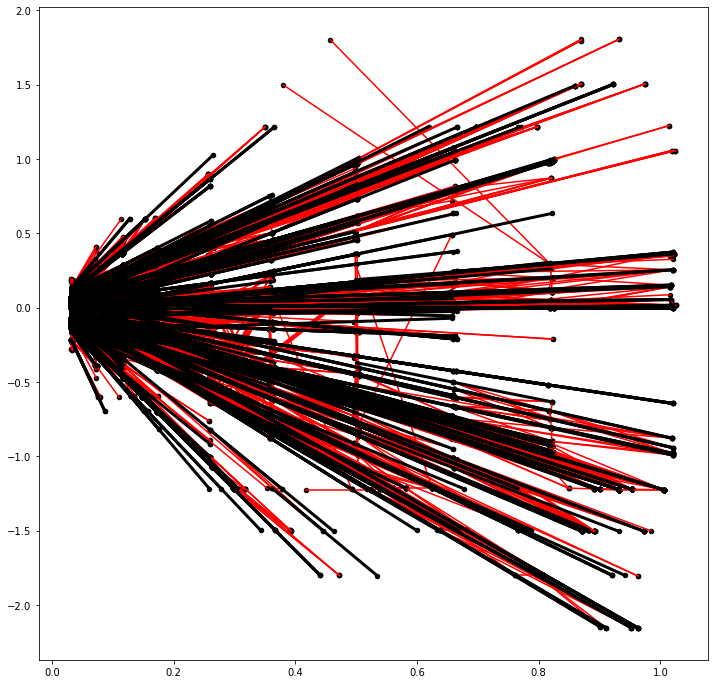

In [43]:
plt.figure(figsize=(12,12))
plt.plot(r[g1], z[g1], c='r' );
plt.plot(r[g1[:, true_g1]], z[g1[:, true_g1]], c='k', linewidth=3 );
plt.scatter(r[g1], z[g1], c='k', s=20);

In [89]:
choose_subgraphs(data, 1, 5)[0].shape[1]

13129

In [78]:
n_steps = np.arange(0, 6)
for n_step in n_steps:
    sizes = []
    for data in model.trainset:
        sizes.append(choose_subgraphs(data, 1, n_step)[0].shape[1])
    print("{} steps has average size: {}".format(n_step, np.mean(sizes)))
    

0 steps has average size: 19.56
1 steps has average size: 352.69
2 steps has average size: 965.01
3 steps has average size: 1720.83
4 steps has average size: 2893.992
5 steps has average size: 3637.878


In [35]:
np.mean(sizes)

1828.16

In [33]:
np.mean(sizes)

2568.86

### Two-graph Test

In [37]:
%%time
g1, g2 = choose_subgraphs(data, 1, 2)

ValueError: not enough values to unpack (expected 2, got 1)

In [35]:
r, phi, z = data.x.T
pid = data.pid
true_g1 = (pid[g1[0]] == pid[g1[1]])
true_g2 = (pid[g2[0]] == pid[g2[1]])

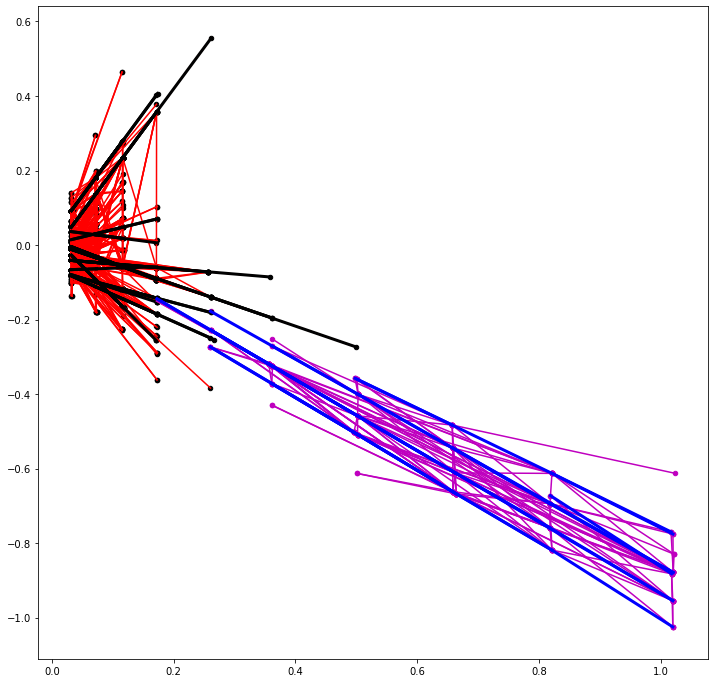

In [17]:
plt.figure(figsize=(12,12))
plt.plot(r[g1], z[g1], c='r' );
plt.plot(r[g1[:, true_g1]], z[g1[:, true_g1]], c='k', linewidth=3 );
plt.plot(r[g2], z[g2], c='m');
plt.plot(r[g2[:, true_g2]], z[g2[:, true_g2]], c='b' , linewidth=3);
plt.scatter(r[g2], z[g2], c='m', s=20);
plt.scatter(r[g1], z[g1], c='k', s=20);

In [18]:
g1.shape, g2.shape

(torch.Size([2, 990]), torch.Size([2, 146]))

### Build Dataset

In [10]:
def construct_downstream(batch, pl_module, datatype, iterations=1):

    data = copy.deepcopy(batch)
    
    # Remove big truth graphs, for quick loading!
    data.layerless_true_triplets=None 
    data.layerless_true_edges=None 
    data.layers=None
#     data.pid_true_edges=None 
    data.pid_true_triplets=None 
    data.true_weights=None 
    data.weights=None
    data.y=None
    
    for i in range(iterations):
        
        data.sub_edge_index = torch.cat(choose_subgraphs(batch, n_subgraphs=1, walk=4))
        save_downstream(data, pl_module, datatype, i)

def save_downstream(batch, pl_module, datatype, iteration=0):

    with open(os.path.join(output_dir, datatype, batch.event_file[-4:]+"_"+str(iteration)), 'wb') as pickle_file:
        torch.save(batch, pickle_file)

    logging.info("Saved event {} with size {}".format(batch.event_file[-4:], batch.sub_edge_index.shape))

In [11]:
output_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/embedding_processed/toy_datasets/case_A4"

In [12]:
datatypes = ["train", "val", "test"]
overwrite = True
os.makedirs(output_dir, exist_ok=True)
[os.makedirs(os.path.join(output_dir, datatype), exist_ok=True) for datatype in datatypes]

[None, None, None]

In [ ]:
# By default, the set of examples propagated through the pipeline will be train+val+test set
datasets = {"train": model.trainset, "val": model.valset, "test": model.testset}
total_length = sum([len(dataset) for dataset in datasets.values()])
batch_incr = 0
model.eval()
with torch.no_grad():
    for set_idx, (datatype, dataset) in enumerate(datasets.items()):
        for batch_idx, batch in enumerate(dataset):
            percent = (batch_incr / total_length) * 100
            sys.stdout.flush()
            sys.stdout.write(f'{percent:.01f}% inference complete \r')
            if (not os.path.exists(os.path.join(output_dir, datatype, batch.event_file[-4:]))) or overwrite:
                batch_to_save = copy.deepcopy(batch)
                batch_to_save = batch_to_save.to(model.device) #Is this step necessary??
                construct_downstream(batch_to_save, model, datatype, iterations=10)                      

            batch_incr += 1

INFO:root:Saved event 1000 with size torch.Size([2, 5070])
INFO:root:Saved event 1000 with size torch.Size([2, 2406])
INFO:root:Saved event 1000 with size torch.Size([2, 250])
INFO:root:Saved event 1000 with size torch.Size([2, 4535])
INFO:root:Saved event 1000 with size torch.Size([2, 4250])
INFO:root:Saved event 1000 with size torch.Size([2, 3862])
INFO:root:Saved event 1000 with size torch.Size([2, 8276])
INFO:root:Saved event 1000 with size torch.Size([2, 6262])
INFO:root:Saved event 1000 with size torch.Size([2, 11914])
INFO:root:Saved event 1000 with size torch.Size([2, 5035])


INFO:root:Saved event 1001 with size torch.Size([2, 2684])
INFO:root:Saved event 1001 with size torch.Size([2, 4637])
INFO:root:Saved event 1001 with size torch.Size([2, 4880])
INFO:root:Saved event 1001 with size torch.Size([2, 401])
INFO:root:Saved event 1001 with size torch.Size([2, 3269])
INFO:root:Saved event 1001 with size torch.Size([2, 9165])
INFO:root:Saved event 1001 with size torch.Size([2, 4963])
INFO:root:Saved event 1001 with size torch.Size([2, 1436])
INFO:root:Saved event 1001 with size torch.Size([2, 348])
INFO:root:Saved event 1001 with size torch.Size([2, 128])


INFO:root:Saved event 1002 with size torch.Size([2, 4878])
INFO:root:Saved event 1002 with size torch.Size([2, 4977])
INFO:root:Saved event 1002 with size torch.Size([2, 5335])
INFO:root:Saved event 1002 with size torch.Size([2, 66])
INFO:root:Saved event 1002 with size torch.Size([2, 2805])
INFO:root:Saved event 1002 with size torch.Size([2, 548])
INFO:root:Saved event 1002 with size torch.Size([2, 4061])
INFO:root:Saved event 1002 with size torch.Size([2, 5981])
INFO:root:Saved event 1002 with size torch.Size([2, 7953])
INFO:root:Saved event 1002 with size torch.Size([2, 4276])


INFO:root:Saved event 1004 with size torch.Size([2, 495])
INFO:root:Saved event 1004 with size torch.Size([2, 5196])
INFO:root:Saved event 1004 with size torch.Size([2, 4892])
INFO:root:Saved event 1004 with size torch.Size([2, 4474])
INFO:root:Saved event 1004 with size torch.Size([2, 2136])
INFO:root:Saved event 1004 with size torch.Size([2, 1517])
INFO:root:Saved event 1004 with size torch.Size([2, 1340])
INFO:root:Saved event 1004 with size torch.Size([2, 42])
INFO:root:Saved event 1004 with size torch.Size([2, 485])
INFO:root:Saved event 1004 with size torch.Size([2, 2212])
INFO:root:Saved event 1005 with size torch.Size([2, 70])


INFO:root:Saved event 1005 with size torch.Size([2, 1049])
INFO:root:Saved event 1005 with size torch.Size([2, 307])
INFO:root:Saved event 1005 with size torch.Size([2, 361])
INFO:root:Saved event 1005 with size torch.Size([2, 2680])
INFO:root:Saved event 1005 with size torch.Size([2, 382])
INFO:root:Saved event 1005 with size torch.Size([2, 2604])
INFO:root:Saved event 1005 with size torch.Size([2, 352])
INFO:root:Saved event 1005 with size torch.Size([2, 3070])
INFO:root:Saved event 1005 with size torch.Size([2, 36])
INFO:root:Saved event 1006 with size torch.Size([2, 3873])


INFO:root:Saved event 1006 with size torch.Size([2, 1114])
INFO:root:Saved event 1006 with size torch.Size([2, 400])
INFO:root:Saved event 1006 with size torch.Size([2, 4878])
INFO:root:Saved event 1006 with size torch.Size([2, 1836])
INFO:root:Saved event 1006 with size torch.Size([2, 2291])
INFO:root:Saved event 1006 with size torch.Size([2, 7058])
INFO:root:Saved event 1006 with size torch.Size([2, 2741])
INFO:root:Saved event 1006 with size torch.Size([2, 1073])
INFO:root:Saved event 1006 with size torch.Size([2, 3617])
INFO:root:Saved event 1007 with size torch.Size([2, 87])


INFO:root:Saved event 1007 with size torch.Size([2, 2651])
INFO:root:Saved event 1007 with size torch.Size([2, 5149])
INFO:root:Saved event 1007 with size torch.Size([2, 3218])
INFO:root:Saved event 1007 with size torch.Size([2, 671])
INFO:root:Saved event 1007 with size torch.Size([2, 6910])
INFO:root:Saved event 1007 with size torch.Size([2, 5707])
INFO:root:Saved event 1007 with size torch.Size([2, 2627])
INFO:root:Saved event 1007 with size torch.Size([2, 7607])
INFO:root:Saved event 1007 with size torch.Size([2, 4661])


INFO:root:Saved event 1008 with size torch.Size([2, 347])
INFO:root:Saved event 1008 with size torch.Size([2, 2488])
INFO:root:Saved event 1008 with size torch.Size([2, 9931])
INFO:root:Saved event 1008 with size torch.Size([2, 2185])
INFO:root:Saved event 1008 with size torch.Size([2, 1065])
INFO:root:Saved event 1008 with size torch.Size([2, 52])
INFO:root:Saved event 1008 with size torch.Size([2, 8928])
INFO:root:Saved event 1008 with size torch.Size([2, 44])
INFO:root:Saved event 1008 with size torch.Size([2, 4215])
INFO:root:Saved event 1008 with size torch.Size([2, 4484])
INFO:root:Saved event 1009 with size torch.Size([2, 57])


INFO:root:Saved event 1009 with size torch.Size([2, 408])
INFO:root:Saved event 1009 with size torch.Size([2, 5016])
INFO:root:Saved event 1009 with size torch.Size([2, 4878])
INFO:root:Saved event 1009 with size torch.Size([2, 1397])
INFO:root:Saved event 1009 with size torch.Size([2, 189])
INFO:root:Saved event 1009 with size torch.Size([2, 201])
INFO:root:Saved event 1009 with size torch.Size([2, 3206])
INFO:root:Saved event 1009 with size torch.Size([2, 7813])
INFO:root:Saved event 1009 with size torch.Size([2, 5349])
INFO:root:Saved event 1011 with size torch.Size([2, 2774])


INFO:root:Saved event 1011 with size torch.Size([2, 3288])
INFO:root:Saved event 1011 with size torch.Size([2, 201])
INFO:root:Saved event 1011 with size torch.Size([2, 592])
INFO:root:Saved event 1011 with size torch.Size([2, 4016])
INFO:root:Saved event 1011 with size torch.Size([2, 3053])
INFO:root:Saved event 1011 with size torch.Size([2, 4496])
INFO:root:Saved event 1011 with size torch.Size([2, 71])
INFO:root:Saved event 1011 with size torch.Size([2, 1694])
INFO:root:Saved event 1011 with size torch.Size([2, 3466])
INFO:root:Saved event 1012 with size torch.Size([2, 4162])


INFO:root:Saved event 1012 with size torch.Size([2, 3866])
INFO:root:Saved event 1012 with size torch.Size([2, 5091])
INFO:root:Saved event 1012 with size torch.Size([2, 4330])
INFO:root:Saved event 1012 with size torch.Size([2, 1158])
INFO:root:Saved event 1012 with size torch.Size([2, 188])
INFO:root:Saved event 1012 with size torch.Size([2, 4818])
INFO:root:Saved event 1012 with size torch.Size([2, 10690])
INFO:root:Saved event 1012 with size torch.Size([2, 1227])
INFO:root:Saved event 1012 with size torch.Size([2, 10181])


INFO:root:Saved event 1013 with size torch.Size([2, 232])
INFO:root:Saved event 1013 with size torch.Size([2, 9011])
INFO:root:Saved event 1013 with size torch.Size([2, 5428])
INFO:root:Saved event 1013 with size torch.Size([2, 449])
INFO:root:Saved event 1013 with size torch.Size([2, 114])
INFO:root:Saved event 1013 with size torch.Size([2, 7225])
INFO:root:Saved event 1013 with size torch.Size([2, 8186])
INFO:root:Saved event 1013 with size torch.Size([2, 3946])
INFO:root:Saved event 1013 with size torch.Size([2, 7222])
INFO:root:Saved event 1013 with size torch.Size([2, 96])
INFO:root:Saved event 1015 with size torch.Size([2, 154])
INFO:root:Saved event 1015 with size torch.Size([2, 4165])


INFO:root:Saved event 1015 with size torch.Size([2, 2705])
INFO:root:Saved event 1015 with size torch.Size([2, 81])
INFO:root:Saved event 1015 with size torch.Size([2, 440])
INFO:root:Saved event 1015 with size torch.Size([2, 3943])
INFO:root:Saved event 1015 with size torch.Size([2, 1597])
INFO:root:Saved event 1015 with size torch.Size([2, 1204])
INFO:root:Saved event 1015 with size torch.Size([2, 4007])
INFO:root:Saved event 1015 with size torch.Size([2, 696])
INFO:root:Saved event 1016 with size torch.Size([2, 94])


INFO:root:Saved event 1016 with size torch.Size([2, 440])
INFO:root:Saved event 1016 with size torch.Size([2, 726])
INFO:root:Saved event 1016 with size torch.Size([2, 4446])
INFO:root:Saved event 1016 with size torch.Size([2, 148])
INFO:root:Saved event 1016 with size torch.Size([2, 204])
INFO:root:Saved event 1016 with size torch.Size([2, 392])
INFO:root:Saved event 1016 with size torch.Size([2, 4526])
INFO:root:Saved event 1016 with size torch.Size([2, 21])
INFO:root:Saved event 1016 with size torch.Size([2, 4062])
INFO:root:Saved event 1017 with size torch.Size([2, 5445])


INFO:root:Saved event 1017 with size torch.Size([2, 230])
INFO:root:Saved event 1017 with size torch.Size([2, 8455])
INFO:root:Saved event 1017 with size torch.Size([2, 8032])
INFO:root:Saved event 1017 with size torch.Size([2, 7619])
INFO:root:Saved event 1017 with size torch.Size([2, 6384])
INFO:root:Saved event 1017 with size torch.Size([2, 5621])
INFO:root:Saved event 1017 with size torch.Size([2, 598])
INFO:root:Saved event 1017 with size torch.Size([2, 3479])
INFO:root:Saved event 1017 with size torch.Size([2, 628])


INFO:root:Saved event 1018 with size torch.Size([2, 39])
INFO:root:Saved event 1018 with size torch.Size([2, 511])
INFO:root:Saved event 1018 with size torch.Size([2, 19])
INFO:root:Saved event 1018 with size torch.Size([2, 2085])
INFO:root:Saved event 1018 with size torch.Size([2, 2295])
INFO:root:Saved event 1018 with size torch.Size([2, 1049])
INFO:root:Saved event 1018 with size torch.Size([2, 92])
INFO:root:Saved event 1018 with size torch.Size([2, 2858])
INFO:root:Saved event 1018 with size torch.Size([2, 3725])
INFO:root:Saved event 1018 with size torch.Size([2, 32])
INFO:root:Saved event 1019 with size torch.Size([2, 161])


INFO:root:Saved event 1019 with size torch.Size([2, 220])
INFO:root:Saved event 1019 with size torch.Size([2, 2792])
INFO:root:Saved event 1019 with size torch.Size([2, 164])
INFO:root:Saved event 1019 with size torch.Size([2, 1113])
INFO:root:Saved event 1019 with size torch.Size([2, 1564])
INFO:root:Saved event 1019 with size torch.Size([2, 544])
INFO:root:Saved event 1019 with size torch.Size([2, 1642])
INFO:root:Saved event 1019 with size torch.Size([2, 1536])
INFO:root:Saved event 1019 with size torch.Size([2, 455])
INFO:root:Saved event 1020 with size torch.Size([2, 935])


INFO:root:Saved event 1020 with size torch.Size([2, 1763])
INFO:root:Saved event 1020 with size torch.Size([2, 1219])
INFO:root:Saved event 1020 with size torch.Size([2, 2028])
INFO:root:Saved event 1020 with size torch.Size([2, 1735])
INFO:root:Saved event 1020 with size torch.Size([2, 1825])
INFO:root:Saved event 1020 with size torch.Size([2, 773])
INFO:root:Saved event 1020 with size torch.Size([2, 620])
INFO:root:Saved event 1020 with size torch.Size([2, 2894])
INFO:root:Saved event 1020 with size torch.Size([2, 2277])
INFO:root:Saved event 1021 with size torch.Size([2, 1821])


INFO:root:Saved event 1021 with size torch.Size([2, 2637])
INFO:root:Saved event 1021 with size torch.Size([2, 2549])
INFO:root:Saved event 1021 with size torch.Size([2, 2120])
INFO:root:Saved event 1021 with size torch.Size([2, 7864])
INFO:root:Saved event 1021 with size torch.Size([2, 7087])
INFO:root:Saved event 1021 with size torch.Size([2, 1843])
INFO:root:Saved event 1021 with size torch.Size([2, 4750])
INFO:root:Saved event 1021 with size torch.Size([2, 2919])
INFO:root:Saved event 1021 with size torch.Size([2, 589])
INFO:root:Saved event 1022 with size torch.Size([2, 71])


INFO:root:Saved event 1022 with size torch.Size([2, 4456])
INFO:root:Saved event 1022 with size torch.Size([2, 195])
INFO:root:Saved event 1022 with size torch.Size([2, 1713])
INFO:root:Saved event 1022 with size torch.Size([2, 99])
INFO:root:Saved event 1022 with size torch.Size([2, 4834])
INFO:root:Saved event 1022 with size torch.Size([2, 176])
INFO:root:Saved event 1022 with size torch.Size([2, 4367])
INFO:root:Saved event 1022 with size torch.Size([2, 3940])
INFO:root:Saved event 1022 with size torch.Size([2, 4874])
INFO:root:Saved event 1023 with size torch.Size([2, 85])


INFO:root:Saved event 1023 with size torch.Size([2, 3414])
INFO:root:Saved event 1023 with size torch.Size([2, 4284])
INFO:root:Saved event 1023 with size torch.Size([2, 11214])
INFO:root:Saved event 1023 with size torch.Size([2, 4895])
INFO:root:Saved event 1023 with size torch.Size([2, 253])
INFO:root:Saved event 1023 with size torch.Size([2, 4851])
INFO:root:Saved event 1023 with size torch.Size([2, 817])
INFO:root:Saved event 1023 with size torch.Size([2, 6805])
INFO:root:Saved event 1023 with size torch.Size([2, 3973])
INFO:root:Saved event 1025 with size torch.Size([2, 1259])


INFO:root:Saved event 1025 with size torch.Size([2, 78])
INFO:root:Saved event 1025 with size torch.Size([2, 5793])
INFO:root:Saved event 1025 with size torch.Size([2, 4931])
INFO:root:Saved event 1025 with size torch.Size([2, 1509])
INFO:root:Saved event 1025 with size torch.Size([2, 5751])
INFO:root:Saved event 1025 with size torch.Size([2, 4999])
INFO:root:Saved event 1025 with size torch.Size([2, 509])
INFO:root:Saved event 1025 with size torch.Size([2, 5502])
INFO:root:Saved event 1025 with size torch.Size([2, 146])


INFO:root:Saved event 1026 with size torch.Size([2, 2304])
INFO:root:Saved event 1026 with size torch.Size([2, 3531])
INFO:root:Saved event 1026 with size torch.Size([2, 228])
INFO:root:Saved event 1026 with size torch.Size([2, 246])
INFO:root:Saved event 1026 with size torch.Size([2, 5919])
INFO:root:Saved event 1026 with size torch.Size([2, 2096])
INFO:root:Saved event 1026 with size torch.Size([2, 353])
INFO:root:Saved event 1026 with size torch.Size([2, 2267])
INFO:root:Saved event 1026 with size torch.Size([2, 3424])
INFO:root:Saved event 1026 with size torch.Size([2, 123])


INFO:root:Saved event 1027 with size torch.Size([2, 1571])
INFO:root:Saved event 1027 with size torch.Size([2, 932])
INFO:root:Saved event 1027 with size torch.Size([2, 405])
INFO:root:Saved event 1027 with size torch.Size([2, 1728])
INFO:root:Saved event 1027 with size torch.Size([2, 4121])
INFO:root:Saved event 1027 with size torch.Size([2, 381])
INFO:root:Saved event 1027 with size torch.Size([2, 7130])
INFO:root:Saved event 1027 with size torch.Size([2, 136])
INFO:root:Saved event 1027 with size torch.Size([2, 405])
INFO:root:Saved event 1027 with size torch.Size([2, 641])


INFO:root:Saved event 1028 with size torch.Size([2, 1408])
INFO:root:Saved event 1028 with size torch.Size([2, 3817])
INFO:root:Saved event 1028 with size torch.Size([2, 4823])
INFO:root:Saved event 1028 with size torch.Size([2, 8243])
INFO:root:Saved event 1028 with size torch.Size([2, 7917])
INFO:root:Saved event 1028 with size torch.Size([2, 2432])
INFO:root:Saved event 1028 with size torch.Size([2, 5262])
INFO:root:Saved event 1028 with size torch.Size([2, 250])
INFO:root:Saved event 1028 with size torch.Size([2, 3889])
INFO:root:Saved event 1028 with size torch.Size([2, 4043])
INFO:root:Saved event 1029 with size torch.Size([2, 5006])


INFO:root:Saved event 1029 with size torch.Size([2, 2990])
INFO:root:Saved event 1029 with size torch.Size([2, 3983])
INFO:root:Saved event 1029 with size torch.Size([2, 4806])
INFO:root:Saved event 1029 with size torch.Size([2, 1007])
INFO:root:Saved event 1029 with size torch.Size([2, 3765])
INFO:root:Saved event 1029 with size torch.Size([2, 5370])
INFO:root:Saved event 1029 with size torch.Size([2, 305])
INFO:root:Saved event 1029 with size torch.Size([2, 3849])
INFO:root:Saved event 1029 with size torch.Size([2, 5583])
INFO:root:Saved event 1030 with size torch.Size([2, 541])


INFO:root:Saved event 1030 with size torch.Size([2, 6489])
INFO:root:Saved event 1030 with size torch.Size([2, 2410])
INFO:root:Saved event 1030 with size torch.Size([2, 6391])
INFO:root:Saved event 1030 with size torch.Size([2, 3781])
INFO:root:Saved event 1030 with size torch.Size([2, 4435])
INFO:root:Saved event 1030 with size torch.Size([2, 1038])
INFO:root:Saved event 1030 with size torch.Size([2, 2467])
INFO:root:Saved event 1030 with size torch.Size([2, 5475])
INFO:root:Saved event 1030 with size torch.Size([2, 3061])
INFO:root:Saved event 1031 with size torch.Size([2, 2002])


INFO:root:Saved event 1031 with size torch.Size([2, 1523])
INFO:root:Saved event 1031 with size torch.Size([2, 71])
INFO:root:Saved event 1031 with size torch.Size([2, 4667])
INFO:root:Saved event 1031 with size torch.Size([2, 169])
INFO:root:Saved event 1031 with size torch.Size([2, 3136])
INFO:root:Saved event 1031 with size torch.Size([2, 2877])
INFO:root:Saved event 1031 with size torch.Size([2, 1123])
INFO:root:Saved event 1031 with size torch.Size([2, 900])
INFO:root:Saved event 1031 with size torch.Size([2, 1934])
INFO:root:Saved event 1032 with size torch.Size([2, 2940])


INFO:root:Saved event 1032 with size torch.Size([2, 4180])
INFO:root:Saved event 1032 with size torch.Size([2, 1290])
INFO:root:Saved event 1032 with size torch.Size([2, 1287])
INFO:root:Saved event 1032 with size torch.Size([2, 2652])
INFO:root:Saved event 1032 with size torch.Size([2, 1857])
INFO:root:Saved event 1032 with size torch.Size([2, 5954])
INFO:root:Saved event 1032 with size torch.Size([2, 1708])
INFO:root:Saved event 1032 with size torch.Size([2, 250])
INFO:root:Saved event 1032 with size torch.Size([2, 5115])
INFO:root:Saved event 1033 with size torch.Size([2, 2013])


INFO:root:Saved event 1033 with size torch.Size([2, 3582])
INFO:root:Saved event 1033 with size torch.Size([2, 4671])
INFO:root:Saved event 1033 with size torch.Size([2, 377])
INFO:root:Saved event 1033 with size torch.Size([2, 4183])
INFO:root:Saved event 1033 with size torch.Size([2, 5155])
INFO:root:Saved event 1033 with size torch.Size([2, 2791])
INFO:root:Saved event 1033 with size torch.Size([2, 594])
INFO:root:Saved event 1033 with size torch.Size([2, 3774])
INFO:root:Saved event 1033 with size torch.Size([2, 67])


INFO:root:Saved event 1034 with size torch.Size([2, 744])
INFO:root:Saved event 1034 with size torch.Size([2, 4498])
INFO:root:Saved event 1034 with size torch.Size([2, 283])
INFO:root:Saved event 1034 with size torch.Size([2, 21])
INFO:root:Saved event 1034 with size torch.Size([2, 1470])
INFO:root:Saved event 1034 with size torch.Size([2, 4655])
INFO:root:Saved event 1034 with size torch.Size([2, 1833])
INFO:root:Saved event 1034 with size torch.Size([2, 5662])
INFO:root:Saved event 1034 with size torch.Size([2, 1335])
INFO:root:Saved event 1034 with size torch.Size([2, 1788])


INFO:root:Saved event 1035 with size torch.Size([2, 8168])
INFO:root:Saved event 1035 with size torch.Size([2, 561])
INFO:root:Saved event 1035 with size torch.Size([2, 6170])
INFO:root:Saved event 1035 with size torch.Size([2, 7996])
INFO:root:Saved event 1035 with size torch.Size([2, 231])
INFO:root:Saved event 1035 with size torch.Size([2, 4231])
INFO:root:Saved event 1035 with size torch.Size([2, 463])
INFO:root:Saved event 1035 with size torch.Size([2, 198])
INFO:root:Saved event 1035 with size torch.Size([2, 5761])
INFO:root:Saved event 1035 with size torch.Size([2, 2959])
INFO:root:Saved event 1036 with size torch.Size([2, 4328])


INFO:root:Saved event 1036 with size torch.Size([2, 1899])
INFO:root:Saved event 1036 with size torch.Size([2, 3080])
INFO:root:Saved event 1036 with size torch.Size([2, 2958])
INFO:root:Saved event 1036 with size torch.Size([2, 177])
INFO:root:Saved event 1036 with size torch.Size([2, 506])
INFO:root:Saved event 1036 with size torch.Size([2, 218])
INFO:root:Saved event 1036 with size torch.Size([2, 3648])
INFO:root:Saved event 1036 with size torch.Size([2, 4847])
INFO:root:Saved event 1036 with size torch.Size([2, 231])
INFO:root:Saved event 1037 with size torch.Size([2, 588])


INFO:root:Saved event 1037 with size torch.Size([2, 707])
INFO:root:Saved event 1037 with size torch.Size([2, 224])
INFO:root:Saved event 1037 with size torch.Size([2, 10183])
INFO:root:Saved event 1037 with size torch.Size([2, 5184])
INFO:root:Saved event 1037 with size torch.Size([2, 1762])
INFO:root:Saved event 1037 with size torch.Size([2, 4417])
INFO:root:Saved event 1037 with size torch.Size([2, 5783])
INFO:root:Saved event 1037 with size torch.Size([2, 3290])
INFO:root:Saved event 1037 with size torch.Size([2, 6591])
INFO:root:Saved event 1039 with size torch.Size([2, 2896])


INFO:root:Saved event 1039 with size torch.Size([2, 32])
INFO:root:Saved event 1039 with size torch.Size([2, 356])
INFO:root:Saved event 1039 with size torch.Size([2, 36])
INFO:root:Saved event 1039 with size torch.Size([2, 5299])
INFO:root:Saved event 1039 with size torch.Size([2, 2109])
INFO:root:Saved event 1039 with size torch.Size([2, 234])
INFO:root:Saved event 1039 with size torch.Size([2, 4471])
INFO:root:Saved event 1039 with size torch.Size([2, 790])
INFO:root:Saved event 1039 with size torch.Size([2, 7332])
INFO:root:Saved event 1040 with size torch.Size([2, 5843])


INFO:root:Saved event 1040 with size torch.Size([2, 2841])
INFO:root:Saved event 1040 with size torch.Size([2, 6157])
INFO:root:Saved event 1040 with size torch.Size([2, 4274])
INFO:root:Saved event 1040 with size torch.Size([2, 5134])
INFO:root:Saved event 1040 with size torch.Size([2, 3983])
INFO:root:Saved event 1040 with size torch.Size([2, 178])
INFO:root:Saved event 1040 with size torch.Size([2, 1474])
INFO:root:Saved event 1040 with size torch.Size([2, 237])
INFO:root:Saved event 1040 with size torch.Size([2, 6346])
INFO:root:Saved event 1041 with size torch.Size([2, 135])


INFO:root:Saved event 1041 with size torch.Size([2, 179])
INFO:root:Saved event 1041 with size torch.Size([2, 338])
INFO:root:Saved event 1041 with size torch.Size([2, 279])
INFO:root:Saved event 1041 with size torch.Size([2, 885])
INFO:root:Saved event 1041 with size torch.Size([2, 555])
INFO:root:Saved event 1041 with size torch.Size([2, 3516])
INFO:root:Saved event 1041 with size torch.Size([2, 253])
INFO:root:Saved event 1041 with size torch.Size([2, 3422])
INFO:root:Saved event 1041 with size torch.Size([2, 2230])


INFO:root:Saved event 1042 with size torch.Size([2, 9936])
INFO:root:Saved event 1042 with size torch.Size([2, 8266])
INFO:root:Saved event 1042 with size torch.Size([2, 1319])
INFO:root:Saved event 1042 with size torch.Size([2, 5612])
INFO:root:Saved event 1042 with size torch.Size([2, 4459])
INFO:root:Saved event 1042 with size torch.Size([2, 7470])
INFO:root:Saved event 1042 with size torch.Size([2, 319])
INFO:root:Saved event 1042 with size torch.Size([2, 144])
INFO:root:Saved event 1042 with size torch.Size([2, 9605])
INFO:root:Saved event 1042 with size torch.Size([2, 4745])
INFO:root:Saved event 1043 with size torch.Size([2, 1])


INFO:root:Saved event 1043 with size torch.Size([2, 4042])
INFO:root:Saved event 1043 with size torch.Size([2, 3684])
INFO:root:Saved event 1043 with size torch.Size([2, 24])
INFO:root:Saved event 1043 with size torch.Size([2, 67])
INFO:root:Saved event 1043 with size torch.Size([2, 5301])
INFO:root:Saved event 1043 with size torch.Size([2, 8047])
INFO:root:Saved event 1043 with size torch.Size([2, 3970])
INFO:root:Saved event 1043 with size torch.Size([2, 3598])
INFO:root:Saved event 1043 with size torch.Size([2, 4190])
INFO:root:Saved event 1044 with size torch.Size([2, 5070])


INFO:root:Saved event 1044 with size torch.Size([2, 2215])
INFO:root:Saved event 1044 with size torch.Size([2, 1103])
INFO:root:Saved event 1044 with size torch.Size([2, 2164])
INFO:root:Saved event 1044 with size torch.Size([2, 71])
INFO:root:Saved event 1044 with size torch.Size([2, 2160])
INFO:root:Saved event 1044 with size torch.Size([2, 824])
INFO:root:Saved event 1044 with size torch.Size([2, 279])
INFO:root:Saved event 1044 with size torch.Size([2, 741])
INFO:root:Saved event 1044 with size torch.Size([2, 561])
INFO:root:Saved event 1045 with size torch.Size([2, 4175])


INFO:root:Saved event 1045 with size torch.Size([2, 1834])
INFO:root:Saved event 1045 with size torch.Size([2, 228])
INFO:root:Saved event 1045 with size torch.Size([2, 557])
INFO:root:Saved event 1045 with size torch.Size([2, 3059])
INFO:root:Saved event 1045 with size torch.Size([2, 3446])
INFO:root:Saved event 1045 with size torch.Size([2, 1260])
INFO:root:Saved event 1045 with size torch.Size([2, 1000])
INFO:root:Saved event 1045 with size torch.Size([2, 860])
INFO:root:Saved event 1045 with size torch.Size([2, 3663])
INFO:root:Saved event 1046 with size torch.Size([2, 253])


INFO:root:Saved event 1046 with size torch.Size([2, 55])
INFO:root:Saved event 1046 with size torch.Size([2, 3244])
INFO:root:Saved event 1046 with size torch.Size([2, 157])
INFO:root:Saved event 1046 with size torch.Size([2, 5912])
INFO:root:Saved event 1046 with size torch.Size([2, 4376])
INFO:root:Saved event 1046 with size torch.Size([2, 3377])
INFO:root:Saved event 1046 with size torch.Size([2, 3199])
INFO:root:Saved event 1046 with size torch.Size([2, 2555])
INFO:root:Saved event 1046 with size torch.Size([2, 5424])


INFO:root:Saved event 1047 with size torch.Size([2, 71])
INFO:root:Saved event 1047 with size torch.Size([2, 2000])
INFO:root:Saved event 1047 with size torch.Size([2, 2004])
INFO:root:Saved event 1047 with size torch.Size([2, 216])
INFO:root:Saved event 1047 with size torch.Size([2, 1034])
INFO:root:Saved event 1047 with size torch.Size([2, 503])
INFO:root:Saved event 1047 with size torch.Size([2, 1751])
INFO:root:Saved event 1047 with size torch.Size([2, 473])
INFO:root:Saved event 1047 with size torch.Size([2, 1826])
INFO:root:Saved event 1047 with size torch.Size([2, 1406])
INFO:root:Saved event 1048 with size torch.Size([2, 307])


INFO:root:Saved event 1048 with size torch.Size([2, 2918])
INFO:root:Saved event 1048 with size torch.Size([2, 215])
INFO:root:Saved event 1048 with size torch.Size([2, 2934])
INFO:root:Saved event 1048 with size torch.Size([2, 1514])
INFO:root:Saved event 1048 with size torch.Size([2, 346])
INFO:root:Saved event 1048 with size torch.Size([2, 3135])
INFO:root:Saved event 1048 with size torch.Size([2, 1831])
INFO:root:Saved event 1048 with size torch.Size([2, 2024])
INFO:root:Saved event 1048 with size torch.Size([2, 141])


INFO:root:Saved event 1049 with size torch.Size([2, 605])
INFO:root:Saved event 1049 with size torch.Size([2, 335])
INFO:root:Saved event 1049 with size torch.Size([2, 7760])
INFO:root:Saved event 1049 with size torch.Size([2, 39])
INFO:root:Saved event 1049 with size torch.Size([2, 248])
INFO:root:Saved event 1049 with size torch.Size([2, 8001])
INFO:root:Saved event 1049 with size torch.Size([2, 905])
INFO:root:Saved event 1049 with size torch.Size([2, 6948])
INFO:root:Saved event 1049 with size torch.Size([2, 423])
INFO:root:Saved event 1049 with size torch.Size([2, 219])


INFO:root:Saved event 1050 with size torch.Size([2, 973])
INFO:root:Saved event 1050 with size torch.Size([2, 2846])
INFO:root:Saved event 1050 with size torch.Size([2, 3256])
INFO:root:Saved event 1050 with size torch.Size([2, 3121])
INFO:root:Saved event 1050 with size torch.Size([2, 2306])
INFO:root:Saved event 1050 with size torch.Size([2, 3166])
INFO:root:Saved event 1050 with size torch.Size([2, 7438])
INFO:root:Saved event 1050 with size torch.Size([2, 6121])
INFO:root:Saved event 1050 with size torch.Size([2, 619])
INFO:root:Saved event 1050 with size torch.Size([2, 3374])


INFO:root:Saved event 1051 with size torch.Size([2, 4104])
INFO:root:Saved event 1051 with size torch.Size([2, 21])
INFO:root:Saved event 1051 with size torch.Size([2, 7801])
INFO:root:Saved event 1051 with size torch.Size([2, 754])
INFO:root:Saved event 1051 with size torch.Size([2, 79])
INFO:root:Saved event 1051 with size torch.Size([2, 454])
INFO:root:Saved event 1051 with size torch.Size([2, 8114])
INFO:root:Saved event 1051 with size torch.Size([2, 271])
INFO:root:Saved event 1051 with size torch.Size([2, 75])
INFO:root:Saved event 1051 with size torch.Size([2, 720])


INFO:root:Saved event 1052 with size torch.Size([2, 270])
INFO:root:Saved event 1052 with size torch.Size([2, 3753])
INFO:root:Saved event 1052 with size torch.Size([2, 4691])
INFO:root:Saved event 1052 with size torch.Size([2, 2696])
INFO:root:Saved event 1052 with size torch.Size([2, 6545])
INFO:root:Saved event 1052 with size torch.Size([2, 4669])
INFO:root:Saved event 1052 with size torch.Size([2, 231])
INFO:root:Saved event 1052 with size torch.Size([2, 3965])
INFO:root:Saved event 1052 with size torch.Size([2, 543])
INFO:root:Saved event 1052 with size torch.Size([2, 4000])
INFO:root:Saved event 1053 with size torch.Size([2, 2684])


INFO:root:Saved event 1053 with size torch.Size([2, 208])
INFO:root:Saved event 1053 with size torch.Size([2, 1482])
INFO:root:Saved event 1053 with size torch.Size([2, 2964])
INFO:root:Saved event 1053 with size torch.Size([2, 54])
INFO:root:Saved event 1053 with size torch.Size([2, 459])
INFO:root:Saved event 1053 with size torch.Size([2, 2938])
INFO:root:Saved event 1053 with size torch.Size([2, 2031])
INFO:root:Saved event 1053 with size torch.Size([2, 2195])
INFO:root:Saved event 1053 with size torch.Size([2, 3504])
INFO:root:Saved event 1054 with size torch.Size([2, 324])


INFO:root:Saved event 1054 with size torch.Size([2, 25])
INFO:root:Saved event 1054 with size torch.Size([2, 3691])
INFO:root:Saved event 1054 with size torch.Size([2, 1951])
INFO:root:Saved event 1054 with size torch.Size([2, 3020])
INFO:root:Saved event 1054 with size torch.Size([2, 7146])
INFO:root:Saved event 1054 with size torch.Size([2, 8724])
INFO:root:Saved event 1054 with size torch.Size([2, 8201])
INFO:root:Saved event 1054 with size torch.Size([2, 3767])
INFO:root:Saved event 1054 with size torch.Size([2, 425])


INFO:root:Saved event 1055 with size torch.Size([2, 545])
INFO:root:Saved event 1055 with size torch.Size([2, 3125])
INFO:root:Saved event 1055 with size torch.Size([2, 3935])
INFO:root:Saved event 1055 with size torch.Size([2, 3194])
INFO:root:Saved event 1055 with size torch.Size([2, 47])
INFO:root:Saved event 1055 with size torch.Size([2, 2389])
INFO:root:Saved event 1055 with size torch.Size([2, 5328])
INFO:root:Saved event 1055 with size torch.Size([2, 3942])
INFO:root:Saved event 1055 with size torch.Size([2, 43])
INFO:root:Saved event 1055 with size torch.Size([2, 353])


INFO:root:Saved event 1056 with size torch.Size([2, 5769])
INFO:root:Saved event 1056 with size torch.Size([2, 6124])
INFO:root:Saved event 1056 with size torch.Size([2, 113])
INFO:root:Saved event 1056 with size torch.Size([2, 1865])
INFO:root:Saved event 1056 with size torch.Size([2, 6064])
INFO:root:Saved event 1056 with size torch.Size([2, 2968])
INFO:root:Saved event 1056 with size torch.Size([2, 3502])
INFO:root:Saved event 1056 with size torch.Size([2, 10])
INFO:root:Saved event 1056 with size torch.Size([2, 1856])
INFO:root:Saved event 1056 with size torch.Size([2, 4971])


INFO:root:Saved event 1058 with size torch.Size([2, 2985])
INFO:root:Saved event 1058 with size torch.Size([2, 1850])
INFO:root:Saved event 1058 with size torch.Size([2, 3243])
INFO:root:Saved event 1058 with size torch.Size([2, 2992])
INFO:root:Saved event 1058 with size torch.Size([2, 4463])
INFO:root:Saved event 1058 with size torch.Size([2, 2252])
INFO:root:Saved event 1058 with size torch.Size([2, 52])
INFO:root:Saved event 1058 with size torch.Size([2, 513])
INFO:root:Saved event 1058 with size torch.Size([2, 562])
INFO:root:Saved event 1058 with size torch.Size([2, 1292])


INFO:root:Saved event 1059 with size torch.Size([2, 36])
INFO:root:Saved event 1059 with size torch.Size([2, 5408])
INFO:root:Saved event 1059 with size torch.Size([2, 276])
INFO:root:Saved event 1059 with size torch.Size([2, 4228])
INFO:root:Saved event 1059 with size torch.Size([2, 3478])
INFO:root:Saved event 1059 with size torch.Size([2, 1214])
INFO:root:Saved event 1059 with size torch.Size([2, 3820])
INFO:root:Saved event 1059 with size torch.Size([2, 5038])
INFO:root:Saved event 1059 with size torch.Size([2, 5947])
INFO:root:Saved event 1059 with size torch.Size([2, 198])


INFO:root:Saved event 1060 with size torch.Size([2, 10010])
INFO:root:Saved event 1060 with size torch.Size([2, 9728])
INFO:root:Saved event 1060 with size torch.Size([2, 1019])
INFO:root:Saved event 1060 with size torch.Size([2, 3721])
INFO:root:Saved event 1060 with size torch.Size([2, 168])
INFO:root:Saved event 1060 with size torch.Size([2, 212])
INFO:root:Saved event 1060 with size torch.Size([2, 8738])
INFO:root:Saved event 1060 with size torch.Size([2, 3999])
INFO:root:Saved event 1060 with size torch.Size([2, 2780])
INFO:root:Saved event 1060 with size torch.Size([2, 1837])
INFO:root:Saved event 1061 with size torch.Size([2, 1325])


INFO:root:Saved event 1061 with size torch.Size([2, 41])
INFO:root:Saved event 1061 with size torch.Size([2, 5984])
INFO:root:Saved event 1061 with size torch.Size([2, 5803])
INFO:root:Saved event 1061 with size torch.Size([2, 5154])
INFO:root:Saved event 1061 with size torch.Size([2, 167])
INFO:root:Saved event 1061 with size torch.Size([2, 4620])
INFO:root:Saved event 1061 with size torch.Size([2, 4183])
INFO:root:Saved event 1061 with size torch.Size([2, 108])
INFO:root:Saved event 1061 with size torch.Size([2, 1935])


INFO:root:Saved event 1062 with size torch.Size([2, 8643])
INFO:root:Saved event 1062 with size torch.Size([2, 2523])
INFO:root:Saved event 1062 with size torch.Size([2, 1163])
INFO:root:Saved event 1062 with size torch.Size([2, 1282])
INFO:root:Saved event 1062 with size torch.Size([2, 4930])
INFO:root:Saved event 1062 with size torch.Size([2, 1163])
INFO:root:Saved event 1062 with size torch.Size([2, 1407])
INFO:root:Saved event 1062 with size torch.Size([2, 7578])
INFO:root:Saved event 1062 with size torch.Size([2, 31])
INFO:root:Saved event 1062 with size torch.Size([2, 2209])


INFO:root:Saved event 1063 with size torch.Size([2, 1550])
INFO:root:Saved event 1063 with size torch.Size([2, 1646])
INFO:root:Saved event 1063 with size torch.Size([2, 6219])
INFO:root:Saved event 1063 with size torch.Size([2, 1433])
INFO:root:Saved event 1063 with size torch.Size([2, 4033])
INFO:root:Saved event 1063 with size torch.Size([2, 167])
INFO:root:Saved event 1063 with size torch.Size([2, 1963])
INFO:root:Saved event 1063 with size torch.Size([2, 3599])
INFO:root:Saved event 1063 with size torch.Size([2, 1481])
INFO:root:Saved event 1063 with size torch.Size([2, 3324])
INFO:root:Saved event 1064 with size torch.Size([2, 1439])


INFO:root:Saved event 1064 with size torch.Size([2, 2722])
INFO:root:Saved event 1064 with size torch.Size([2, 3662])
INFO:root:Saved event 1064 with size torch.Size([2, 1583])
INFO:root:Saved event 1064 with size torch.Size([2, 4170])
INFO:root:Saved event 1064 with size torch.Size([2, 202])
INFO:root:Saved event 1064 with size torch.Size([2, 1375])
INFO:root:Saved event 1064 with size torch.Size([2, 3748])
INFO:root:Saved event 1064 with size torch.Size([2, 1198])
INFO:root:Saved event 1064 with size torch.Size([2, 3056])
INFO:root:Saved event 1065 with size torch.Size([2, 173])


INFO:root:Saved event 1065 with size torch.Size([2, 4868])
INFO:root:Saved event 1065 with size torch.Size([2, 2334])
INFO:root:Saved event 1065 with size torch.Size([2, 1601])
INFO:root:Saved event 1065 with size torch.Size([2, 2072])
INFO:root:Saved event 1065 with size torch.Size([2, 1496])
INFO:root:Saved event 1065 with size torch.Size([2, 2124])
INFO:root:Saved event 1065 with size torch.Size([2, 4423])
INFO:root:Saved event 1065 with size torch.Size([2, 3229])
INFO:root:Saved event 1065 with size torch.Size([2, 2727])


INFO:root:Saved event 1066 with size torch.Size([2, 3325])
INFO:root:Saved event 1066 with size torch.Size([2, 984])
INFO:root:Saved event 1066 with size torch.Size([2, 440])
INFO:root:Saved event 1066 with size torch.Size([2, 537])
INFO:root:Saved event 1066 with size torch.Size([2, 6756])
INFO:root:Saved event 1066 with size torch.Size([2, 611])
INFO:root:Saved event 1066 with size torch.Size([2, 5813])
INFO:root:Saved event 1066 with size torch.Size([2, 4165])
INFO:root:Saved event 1066 with size torch.Size([2, 622])
INFO:root:Saved event 1066 with size torch.Size([2, 2509])
INFO:root:Saved event 1067 with size torch.Size([2, 6972])


INFO:root:Saved event 1067 with size torch.Size([2, 786])
INFO:root:Saved event 1067 with size torch.Size([2, 163])
INFO:root:Saved event 1067 with size torch.Size([2, 1231])
INFO:root:Saved event 1067 with size torch.Size([2, 4437])
INFO:root:Saved event 1067 with size torch.Size([2, 3624])
INFO:root:Saved event 1067 with size torch.Size([2, 8642])
INFO:root:Saved event 1067 with size torch.Size([2, 216])
INFO:root:Saved event 1067 with size torch.Size([2, 4235])
INFO:root:Saved event 1067 with size torch.Size([2, 2128])
INFO:root:Saved event 1068 with size torch.Size([2, 1525])


INFO:root:Saved event 1068 with size torch.Size([2, 89])
INFO:root:Saved event 1068 with size torch.Size([2, 3000])
INFO:root:Saved event 1068 with size torch.Size([2, 1447])
INFO:root:Saved event 1068 with size torch.Size([2, 75])
INFO:root:Saved event 1068 with size torch.Size([2, 135])
INFO:root:Saved event 1068 with size torch.Size([2, 1125])
INFO:root:Saved event 1068 with size torch.Size([2, 3683])
INFO:root:Saved event 1068 with size torch.Size([2, 88])
INFO:root:Saved event 1068 with size torch.Size([2, 438])
INFO:root:Saved event 1069 with size torch.Size([2, 158])


INFO:root:Saved event 1069 with size torch.Size([2, 1528])
INFO:root:Saved event 1069 with size torch.Size([2, 952])
INFO:root:Saved event 1069 with size torch.Size([2, 689])
INFO:root:Saved event 1069 with size torch.Size([2, 235])
INFO:root:Saved event 1069 with size torch.Size([2, 3446])
INFO:root:Saved event 1069 with size torch.Size([2, 55])
INFO:root:Saved event 1069 with size torch.Size([2, 605])
INFO:root:Saved event 1069 with size torch.Size([2, 4823])
INFO:root:Saved event 1069 with size torch.Size([2, 1737])
INFO:root:Saved event 1070 with size torch.Size([2, 102])


INFO:root:Saved event 1070 with size torch.Size([2, 968])
INFO:root:Saved event 1070 with size torch.Size([2, 1769])
INFO:root:Saved event 1070 with size torch.Size([2, 459])
INFO:root:Saved event 1070 with size torch.Size([2, 114])
INFO:root:Saved event 1070 with size torch.Size([2, 1875])
INFO:root:Saved event 1070 with size torch.Size([2, 2064])
INFO:root:Saved event 1070 with size torch.Size([2, 57])
INFO:root:Saved event 1070 with size torch.Size([2, 41])
INFO:root:Saved event 1070 with size torch.Size([2, 1548])
INFO:root:Saved event 1071 with size torch.Size([2, 4341])


INFO:root:Saved event 1071 with size torch.Size([2, 4761])
INFO:root:Saved event 1071 with size torch.Size([2, 2440])
INFO:root:Saved event 1071 with size torch.Size([2, 270])
INFO:root:Saved event 1071 with size torch.Size([2, 4167])
INFO:root:Saved event 1071 with size torch.Size([2, 3706])
INFO:root:Saved event 1071 with size torch.Size([2, 10917])
INFO:root:Saved event 1071 with size torch.Size([2, 927])
INFO:root:Saved event 1071 with size torch.Size([2, 488])
INFO:root:Saved event 1071 with size torch.Size([2, 1616])


INFO:root:Saved event 1073 with size torch.Size([2, 3865])
INFO:root:Saved event 1073 with size torch.Size([2, 4093])
INFO:root:Saved event 1073 with size torch.Size([2, 411])
INFO:root:Saved event 1073 with size torch.Size([2, 871])
INFO:root:Saved event 1073 with size torch.Size([2, 1708])
INFO:root:Saved event 1073 with size torch.Size([2, 4167])
INFO:root:Saved event 1073 with size torch.Size([2, 3527])
INFO:root:Saved event 1073 with size torch.Size([2, 431])
INFO:root:Saved event 1073 with size torch.Size([2, 314])
INFO:root:Saved event 1073 with size torch.Size([2, 3204])
INFO:root:Saved event 1074 with size torch.Size([2, 7665])


INFO:root:Saved event 1074 with size torch.Size([2, 329])
INFO:root:Saved event 1074 with size torch.Size([2, 85])
INFO:root:Saved event 1074 with size torch.Size([2, 2697])
INFO:root:Saved event 1074 with size torch.Size([2, 9863])
INFO:root:Saved event 1074 with size torch.Size([2, 737])
INFO:root:Saved event 1074 with size torch.Size([2, 2714])
INFO:root:Saved event 1074 with size torch.Size([2, 5093])
INFO:root:Saved event 1074 with size torch.Size([2, 6572])
INFO:root:Saved event 1074 with size torch.Size([2, 125])
INFO:root:Saved event 1075 with size torch.Size([2, 226])


INFO:root:Saved event 1075 with size torch.Size([2, 1051])
INFO:root:Saved event 1075 with size torch.Size([2, 81])
INFO:root:Saved event 1075 with size torch.Size([2, 4894])
INFO:root:Saved event 1075 with size torch.Size([2, 57])
INFO:root:Saved event 1075 with size torch.Size([2, 5880])
INFO:root:Saved event 1075 with size torch.Size([2, 1365])
INFO:root:Saved event 1075 with size torch.Size([2, 2657])
INFO:root:Saved event 1075 with size torch.Size([2, 5710])
INFO:root:Saved event 1075 with size torch.Size([2, 161])
INFO:root:Saved event 1076 with size torch.Size([2, 1651])


INFO:root:Saved event 1076 with size torch.Size([2, 275])
INFO:root:Saved event 1076 with size torch.Size([2, 1597])
INFO:root:Saved event 1076 with size torch.Size([2, 1508])
INFO:root:Saved event 1076 with size torch.Size([2, 307])
INFO:root:Saved event 1076 with size torch.Size([2, 908])
INFO:root:Saved event 1076 with size torch.Size([2, 2845])
INFO:root:Saved event 1076 with size torch.Size([2, 5424])
INFO:root:Saved event 1076 with size torch.Size([2, 9174])
INFO:root:Saved event 1076 with size torch.Size([2, 1745])
INFO:root:Saved event 1077 with size torch.Size([2, 941])


INFO:root:Saved event 1077 with size torch.Size([2, 5927])
INFO:root:Saved event 1077 with size torch.Size([2, 2261])
INFO:root:Saved event 1077 with size torch.Size([2, 983])
INFO:root:Saved event 1077 with size torch.Size([2, 343])
INFO:root:Saved event 1077 with size torch.Size([2, 726])
INFO:root:Saved event 1077 with size torch.Size([2, 2549])
INFO:root:Saved event 1077 with size torch.Size([2, 276])
INFO:root:Saved event 1077 with size torch.Size([2, 150])
INFO:root:Saved event 1077 with size torch.Size([2, 395])


INFO:root:Saved event 1078 with size torch.Size([2, 178])
INFO:root:Saved event 1078 with size torch.Size([2, 844])
INFO:root:Saved event 1078 with size torch.Size([2, 183])
INFO:root:Saved event 1078 with size torch.Size([2, 2754])
INFO:root:Saved event 1078 with size torch.Size([2, 202])
INFO:root:Saved event 1078 with size torch.Size([2, 2282])
INFO:root:Saved event 1078 with size torch.Size([2, 3821])
INFO:root:Saved event 1078 with size torch.Size([2, 906])
INFO:root:Saved event 1078 with size torch.Size([2, 3724])
INFO:root:Saved event 1078 with size torch.Size([2, 3153])
INFO:root:Saved event 1079 with size torch.Size([2, 1270])


INFO:root:Saved event 1079 with size torch.Size([2, 1954])
INFO:root:Saved event 1079 with size torch.Size([2, 1675])
INFO:root:Saved event 1079 with size torch.Size([2, 2689])
INFO:root:Saved event 1079 with size torch.Size([2, 23])
INFO:root:Saved event 1079 with size torch.Size([2, 4845])
INFO:root:Saved event 1079 with size torch.Size([2, 3426])
INFO:root:Saved event 1079 with size torch.Size([2, 3400])
INFO:root:Saved event 1079 with size torch.Size([2, 1221])
INFO:root:Saved event 1079 with size torch.Size([2, 652])


INFO:root:Saved event 1080 with size torch.Size([2, 9455])
INFO:root:Saved event 1080 with size torch.Size([2, 7864])
INFO:root:Saved event 1080 with size torch.Size([2, 7313])
INFO:root:Saved event 1080 with size torch.Size([2, 10582])
INFO:root:Saved event 1080 with size torch.Size([2, 950])
INFO:root:Saved event 1080 with size torch.Size([2, 5130])
INFO:root:Saved event 1080 with size torch.Size([2, 702])
INFO:root:Saved event 1080 with size torch.Size([2, 11739])
INFO:root:Saved event 1080 with size torch.Size([2, 410])
INFO:root:Saved event 1080 with size torch.Size([2, 10154])
INFO:root:Saved event 1081 with size torch.Size([2, 205])


INFO:root:Saved event 1081 with size torch.Size([2, 2498])
INFO:root:Saved event 1081 with size torch.Size([2, 704])
INFO:root:Saved event 1081 with size torch.Size([2, 283])
INFO:root:Saved event 1081 with size torch.Size([2, 1236])
INFO:root:Saved event 1081 with size torch.Size([2, 346])
INFO:root:Saved event 1081 with size torch.Size([2, 46])
INFO:root:Saved event 1081 with size torch.Size([2, 2238])
INFO:root:Saved event 1081 with size torch.Size([2, 517])
INFO:root:Saved event 1081 with size torch.Size([2, 783])
INFO:root:Saved event 1083 with size torch.Size([2, 1934])


INFO:root:Saved event 1083 with size torch.Size([2, 3656])
INFO:root:Saved event 1083 with size torch.Size([2, 2642])
INFO:root:Saved event 1083 with size torch.Size([2, 79])
INFO:root:Saved event 1083 with size torch.Size([2, 578])
INFO:root:Saved event 1083 with size torch.Size([2, 1773])
INFO:root:Saved event 1083 with size torch.Size([2, 1739])
INFO:root:Saved event 1083 with size torch.Size([2, 538])
INFO:root:Saved event 1083 with size torch.Size([2, 154])
INFO:root:Saved event 1083 with size torch.Size([2, 881])


INFO:root:Saved event 1084 with size torch.Size([2, 555])
INFO:root:Saved event 1084 with size torch.Size([2, 5315])
INFO:root:Saved event 1084 with size torch.Size([2, 6090])
INFO:root:Saved event 1084 with size torch.Size([2, 3598])
INFO:root:Saved event 1084 with size torch.Size([2, 289])
INFO:root:Saved event 1084 with size torch.Size([2, 14])
INFO:root:Saved event 1084 with size torch.Size([2, 361])
INFO:root:Saved event 1084 with size torch.Size([2, 5742])
INFO:root:Saved event 1084 with size torch.Size([2, 2373])
INFO:root:Saved event 1084 with size torch.Size([2, 4351])
INFO:root:Saved event 1085 with size torch.Size([2, 6407])


INFO:root:Saved event 1085 with size torch.Size([2, 188])
INFO:root:Saved event 1085 with size torch.Size([2, 4050])
INFO:root:Saved event 1085 with size torch.Size([2, 1951])
INFO:root:Saved event 1085 with size torch.Size([2, 312])
INFO:root:Saved event 1085 with size torch.Size([2, 229])
INFO:root:Saved event 1085 with size torch.Size([2, 6355])
INFO:root:Saved event 1085 with size torch.Size([2, 2067])
INFO:root:Saved event 1085 with size torch.Size([2, 2968])
INFO:root:Saved event 1085 with size torch.Size([2, 4545])


INFO:root:Saved event 1086 with size torch.Size([2, 554])
INFO:root:Saved event 1086 with size torch.Size([2, 3925])
INFO:root:Saved event 1086 with size torch.Size([2, 3623])
INFO:root:Saved event 1086 with size torch.Size([2, 3132])
INFO:root:Saved event 1086 with size torch.Size([2, 2898])
INFO:root:Saved event 1086 with size torch.Size([2, 1287])
INFO:root:Saved event 1086 with size torch.Size([2, 3015])
INFO:root:Saved event 1086 with size torch.Size([2, 1681])
INFO:root:Saved event 1086 with size torch.Size([2, 3917])
INFO:root:Saved event 1086 with size torch.Size([2, 611])


INFO:root:Saved event 1087 with size torch.Size([2, 331])
INFO:root:Saved event 1087 with size torch.Size([2, 226])
INFO:root:Saved event 1087 with size torch.Size([2, 6943])
INFO:root:Saved event 1087 with size torch.Size([2, 3894])
INFO:root:Saved event 1087 with size torch.Size([2, 11628])
INFO:root:Saved event 1087 with size torch.Size([2, 1318])
INFO:root:Saved event 1087 with size torch.Size([2, 6819])
INFO:root:Saved event 1087 with size torch.Size([2, 1125])
INFO:root:Saved event 1087 with size torch.Size([2, 7598])
INFO:root:Saved event 1087 with size torch.Size([2, 148])
INFO:root:Saved event 1088 with size torch.Size([2, 1168])


INFO:root:Saved event 1088 with size torch.Size([2, 1847])
INFO:root:Saved event 1088 with size torch.Size([2, 3544])
INFO:root:Saved event 1088 with size torch.Size([2, 790])
INFO:root:Saved event 1088 with size torch.Size([2, 7092])
INFO:root:Saved event 1088 with size torch.Size([2, 3567])
INFO:root:Saved event 1088 with size torch.Size([2, 4414])
INFO:root:Saved event 1088 with size torch.Size([2, 99])
INFO:root:Saved event 1088 with size torch.Size([2, 6886])
INFO:root:Saved event 1088 with size torch.Size([2, 2583])
INFO:root:Saved event 1089 with size torch.Size([2, 47])


INFO:root:Saved event 1089 with size torch.Size([2, 7431])
INFO:root:Saved event 1089 with size torch.Size([2, 4189])
INFO:root:Saved event 1089 with size torch.Size([2, 5889])
INFO:root:Saved event 1089 with size torch.Size([2, 48])
INFO:root:Saved event 1089 with size torch.Size([2, 3388])
INFO:root:Saved event 1089 with size torch.Size([2, 3128])
INFO:root:Saved event 1089 with size torch.Size([2, 278])
INFO:root:Saved event 1089 with size torch.Size([2, 8217])
INFO:root:Saved event 1089 with size torch.Size([2, 235])


INFO:root:Saved event 1090 with size torch.Size([2, 6416])
INFO:root:Saved event 1090 with size torch.Size([2, 494])
INFO:root:Saved event 1090 with size torch.Size([2, 2064])
INFO:root:Saved event 1090 with size torch.Size([2, 2687])
INFO:root:Saved event 1090 with size torch.Size([2, 3809])
INFO:root:Saved event 1090 with size torch.Size([2, 2206])
INFO:root:Saved event 1090 with size torch.Size([2, 22])
INFO:root:Saved event 1090 with size torch.Size([2, 864])
INFO:root:Saved event 1090 with size torch.Size([2, 1996])
INFO:root:Saved event 1090 with size torch.Size([2, 795])
INFO:root:Saved event 1091 with size torch.Size([2, 8568])


INFO:root:Saved event 1091 with size torch.Size([2, 4017])
INFO:root:Saved event 1091 with size torch.Size([2, 1487])
INFO:root:Saved event 1091 with size torch.Size([2, 4897])
INFO:root:Saved event 1091 with size torch.Size([2, 7992])
INFO:root:Saved event 1091 with size torch.Size([2, 59])
INFO:root:Saved event 1091 with size torch.Size([2, 207])
INFO:root:Saved event 1091 with size torch.Size([2, 8108])
INFO:root:Saved event 1091 with size torch.Size([2, 527])
INFO:root:Saved event 1091 with size torch.Size([2, 5070])


INFO:root:Saved event 1092 with size torch.Size([2, 552])
INFO:root:Saved event 1092 with size torch.Size([2, 658])
INFO:root:Saved event 1092 with size torch.Size([2, 3077])
INFO:root:Saved event 1092 with size torch.Size([2, 1888])
INFO:root:Saved event 1092 with size torch.Size([2, 1588])
INFO:root:Saved event 1092 with size torch.Size([2, 1396])
INFO:root:Saved event 1092 with size torch.Size([2, 73])
INFO:root:Saved event 1092 with size torch.Size([2, 1929])
INFO:root:Saved event 1092 with size torch.Size([2, 60])
INFO:root:Saved event 1092 with size torch.Size([2, 68])
INFO:root:Saved event 1093 with size torch.Size([2, 1716])


INFO:root:Saved event 1093 with size torch.Size([2, 4435])
INFO:root:Saved event 1093 with size torch.Size([2, 9118])
INFO:root:Saved event 1093 with size torch.Size([2, 5447])
INFO:root:Saved event 1093 with size torch.Size([2, 127])
INFO:root:Saved event 1093 with size torch.Size([2, 4875])
INFO:root:Saved event 1093 with size torch.Size([2, 4037])
INFO:root:Saved event 1093 with size torch.Size([2, 579])
INFO:root:Saved event 1093 with size torch.Size([2, 10140])
INFO:root:Saved event 1093 with size torch.Size([2, 10141])


INFO:root:Saved event 1094 with size torch.Size([2, 752])
INFO:root:Saved event 1094 with size torch.Size([2, 446])
INFO:root:Saved event 1094 with size torch.Size([2, 381])
INFO:root:Saved event 1094 with size torch.Size([2, 131])
INFO:root:Saved event 1094 with size torch.Size([2, 3223])
INFO:root:Saved event 1094 with size torch.Size([2, 4255])
INFO:root:Saved event 1094 with size torch.Size([2, 5840])
INFO:root:Saved event 1094 with size torch.Size([2, 340])
INFO:root:Saved event 1094 with size torch.Size([2, 5529])
INFO:root:Saved event 1094 with size torch.Size([2, 2419])
INFO:root:Saved event 1095 with size torch.Size([2, 3882])


INFO:root:Saved event 1095 with size torch.Size([2, 302])
INFO:root:Saved event 1095 with size torch.Size([2, 4063])
INFO:root:Saved event 1095 with size torch.Size([2, 1521])
INFO:root:Saved event 1095 with size torch.Size([2, 6013])
INFO:root:Saved event 1095 with size torch.Size([2, 4149])
INFO:root:Saved event 1095 with size torch.Size([2, 5685])
INFO:root:Saved event 1095 with size torch.Size([2, 1104])
INFO:root:Saved event 1095 with size torch.Size([2, 60])
INFO:root:Saved event 1095 with size torch.Size([2, 4603])


INFO:root:Saved event 1096 with size torch.Size([2, 1909])
INFO:root:Saved event 1096 with size torch.Size([2, 2723])
INFO:root:Saved event 1096 with size torch.Size([2, 6901])
INFO:root:Saved event 1096 with size torch.Size([2, 291])
INFO:root:Saved event 1096 with size torch.Size([2, 2417])
INFO:root:Saved event 1096 with size torch.Size([2, 56])
INFO:root:Saved event 1096 with size torch.Size([2, 414])
INFO:root:Saved event 1096 with size torch.Size([2, 988])
INFO:root:Saved event 1096 with size torch.Size([2, 3088])
INFO:root:Saved event 1096 with size torch.Size([2, 762])


INFO:root:Saved event 1098 with size torch.Size([2, 1119])
INFO:root:Saved event 1098 with size torch.Size([2, 1590])
INFO:root:Saved event 1098 with size torch.Size([2, 238])
INFO:root:Saved event 1098 with size torch.Size([2, 1386])
INFO:root:Saved event 1098 with size torch.Size([2, 453])
INFO:root:Saved event 1098 with size torch.Size([2, 1185])
INFO:root:Saved event 1098 with size torch.Size([2, 354])
INFO:root:Saved event 1098 with size torch.Size([2, 717])
INFO:root:Saved event 1098 with size torch.Size([2, 155])
INFO:root:Saved event 1098 with size torch.Size([2, 2293])


INFO:root:Saved event 1099 with size torch.Size([2, 3052])
INFO:root:Saved event 1099 with size torch.Size([2, 1589])
INFO:root:Saved event 1099 with size torch.Size([2, 6517])
INFO:root:Saved event 1099 with size torch.Size([2, 294])
INFO:root:Saved event 1099 with size torch.Size([2, 5322])
INFO:root:Saved event 1099 with size torch.Size([2, 4291])
INFO:root:Saved event 1099 with size torch.Size([2, 5308])
INFO:root:Saved event 1099 with size torch.Size([2, 7007])
INFO:root:Saved event 1099 with size torch.Size([2, 12872])
INFO:root:Saved event 1099 with size torch.Size([2, 5387])
INFO:root:Saved event 1100 with size torch.Size([2, 1003])


INFO:root:Saved event 1100 with size torch.Size([2, 3125])
INFO:root:Saved event 1100 with size torch.Size([2, 1383])
INFO:root:Saved event 1100 with size torch.Size([2, 4165])
INFO:root:Saved event 1100 with size torch.Size([2, 4817])
INFO:root:Saved event 1100 with size torch.Size([2, 2147])
INFO:root:Saved event 1100 with size torch.Size([2, 3239])
INFO:root:Saved event 1100 with size torch.Size([2, 106])
INFO:root:Saved event 1100 with size torch.Size([2, 2268])
INFO:root:Saved event 1100 with size torch.Size([2, 4495])


INFO:root:Saved event 1101 with size torch.Size([2, 2222])
INFO:root:Saved event 1101 with size torch.Size([2, 1984])
INFO:root:Saved event 1101 with size torch.Size([2, 40])
INFO:root:Saved event 1101 with size torch.Size([2, 2131])
INFO:root:Saved event 1101 with size torch.Size([2, 225])
INFO:root:Saved event 1101 with size torch.Size([2, 1339])
INFO:root:Saved event 1101 with size torch.Size([2, 1930])
INFO:root:Saved event 1101 with size torch.Size([2, 225])
INFO:root:Saved event 1101 with size torch.Size([2, 2017])
INFO:root:Saved event 1101 with size torch.Size([2, 2697])


INFO:root:Saved event 1103 with size torch.Size([2, 5570])
INFO:root:Saved event 1103 with size torch.Size([2, 14889])
INFO:root:Saved event 1103 with size torch.Size([2, 3923])
INFO:root:Saved event 1103 with size torch.Size([2, 8333])
INFO:root:Saved event 1103 with size torch.Size([2, 11040])
INFO:root:Saved event 1103 with size torch.Size([2, 10648])
INFO:root:Saved event 1103 with size torch.Size([2, 4958])
INFO:root:Saved event 1103 with size torch.Size([2, 3748])
INFO:root:Saved event 1103 with size torch.Size([2, 11317])
INFO:root:Saved event 1103 with size torch.Size([2, 217])


INFO:root:Saved event 1104 with size torch.Size([2, 6039])
INFO:root:Saved event 1104 with size torch.Size([2, 3567])
INFO:root:Saved event 1104 with size torch.Size([2, 5342])
INFO:root:Saved event 1104 with size torch.Size([2, 4790])
INFO:root:Saved event 1104 with size torch.Size([2, 3906])
INFO:root:Saved event 1104 with size torch.Size([2, 3070])
INFO:root:Saved event 1104 with size torch.Size([2, 816])
INFO:root:Saved event 1104 with size torch.Size([2, 5789])
INFO:root:Saved event 1104 with size torch.Size([2, 2538])
INFO:root:Saved event 1104 with size torch.Size([2, 3729])


INFO:root:Saved event 1105 with size torch.Size([2, 3375])
INFO:root:Saved event 1105 with size torch.Size([2, 7301])
INFO:root:Saved event 1105 with size torch.Size([2, 4136])
INFO:root:Saved event 1105 with size torch.Size([2, 3172])
INFO:root:Saved event 1105 with size torch.Size([2, 6082])
INFO:root:Saved event 1105 with size torch.Size([2, 954])
INFO:root:Saved event 1105 with size torch.Size([2, 2418])
INFO:root:Saved event 1105 with size torch.Size([2, 85])
INFO:root:Saved event 1105 with size torch.Size([2, 40])
INFO:root:Saved event 1105 with size torch.Size([2, 584])


INFO:root:Saved event 1106 with size torch.Size([2, 61])
INFO:root:Saved event 1106 with size torch.Size([2, 982])
INFO:root:Saved event 1106 with size torch.Size([2, 5280])
INFO:root:Saved event 1106 with size torch.Size([2, 66])
INFO:root:Saved event 1106 with size torch.Size([2, 189])
INFO:root:Saved event 1106 with size torch.Size([2, 164])
INFO:root:Saved event 1106 with size torch.Size([2, 4302])
INFO:root:Saved event 1106 with size torch.Size([2, 333])
INFO:root:Saved event 1106 with size torch.Size([2, 1694])
INFO:root:Saved event 1106 with size torch.Size([2, 2864])


INFO:root:Saved event 1107 with size torch.Size([2, 69])
INFO:root:Saved event 1107 with size torch.Size([2, 4709])
INFO:root:Saved event 1107 with size torch.Size([2, 3355])
INFO:root:Saved event 1107 with size torch.Size([2, 6334])
INFO:root:Saved event 1107 with size torch.Size([2, 3533])
INFO:root:Saved event 1107 with size torch.Size([2, 2708])
INFO:root:Saved event 1107 with size torch.Size([2, 2568])
INFO:root:Saved event 1107 with size torch.Size([2, 7467])
INFO:root:Saved event 1107 with size torch.Size([2, 4116])
INFO:root:Saved event 1107 with size torch.Size([2, 9566])


INFO:root:Saved event 1108 with size torch.Size([2, 6227])
INFO:root:Saved event 1108 with size torch.Size([2, 69])
INFO:root:Saved event 1108 with size torch.Size([2, 679])
INFO:root:Saved event 1108 with size torch.Size([2, 5960])
INFO:root:Saved event 1108 with size torch.Size([2, 3096])
INFO:root:Saved event 1108 with size torch.Size([2, 895])
INFO:root:Saved event 1108 with size torch.Size([2, 800])
INFO:root:Saved event 1108 with size torch.Size([2, 4384])
INFO:root:Saved event 1108 with size torch.Size([2, 1750])
INFO:root:Saved event 1108 with size torch.Size([2, 4301])
INFO:root:Saved event 1109 with size torch.Size([2, 4760])


INFO:root:Saved event 1109 with size torch.Size([2, 114])
INFO:root:Saved event 1109 with size torch.Size([2, 5058])
INFO:root:Saved event 1109 with size torch.Size([2, 2261])
INFO:root:Saved event 1109 with size torch.Size([2, 702])
INFO:root:Saved event 1109 with size torch.Size([2, 428])
INFO:root:Saved event 1109 with size torch.Size([2, 65])
INFO:root:Saved event 1109 with size torch.Size([2, 2023])
INFO:root:Saved event 1109 with size torch.Size([2, 238])
INFO:root:Saved event 1109 with size torch.Size([2, 2378])


INFO:root:Saved event 1110 with size torch.Size([2, 67])
INFO:root:Saved event 1110 with size torch.Size([2, 1934])
INFO:root:Saved event 1110 with size torch.Size([2, 281])
INFO:root:Saved event 1110 with size torch.Size([2, 332])
INFO:root:Saved event 1110 with size torch.Size([2, 3628])
INFO:root:Saved event 1110 with size torch.Size([2, 1569])
INFO:root:Saved event 1110 with size torch.Size([2, 1337])
INFO:root:Saved event 1110 with size torch.Size([2, 277])
INFO:root:Saved event 1110 with size torch.Size([2, 1021])
INFO:root:Saved event 1110 with size torch.Size([2, 3172])
INFO:root:Saved event 1111 with size torch.Size([2, 2559])


INFO:root:Saved event 1111 with size torch.Size([2, 1001])
INFO:root:Saved event 1111 with size torch.Size([2, 91])
INFO:root:Saved event 1111 with size torch.Size([2, 1864])
INFO:root:Saved event 1111 with size torch.Size([2, 57])
INFO:root:Saved event 1111 with size torch.Size([2, 2684])
INFO:root:Saved event 1111 with size torch.Size([2, 4646])
INFO:root:Saved event 1111 with size torch.Size([2, 107])
INFO:root:Saved event 1111 with size torch.Size([2, 384])
INFO:root:Saved event 1111 with size torch.Size([2, 2717])
INFO:root:Saved event 1112 with size torch.Size([2, 2982])


INFO:root:Saved event 1112 with size torch.Size([2, 4588])
INFO:root:Saved event 1112 with size torch.Size([2, 183])
INFO:root:Saved event 1112 with size torch.Size([2, 930])
INFO:root:Saved event 1112 with size torch.Size([2, 5221])
INFO:root:Saved event 1112 with size torch.Size([2, 1202])
INFO:root:Saved event 1112 with size torch.Size([2, 148])
INFO:root:Saved event 1112 with size torch.Size([2, 576])
INFO:root:Saved event 1112 with size torch.Size([2, 1345])
INFO:root:Saved event 1112 with size torch.Size([2, 3033])
INFO:root:Saved event 1113 with size torch.Size([2, 4343])


INFO:root:Saved event 1113 with size torch.Size([2, 5663])
INFO:root:Saved event 1113 with size torch.Size([2, 43])
INFO:root:Saved event 1113 with size torch.Size([2, 3325])
INFO:root:Saved event 1113 with size torch.Size([2, 2942])
INFO:root:Saved event 1113 with size torch.Size([2, 1316])
INFO:root:Saved event 1113 with size torch.Size([2, 5503])
INFO:root:Saved event 1113 with size torch.Size([2, 6155])
INFO:root:Saved event 1113 with size torch.Size([2, 36])
INFO:root:Saved event 1113 with size torch.Size([2, 235])


INFO:root:Saved event 1114 with size torch.Size([2, 4161])
INFO:root:Saved event 1114 with size torch.Size([2, 510])
INFO:root:Saved event 1114 with size torch.Size([2, 2969])
INFO:root:Saved event 1114 with size torch.Size([2, 2215])
INFO:root:Saved event 1114 with size torch.Size([2, 10615])
INFO:root:Saved event 1114 with size torch.Size([2, 1145])
INFO:root:Saved event 1114 with size torch.Size([2, 5835])
INFO:root:Saved event 1114 with size torch.Size([2, 11992])
INFO:root:Saved event 1114 with size torch.Size([2, 3736])
INFO:root:Saved event 1114 with size torch.Size([2, 3347])


INFO:root:Saved event 1115 with size torch.Size([2, 5263])
INFO:root:Saved event 1115 with size torch.Size([2, 10690])
INFO:root:Saved event 1115 with size torch.Size([2, 9728])
INFO:root:Saved event 1115 with size torch.Size([2, 277])
INFO:root:Saved event 1115 with size torch.Size([2, 6043])
INFO:root:Saved event 1115 with size torch.Size([2, 3064])
INFO:root:Saved event 1115 with size torch.Size([2, 45])
INFO:root:Saved event 1115 with size torch.Size([2, 4259])
INFO:root:Saved event 1115 with size torch.Size([2, 9493])
INFO:root:Saved event 1115 with size torch.Size([2, 5618])


INFO:root:Saved event 1117 with size torch.Size([2, 3674])
INFO:root:Saved event 1117 with size torch.Size([2, 4143])
INFO:root:Saved event 1117 with size torch.Size([2, 73])
INFO:root:Saved event 1117 with size torch.Size([2, 2154])
INFO:root:Saved event 1117 with size torch.Size([2, 905])
INFO:root:Saved event 1117 with size torch.Size([2, 3010])
INFO:root:Saved event 1117 with size torch.Size([2, 121])
INFO:root:Saved event 1117 with size torch.Size([2, 2773])
INFO:root:Saved event 1117 with size torch.Size([2, 4309])
INFO:root:Saved event 1117 with size torch.Size([2, 615])


INFO:root:Saved event 1118 with size torch.Size([2, 8951])
INFO:root:Saved event 1118 with size torch.Size([2, 6338])
INFO:root:Saved event 1118 with size torch.Size([2, 655])
INFO:root:Saved event 1118 with size torch.Size([2, 4557])
INFO:root:Saved event 1118 with size torch.Size([2, 2429])
INFO:root:Saved event 1118 with size torch.Size([2, 4660])
INFO:root:Saved event 1118 with size torch.Size([2, 611])
INFO:root:Saved event 1118 with size torch.Size([2, 273])
INFO:root:Saved event 1118 with size torch.Size([2, 7223])
INFO:root:Saved event 1118 with size torch.Size([2, 6280])


INFO:root:Saved event 1119 with size torch.Size([2, 2969])
INFO:root:Saved event 1119 with size torch.Size([2, 119])
INFO:root:Saved event 1119 with size torch.Size([2, 1043])
INFO:root:Saved event 1119 with size torch.Size([2, 430])
INFO:root:Saved event 1119 with size torch.Size([2, 1106])
INFO:root:Saved event 1119 with size torch.Size([2, 3798])
INFO:root:Saved event 1119 with size torch.Size([2, 2360])
INFO:root:Saved event 1119 with size torch.Size([2, 11996])
INFO:root:Saved event 1119 with size torch.Size([2, 12093])
INFO:root:Saved event 1119 with size torch.Size([2, 230])


INFO:root:Saved event 1120 with size torch.Size([2, 4539])
INFO:root:Saved event 1120 with size torch.Size([2, 132])
INFO:root:Saved event 1120 with size torch.Size([2, 5531])
INFO:root:Saved event 1120 with size torch.Size([2, 58])
INFO:root:Saved event 1120 with size torch.Size([2, 6427])
INFO:root:Saved event 1120 with size torch.Size([2, 8515])
INFO:root:Saved event 1120 with size torch.Size([2, 4015])
INFO:root:Saved event 1120 with size torch.Size([2, 1750])
INFO:root:Saved event 1120 with size torch.Size([2, 7214])
INFO:root:Saved event 1120 with size torch.Size([2, 5062])


INFO:root:Saved event 1122 with size torch.Size([2, 3310])
INFO:root:Saved event 1122 with size torch.Size([2, 5383])
INFO:root:Saved event 1122 with size torch.Size([2, 3865])
INFO:root:Saved event 1122 with size torch.Size([2, 939])
INFO:root:Saved event 1122 with size torch.Size([2, 1001])
INFO:root:Saved event 1122 with size torch.Size([2, 1379])
INFO:root:Saved event 1122 with size torch.Size([2, 3858])
INFO:root:Saved event 1122 with size torch.Size([2, 2298])
INFO:root:Saved event 1122 with size torch.Size([2, 184])
INFO:root:Saved event 1122 with size torch.Size([2, 235])
INFO:root:Saved event 1123 with size torch.Size([2, 161])


INFO:root:Saved event 1123 with size torch.Size([2, 5339])
INFO:root:Saved event 1123 with size torch.Size([2, 2589])
INFO:root:Saved event 1123 with size torch.Size([2, 3877])
INFO:root:Saved event 1123 with size torch.Size([2, 78])
INFO:root:Saved event 1123 with size torch.Size([2, 2368])
INFO:root:Saved event 1123 with size torch.Size([2, 2953])
INFO:root:Saved event 1123 with size torch.Size([2, 564])
INFO:root:Saved event 1123 with size torch.Size([2, 3661])
INFO:root:Saved event 1123 with size torch.Size([2, 1474])
INFO:root:Saved event 1124 with size torch.Size([2, 996])


INFO:root:Saved event 1124 with size torch.Size([2, 597])
INFO:root:Saved event 1124 with size torch.Size([2, 2714])
INFO:root:Saved event 1124 with size torch.Size([2, 6125])
INFO:root:Saved event 1124 with size torch.Size([2, 3792])
INFO:root:Saved event 1124 with size torch.Size([2, 3451])
INFO:root:Saved event 1124 with size torch.Size([2, 2068])
INFO:root:Saved event 1124 with size torch.Size([2, 5270])
INFO:root:Saved event 1124 with size torch.Size([2, 115])
INFO:root:Saved event 1124 with size torch.Size([2, 3559])
INFO:root:Saved event 1125 with size torch.Size([2, 4258])


INFO:root:Saved event 1125 with size torch.Size([2, 67])
INFO:root:Saved event 1125 with size torch.Size([2, 50])
INFO:root:Saved event 1125 with size torch.Size([2, 3975])
INFO:root:Saved event 1125 with size torch.Size([2, 6189])
INFO:root:Saved event 1125 with size torch.Size([2, 6762])
INFO:root:Saved event 1125 with size torch.Size([2, 334])
INFO:root:Saved event 1125 with size torch.Size([2, 161])
INFO:root:Saved event 1125 with size torch.Size([2, 3154])
INFO:root:Saved event 1125 with size torch.Size([2, 2142])
INFO:root:Saved event 1126 with size torch.Size([2, 5459])


INFO:root:Saved event 1126 with size torch.Size([2, 4678])
INFO:root:Saved event 1126 with size torch.Size([2, 166])
INFO:root:Saved event 1126 with size torch.Size([2, 306])
INFO:root:Saved event 1126 with size torch.Size([2, 72])
INFO:root:Saved event 1126 with size torch.Size([2, 5025])
INFO:root:Saved event 1126 with size torch.Size([2, 54])
INFO:root:Saved event 1126 with size torch.Size([2, 18])
INFO:root:Saved event 1126 with size torch.Size([2, 265])
INFO:root:Saved event 1126 with size torch.Size([2, 3363])


INFO:root:Saved event 1127 with size torch.Size([2, 3861])
INFO:root:Saved event 1127 with size torch.Size([2, 1680])
INFO:root:Saved event 1127 with size torch.Size([2, 224])
INFO:root:Saved event 1127 with size torch.Size([2, 6995])
INFO:root:Saved event 1127 with size torch.Size([2, 2986])
INFO:root:Saved event 1127 with size torch.Size([2, 4212])
INFO:root:Saved event 1127 with size torch.Size([2, 5777])
INFO:root:Saved event 1127 with size torch.Size([2, 3549])
INFO:root:Saved event 1127 with size torch.Size([2, 4091])
INFO:root:Saved event 1127 with size torch.Size([2, 3757])


INFO:root:Saved event 1128 with size torch.Size([2, 2065])
INFO:root:Saved event 1128 with size torch.Size([2, 7596])
INFO:root:Saved event 1128 with size torch.Size([2, 3088])
INFO:root:Saved event 1128 with size torch.Size([2, 4326])
INFO:root:Saved event 1128 with size torch.Size([2, 1832])
INFO:root:Saved event 1128 with size torch.Size([2, 126])
INFO:root:Saved event 1128 with size torch.Size([2, 3546])
INFO:root:Saved event 1128 with size torch.Size([2, 1790])
INFO:root:Saved event 1128 with size torch.Size([2, 4893])
INFO:root:Saved event 1128 with size torch.Size([2, 2749])
INFO:root:Saved event 1129 with size torch.Size([2, 1796])


INFO:root:Saved event 1129 with size torch.Size([2, 1473])
INFO:root:Saved event 1129 with size torch.Size([2, 2607])
INFO:root:Saved event 1129 with size torch.Size([2, 45])
INFO:root:Saved event 1129 with size torch.Size([2, 31])
INFO:root:Saved event 1129 with size torch.Size([2, 1608])
INFO:root:Saved event 1129 with size torch.Size([2, 41])
INFO:root:Saved event 1129 with size torch.Size([2, 1708])
INFO:root:Saved event 1129 with size torch.Size([2, 3577])
INFO:root:Saved event 1129 with size torch.Size([2, 1155])


INFO:root:Saved event 1130 with size torch.Size([2, 159])
INFO:root:Saved event 1130 with size torch.Size([2, 2512])
INFO:root:Saved event 1130 with size torch.Size([2, 6334])
INFO:root:Saved event 1130 with size torch.Size([2, 5578])
INFO:root:Saved event 1130 with size torch.Size([2, 3682])
INFO:root:Saved event 1130 with size torch.Size([2, 3798])
INFO:root:Saved event 1130 with size torch.Size([2, 1122])
INFO:root:Saved event 1130 with size torch.Size([2, 21])
INFO:root:Saved event 1130 with size torch.Size([2, 1614])
INFO:root:Saved event 1130 with size torch.Size([2, 13783])
INFO:root:Saved event 1131 with size torch.Size([2, 2082])


INFO:root:Saved event 1131 with size torch.Size([2, 1637])
INFO:root:Saved event 1131 with size torch.Size([2, 324])
INFO:root:Saved event 1131 with size torch.Size([2, 2781])
INFO:root:Saved event 1131 with size torch.Size([2, 1394])
INFO:root:Saved event 1131 with size torch.Size([2, 71])
INFO:root:Saved event 1131 with size torch.Size([2, 7898])
INFO:root:Saved event 1131 with size torch.Size([2, 148])
INFO:root:Saved event 1131 with size torch.Size([2, 1287])
INFO:root:Saved event 1131 with size torch.Size([2, 262])
INFO:root:Saved event 1132 with size torch.Size([2, 431])


INFO:root:Saved event 1132 with size torch.Size([2, 59])
INFO:root:Saved event 1132 with size torch.Size([2, 70])
INFO:root:Saved event 1132 with size torch.Size([2, 2789])
INFO:root:Saved event 1132 with size torch.Size([2, 1587])
INFO:root:Saved event 1132 with size torch.Size([2, 1830])
INFO:root:Saved event 1132 with size torch.Size([2, 199])
INFO:root:Saved event 1132 with size torch.Size([2, 4885])
INFO:root:Saved event 1132 with size torch.Size([2, 4476])
INFO:root:Saved event 1132 with size torch.Size([2, 2338])


INFO:root:Saved event 1133 with size torch.Size([2, 749])
INFO:root:Saved event 1133 with size torch.Size([2, 5818])
INFO:root:Saved event 1133 with size torch.Size([2, 42])
INFO:root:Saved event 1133 with size torch.Size([2, 3375])
INFO:root:Saved event 1133 with size torch.Size([2, 6985])
INFO:root:Saved event 1133 with size torch.Size([2, 3470])
INFO:root:Saved event 1133 with size torch.Size([2, 4150])
INFO:root:Saved event 1133 with size torch.Size([2, 7075])
INFO:root:Saved event 1133 with size torch.Size([2, 207])
INFO:root:Saved event 1133 with size torch.Size([2, 4877])


INFO:root:Saved event 1134 with size torch.Size([2, 24])
INFO:root:Saved event 1134 with size torch.Size([2, 3722])
INFO:root:Saved event 1134 with size torch.Size([2, 3099])
INFO:root:Saved event 1134 with size torch.Size([2, 352])
INFO:root:Saved event 1134 with size torch.Size([2, 265])
INFO:root:Saved event 1134 with size torch.Size([2, 103])
INFO:root:Saved event 1134 with size torch.Size([2, 161])
INFO:root:Saved event 1134 with size torch.Size([2, 3244])
INFO:root:Saved event 1134 with size torch.Size([2, 10020])
INFO:root:Saved event 1134 with size torch.Size([2, 50])
INFO:root:Saved event 1136 with size torch.Size([2, 165])


INFO:root:Saved event 1136 with size torch.Size([2, 2018])
INFO:root:Saved event 1136 with size torch.Size([2, 173])
INFO:root:Saved event 1136 with size torch.Size([2, 286])
INFO:root:Saved event 1136 with size torch.Size([2, 2669])
INFO:root:Saved event 1136 with size torch.Size([2, 2514])
INFO:root:Saved event 1136 with size torch.Size([2, 2520])
INFO:root:Saved event 1136 with size torch.Size([2, 75])
INFO:root:Saved event 1136 with size torch.Size([2, 2390])
INFO:root:Saved event 1136 with size torch.Size([2, 3643])


INFO:root:Saved event 1137 with size torch.Size([2, 2724])
INFO:root:Saved event 1137 with size torch.Size([2, 717])
INFO:root:Saved event 1137 with size torch.Size([2, 7424])
INFO:root:Saved event 1137 with size torch.Size([2, 228])
INFO:root:Saved event 1137 with size torch.Size([2, 168])
INFO:root:Saved event 1137 with size torch.Size([2, 1509])
INFO:root:Saved event 1137 with size torch.Size([2, 2308])
INFO:root:Saved event 1137 with size torch.Size([2, 422])
INFO:root:Saved event 1137 with size torch.Size([2, 816])
INFO:root:Saved event 1137 with size torch.Size([2, 6206])
INFO:root:Saved event 1138 with size torch.Size([2, 1722])


INFO:root:Saved event 1138 with size torch.Size([2, 6378])
INFO:root:Saved event 1138 with size torch.Size([2, 6994])
INFO:root:Saved event 1138 with size torch.Size([2, 11955])
INFO:root:Saved event 1138 with size torch.Size([2, 595])
INFO:root:Saved event 1138 with size torch.Size([2, 5796])
INFO:root:Saved event 1138 with size torch.Size([2, 4243])
INFO:root:Saved event 1138 with size torch.Size([2, 1110])
INFO:root:Saved event 1138 with size torch.Size([2, 10637])
INFO:root:Saved event 1138 with size torch.Size([2, 5097])


INFO:root:Saved event 1139 with size torch.Size([2, 2600])
INFO:root:Saved event 1139 with size torch.Size([2, 6778])
INFO:root:Saved event 1139 with size torch.Size([2, 869])
INFO:root:Saved event 1139 with size torch.Size([2, 54])
INFO:root:Saved event 1139 with size torch.Size([2, 1421])
INFO:root:Saved event 1139 with size torch.Size([2, 2718])
INFO:root:Saved event 1139 with size torch.Size([2, 4704])
INFO:root:Saved event 1139 with size torch.Size([2, 7171])
INFO:root:Saved event 1139 with size torch.Size([2, 4429])
INFO:root:Saved event 1139 with size torch.Size([2, 5164])
INFO:root:Saved event 1140 with size torch.Size([2, 3879])


INFO:root:Saved event 1140 with size torch.Size([2, 2438])
INFO:root:Saved event 1140 with size torch.Size([2, 4592])
INFO:root:Saved event 1140 with size torch.Size([2, 156])
INFO:root:Saved event 1140 with size torch.Size([2, 4580])
INFO:root:Saved event 1140 with size torch.Size([2, 5479])
INFO:root:Saved event 1140 with size torch.Size([2, 3648])
INFO:root:Saved event 1140 with size torch.Size([2, 5731])
INFO:root:Saved event 1140 with size torch.Size([2, 2283])
INFO:root:Saved event 1140 with size torch.Size([2, 504])


INFO:root:Saved event 1141 with size torch.Size([2, 7984])
INFO:root:Saved event 1141 with size torch.Size([2, 7634])
INFO:root:Saved event 1141 with size torch.Size([2, 4903])
INFO:root:Saved event 1141 with size torch.Size([2, 5256])
INFO:root:Saved event 1141 with size torch.Size([2, 3892])
INFO:root:Saved event 1141 with size torch.Size([2, 277])
INFO:root:Saved event 1141 with size torch.Size([2, 4845])
INFO:root:Saved event 1141 with size torch.Size([2, 193])
INFO:root:Saved event 1141 with size torch.Size([2, 5601])
INFO:root:Saved event 1141 with size torch.Size([2, 596])
INFO:root:Saved event 1142 with size torch.Size([2, 2357])


INFO:root:Saved event 1142 with size torch.Size([2, 8398])
INFO:root:Saved event 1142 with size torch.Size([2, 2002])
INFO:root:Saved event 1142 with size torch.Size([2, 2467])
INFO:root:Saved event 1142 with size torch.Size([2, 4749])
INFO:root:Saved event 1142 with size torch.Size([2, 338])
INFO:root:Saved event 1142 with size torch.Size([2, 313])
INFO:root:Saved event 1142 with size torch.Size([2, 920])
INFO:root:Saved event 1142 with size torch.Size([2, 3995])
INFO:root:Saved event 1142 with size torch.Size([2, 4622])


INFO:root:Saved event 1143 with size torch.Size([2, 634])
INFO:root:Saved event 1143 with size torch.Size([2, 198])
INFO:root:Saved event 1143 with size torch.Size([2, 530])
INFO:root:Saved event 1143 with size torch.Size([2, 2983])
INFO:root:Saved event 1143 with size torch.Size([2, 3760])
INFO:root:Saved event 1143 with size torch.Size([2, 4635])
INFO:root:Saved event 1143 with size torch.Size([2, 580])
INFO:root:Saved event 1143 with size torch.Size([2, 3851])
INFO:root:Saved event 1143 with size torch.Size([2, 3354])
INFO:root:Saved event 1143 with size torch.Size([2, 530])
INFO:root:Saved event 1144 with size torch.Size([2, 2283])


INFO:root:Saved event 1144 with size torch.Size([2, 2160])
INFO:root:Saved event 1144 with size torch.Size([2, 2656])
INFO:root:Saved event 1144 with size torch.Size([2, 1016])
INFO:root:Saved event 1144 with size torch.Size([2, 4210])
INFO:root:Saved event 1144 with size torch.Size([2, 45])
INFO:root:Saved event 1144 with size torch.Size([2, 3337])
INFO:root:Saved event 1144 with size torch.Size([2, 272])
INFO:root:Saved event 1144 with size torch.Size([2, 2908])
INFO:root:Saved event 1144 with size torch.Size([2, 6918])


INFO:root:Saved event 1145 with size torch.Size([2, 1887])
INFO:root:Saved event 1145 with size torch.Size([2, 481])
INFO:root:Saved event 1145 with size torch.Size([2, 5643])
INFO:root:Saved event 1145 with size torch.Size([2, 291])
INFO:root:Saved event 1145 with size torch.Size([2, 1494])
INFO:root:Saved event 1145 with size torch.Size([2, 280])
INFO:root:Saved event 1145 with size torch.Size([2, 928])
INFO:root:Saved event 1145 with size torch.Size([2, 85])
INFO:root:Saved event 1145 with size torch.Size([2, 2874])
INFO:root:Saved event 1145 with size torch.Size([2, 694])


INFO:root:Saved event 1146 with size torch.Size([2, 10814])
INFO:root:Saved event 1146 with size torch.Size([2, 4204])
INFO:root:Saved event 1146 with size torch.Size([2, 10438])
INFO:root:Saved event 1146 with size torch.Size([2, 8934])
INFO:root:Saved event 1146 with size torch.Size([2, 1359])
INFO:root:Saved event 1146 with size torch.Size([2, 6400])
INFO:root:Saved event 1146 with size torch.Size([2, 7543])
INFO:root:Saved event 1146 with size torch.Size([2, 3415])
INFO:root:Saved event 1146 with size torch.Size([2, 4218])
INFO:root:Saved event 1146 with size torch.Size([2, 585])
INFO:root:Saved event 1147 with size torch.Size([2, 171])


INFO:root:Saved event 1147 with size torch.Size([2, 175])
INFO:root:Saved event 1147 with size torch.Size([2, 331])
INFO:root:Saved event 1147 with size torch.Size([2, 70])
INFO:root:Saved event 1147 with size torch.Size([2, 932])
INFO:root:Saved event 1147 with size torch.Size([2, 61])
INFO:root:Saved event 1147 with size torch.Size([2, 3612])
INFO:root:Saved event 1147 with size torch.Size([2, 286])
INFO:root:Saved event 1147 with size torch.Size([2, 520])
INFO:root:Saved event 1147 with size torch.Size([2, 67])
INFO:root:Saved event 1148 with size torch.Size([2, 4397])


INFO:root:Saved event 1148 with size torch.Size([2, 2933])
INFO:root:Saved event 1148 with size torch.Size([2, 1828])
INFO:root:Saved event 1148 with size torch.Size([2, 2962])
INFO:root:Saved event 1148 with size torch.Size([2, 2638])
INFO:root:Saved event 1148 with size torch.Size([2, 4920])
INFO:root:Saved event 1148 with size torch.Size([2, 213])
INFO:root:Saved event 1148 with size torch.Size([2, 5882])
INFO:root:Saved event 1148 with size torch.Size([2, 173])
INFO:root:Saved event 1148 with size torch.Size([2, 1758])
INFO:root:Saved event 1149 with size torch.Size([2, 67])


INFO:root:Saved event 1149 with size torch.Size([2, 3114])
INFO:root:Saved event 1149 with size torch.Size([2, 5513])
INFO:root:Saved event 1149 with size torch.Size([2, 10339])
INFO:root:Saved event 1149 with size torch.Size([2, 4719])
INFO:root:Saved event 1149 with size torch.Size([2, 9438])
INFO:root:Saved event 1149 with size torch.Size([2, 760])
INFO:root:Saved event 1149 with size torch.Size([2, 71])
INFO:root:Saved event 1149 with size torch.Size([2, 4778])
INFO:root:Saved event 1149 with size torch.Size([2, 211])


INFO:root:Saved event 1150 with size torch.Size([2, 3870])
INFO:root:Saved event 1150 with size torch.Size([2, 2833])
INFO:root:Saved event 1150 with size torch.Size([2, 3087])
INFO:root:Saved event 1150 with size torch.Size([2, 256])
INFO:root:Saved event 1150 with size torch.Size([2, 139])
INFO:root:Saved event 1150 with size torch.Size([2, 5535])
INFO:root:Saved event 1150 with size torch.Size([2, 4498])
INFO:root:Saved event 1150 with size torch.Size([2, 3084])
INFO:root:Saved event 1150 with size torch.Size([2, 573])
INFO:root:Saved event 1150 with size torch.Size([2, 3415])


INFO:root:Saved event 1151 with size torch.Size([2, 1720])
INFO:root:Saved event 1151 with size torch.Size([2, 3297])
INFO:root:Saved event 1151 with size torch.Size([2, 172])
INFO:root:Saved event 1151 with size torch.Size([2, 2223])
INFO:root:Saved event 1151 with size torch.Size([2, 817])
INFO:root:Saved event 1151 with size torch.Size([2, 91])
INFO:root:Saved event 1151 with size torch.Size([2, 952])
INFO:root:Saved event 1151 with size torch.Size([2, 1836])
INFO:root:Saved event 1151 with size torch.Size([2, 1210])
INFO:root:Saved event 1151 with size torch.Size([2, 27])
INFO:root:Saved event 1152 with size torch.Size([2, 5574])


INFO:root:Saved event 1152 with size torch.Size([2, 240])
INFO:root:Saved event 1152 with size torch.Size([2, 3704])
INFO:root:Saved event 1152 with size torch.Size([2, 384])
INFO:root:Saved event 1152 with size torch.Size([2, 5141])
INFO:root:Saved event 1152 with size torch.Size([2, 3183])
INFO:root:Saved event 1152 with size torch.Size([2, 5706])
INFO:root:Saved event 1152 with size torch.Size([2, 5618])
INFO:root:Saved event 1152 with size torch.Size([2, 3202])
INFO:root:Saved event 1152 with size torch.Size([2, 1573])
INFO:root:Saved event 1153 with size torch.Size([2, 1692])


INFO:root:Saved event 1153 with size torch.Size([2, 3362])
INFO:root:Saved event 1153 with size torch.Size([2, 6272])
INFO:root:Saved event 1153 with size torch.Size([2, 251])
INFO:root:Saved event 1153 with size torch.Size([2, 3452])
INFO:root:Saved event 1153 with size torch.Size([2, 4935])
INFO:root:Saved event 1153 with size torch.Size([2, 3620])
INFO:root:Saved event 1153 with size torch.Size([2, 1527])
INFO:root:Saved event 1153 with size torch.Size([2, 1996])
INFO:root:Saved event 1153 with size torch.Size([2, 604])


INFO:root:Saved event 1154 with size torch.Size([2, 542])
INFO:root:Saved event 1154 with size torch.Size([2, 3203])
INFO:root:Saved event 1154 with size torch.Size([2, 60])
INFO:root:Saved event 1154 with size torch.Size([2, 6448])
INFO:root:Saved event 1154 with size torch.Size([2, 2093])
INFO:root:Saved event 1154 with size torch.Size([2, 1758])
INFO:root:Saved event 1154 with size torch.Size([2, 8669])
INFO:root:Saved event 1154 with size torch.Size([2, 424])
INFO:root:Saved event 1154 with size torch.Size([2, 5320])
INFO:root:Saved event 1154 with size torch.Size([2, 3827])


INFO:root:Saved event 1155 with size torch.Size([2, 1731])
INFO:root:Saved event 1155 with size torch.Size([2, 5931])
INFO:root:Saved event 1155 with size torch.Size([2, 806])
INFO:root:Saved event 1155 with size torch.Size([2, 1942])
INFO:root:Saved event 1155 with size torch.Size([2, 3895])
INFO:root:Saved event 1155 with size torch.Size([2, 2414])
INFO:root:Saved event 1155 with size torch.Size([2, 3089])
INFO:root:Saved event 1155 with size torch.Size([2, 1174])
INFO:root:Saved event 1155 with size torch.Size([2, 2001])
INFO:root:Saved event 1155 with size torch.Size([2, 5852])


INFO:root:Saved event 1156 with size torch.Size([2, 1170])
INFO:root:Saved event 1156 with size torch.Size([2, 8996])
INFO:root:Saved event 1156 with size torch.Size([2, 4368])
INFO:root:Saved event 1156 with size torch.Size([2, 3392])
INFO:root:Saved event 1156 with size torch.Size([2, 7240])
INFO:root:Saved event 1156 with size torch.Size([2, 5822])
INFO:root:Saved event 1156 with size torch.Size([2, 2298])
INFO:root:Saved event 1156 with size torch.Size([2, 3451])
INFO:root:Saved event 1156 with size torch.Size([2, 9479])
INFO:root:Saved event 1156 with size torch.Size([2, 3321])


INFO:root:Saved event 1158 with size torch.Size([2, 144])
INFO:root:Saved event 1158 with size torch.Size([2, 3347])
INFO:root:Saved event 1158 with size torch.Size([2, 433])
INFO:root:Saved event 1158 with size torch.Size([2, 3814])
INFO:root:Saved event 1158 with size torch.Size([2, 2694])
INFO:root:Saved event 1158 with size torch.Size([2, 1333])
INFO:root:Saved event 1158 with size torch.Size([2, 353])
INFO:root:Saved event 1158 with size torch.Size([2, 2094])
INFO:root:Saved event 1158 with size torch.Size([2, 698])
INFO:root:Saved event 1158 with size torch.Size([2, 69])


INFO:root:Saved event 1159 with size torch.Size([2, 5039])
INFO:root:Saved event 1159 with size torch.Size([2, 1510])
INFO:root:Saved event 1159 with size torch.Size([2, 2954])
INFO:root:Saved event 1159 with size torch.Size([2, 334])
INFO:root:Saved event 1159 with size torch.Size([2, 5346])
INFO:root:Saved event 1159 with size torch.Size([2, 5532])
INFO:root:Saved event 1159 with size torch.Size([2, 2579])
INFO:root:Saved event 1159 with size torch.Size([2, 1719])
INFO:root:Saved event 1159 with size torch.Size([2, 60])
INFO:root:Saved event 1159 with size torch.Size([2, 2967])
INFO:root:Saved event 1160 with size torch.Size([2, 2730])


INFO:root:Saved event 1160 with size torch.Size([2, 3428])
INFO:root:Saved event 1160 with size torch.Size([2, 2846])
INFO:root:Saved event 1160 with size torch.Size([2, 312])
INFO:root:Saved event 1160 with size torch.Size([2, 1349])
INFO:root:Saved event 1160 with size torch.Size([2, 81])
INFO:root:Saved event 1160 with size torch.Size([2, 2275])
INFO:root:Saved event 1160 with size torch.Size([2, 2079])
INFO:root:Saved event 1160 with size torch.Size([2, 1060])
INFO:root:Saved event 1160 with size torch.Size([2, 65])


INFO:root:Saved event 1161 with size torch.Size([2, 777])
INFO:root:Saved event 1161 with size torch.Size([2, 66])
INFO:root:Saved event 1161 with size torch.Size([2, 380])
INFO:root:Saved event 1161 with size torch.Size([2, 7340])
INFO:root:Saved event 1161 with size torch.Size([2, 1019])
INFO:root:Saved event 1161 with size torch.Size([2, 802])
INFO:root:Saved event 1161 with size torch.Size([2, 980])
INFO:root:Saved event 1161 with size torch.Size([2, 2653])
INFO:root:Saved event 1161 with size torch.Size([2, 246])
INFO:root:Saved event 1161 with size torch.Size([2, 498])
INFO:root:Saved event 1163 with size torch.Size([2, 3366])


INFO:root:Saved event 1163 with size torch.Size([2, 4322])
INFO:root:Saved event 1163 with size torch.Size([2, 5900])
INFO:root:Saved event 1163 with size torch.Size([2, 7053])
INFO:root:Saved event 1163 with size torch.Size([2, 56])
INFO:root:Saved event 1163 with size torch.Size([2, 3361])
INFO:root:Saved event 1163 with size torch.Size([2, 1504])
INFO:root:Saved event 1163 with size torch.Size([2, 3239])
INFO:root:Saved event 1163 with size torch.Size([2, 6045])
INFO:root:Saved event 1163 with size torch.Size([2, 105])


INFO:root:Saved event 1164 with size torch.Size([2, 5367])
INFO:root:Saved event 1164 with size torch.Size([2, 3353])
INFO:root:Saved event 1164 with size torch.Size([2, 6587])
INFO:root:Saved event 1164 with size torch.Size([2, 304])
INFO:root:Saved event 1164 with size torch.Size([2, 2430])
INFO:root:Saved event 1164 with size torch.Size([2, 2643])
INFO:root:Saved event 1164 with size torch.Size([2, 1169])
INFO:root:Saved event 1164 with size torch.Size([2, 4168])
INFO:root:Saved event 1164 with size torch.Size([2, 3861])
INFO:root:Saved event 1164 with size torch.Size([2, 2347])


INFO:root:Saved event 1165 with size torch.Size([2, 179])
INFO:root:Saved event 1165 with size torch.Size([2, 5753])
INFO:root:Saved event 1165 with size torch.Size([2, 2647])
INFO:root:Saved event 1165 with size torch.Size([2, 1226])
INFO:root:Saved event 1165 with size torch.Size([2, 6541])
INFO:root:Saved event 1165 with size torch.Size([2, 4784])
INFO:root:Saved event 1165 with size torch.Size([2, 149])
INFO:root:Saved event 1165 with size torch.Size([2, 6801])
INFO:root:Saved event 1165 with size torch.Size([2, 4545])
INFO:root:Saved event 1165 with size torch.Size([2, 193])


INFO:root:Saved event 1166 with size torch.Size([2, 3170])
INFO:root:Saved event 1166 with size torch.Size([2, 66])
INFO:root:Saved event 1166 with size torch.Size([2, 57])
INFO:root:Saved event 1166 with size torch.Size([2, 158])
INFO:root:Saved event 1166 with size torch.Size([2, 233])
INFO:root:Saved event 1166 with size torch.Size([2, 941])
INFO:root:Saved event 1166 with size torch.Size([2, 1746])
INFO:root:Saved event 1166 with size torch.Size([2, 1027])
INFO:root:Saved event 1166 with size torch.Size([2, 881])
INFO:root:Saved event 1166 with size torch.Size([2, 246])


INFO:root:Saved event 1167 with size torch.Size([2, 6254])
INFO:root:Saved event 1167 with size torch.Size([2, 8957])
INFO:root:Saved event 1167 with size torch.Size([2, 5664])
INFO:root:Saved event 1167 with size torch.Size([2, 5122])
INFO:root:Saved event 1167 with size torch.Size([2, 277])
INFO:root:Saved event 1167 with size torch.Size([2, 5008])
INFO:root:Saved event 1167 with size torch.Size([2, 3702])
INFO:root:Saved event 1167 with size torch.Size([2, 8793])
INFO:root:Saved event 1167 with size torch.Size([2, 3292])
INFO:root:Saved event 1167 with size torch.Size([2, 1536])


INFO:root:Saved event 1169 with size torch.Size([2, 52])
INFO:root:Saved event 1169 with size torch.Size([2, 56])
INFO:root:Saved event 1169 with size torch.Size([2, 4044])
INFO:root:Saved event 1169 with size torch.Size([2, 2177])
INFO:root:Saved event 1169 with size torch.Size([2, 3464])
INFO:root:Saved event 1169 with size torch.Size([2, 2593])
INFO:root:Saved event 1169 with size torch.Size([2, 4227])
INFO:root:Saved event 1169 with size torch.Size([2, 1567])
INFO:root:Saved event 1169 with size torch.Size([2, 478])
INFO:root:Saved event 1169 with size torch.Size([2, 2778])


INFO:root:Saved event 1171 with size torch.Size([2, 429])
INFO:root:Saved event 1171 with size torch.Size([2, 579])
INFO:root:Saved event 1171 with size torch.Size([2, 2985])
INFO:root:Saved event 1171 with size torch.Size([2, 3833])
INFO:root:Saved event 1171 with size torch.Size([2, 1991])
INFO:root:Saved event 1171 with size torch.Size([2, 1050])
INFO:root:Saved event 1171 with size torch.Size([2, 38])
INFO:root:Saved event 1171 with size torch.Size([2, 5447])
INFO:root:Saved event 1171 with size torch.Size([2, 5015])
INFO:root:Saved event 1171 with size torch.Size([2, 5304])
INFO:root:Saved event 1172 with size torch.Size([2, 1167])


INFO:root:Saved event 1172 with size torch.Size([2, 2582])
INFO:root:Saved event 1172 with size torch.Size([2, 876])
INFO:root:Saved event 1172 with size torch.Size([2, 3566])
INFO:root:Saved event 1172 with size torch.Size([2, 354])
INFO:root:Saved event 1172 with size torch.Size([2, 1302])
INFO:root:Saved event 1172 with size torch.Size([2, 2520])
INFO:root:Saved event 1172 with size torch.Size([2, 2461])
INFO:root:Saved event 1172 with size torch.Size([2, 26])
INFO:root:Saved event 1172 with size torch.Size([2, 3670])


INFO:root:Saved event 1173 with size torch.Size([2, 119])
INFO:root:Saved event 1173 with size torch.Size([2, 1963])
INFO:root:Saved event 1173 with size torch.Size([2, 1631])
INFO:root:Saved event 1173 with size torch.Size([2, 910])
INFO:root:Saved event 1173 with size torch.Size([2, 1715])
INFO:root:Saved event 1173 with size torch.Size([2, 73])
INFO:root:Saved event 1173 with size torch.Size([2, 3333])
INFO:root:Saved event 1173 with size torch.Size([2, 4084])
INFO:root:Saved event 1173 with size torch.Size([2, 1123])
INFO:root:Saved event 1173 with size torch.Size([2, 2421])


INFO:root:Saved event 1174 with size torch.Size([2, 3654])
INFO:root:Saved event 1174 with size torch.Size([2, 3355])
INFO:root:Saved event 1174 with size torch.Size([2, 6842])
INFO:root:Saved event 1174 with size torch.Size([2, 3249])
INFO:root:Saved event 1174 with size torch.Size([2, 6646])
INFO:root:Saved event 1174 with size torch.Size([2, 7165])
INFO:root:Saved event 1174 with size torch.Size([2, 46])
INFO:root:Saved event 1174 with size torch.Size([2, 130])
INFO:root:Saved event 1174 with size torch.Size([2, 610])
INFO:root:Saved event 1174 with size torch.Size([2, 1563])


INFO:root:Saved event 1175 with size torch.Size([2, 5840])
INFO:root:Saved event 1175 with size torch.Size([2, 6764])
INFO:root:Saved event 1175 with size torch.Size([2, 5782])
INFO:root:Saved event 1175 with size torch.Size([2, 3225])
INFO:root:Saved event 1175 with size torch.Size([2, 122])
INFO:root:Saved event 1175 with size torch.Size([2, 8840])
INFO:root:Saved event 1175 with size torch.Size([2, 4155])
INFO:root:Saved event 1175 with size torch.Size([2, 1019])
INFO:root:Saved event 1175 with size torch.Size([2, 7687])
INFO:root:Saved event 1175 with size torch.Size([2, 4095])


INFO:root:Saved event 1176 with size torch.Size([2, 8949])
INFO:root:Saved event 1176 with size torch.Size([2, 8746])
INFO:root:Saved event 1176 with size torch.Size([2, 9103])
INFO:root:Saved event 1176 with size torch.Size([2, 38])
INFO:root:Saved event 1176 with size torch.Size([2, 12485])
INFO:root:Saved event 1176 with size torch.Size([2, 6444])
INFO:root:Saved event 1176 with size torch.Size([2, 8693])
INFO:root:Saved event 1176 with size torch.Size([2, 6131])
INFO:root:Saved event 1176 with size torch.Size([2, 32])
INFO:root:Saved event 1176 with size torch.Size([2, 4927])
INFO:root:Saved event 1177 with size torch.Size([2, 56])


INFO:root:Saved event 1177 with size torch.Size([2, 356])
INFO:root:Saved event 1177 with size torch.Size([2, 3554])
INFO:root:Saved event 1177 with size torch.Size([2, 61])
INFO:root:Saved event 1177 with size torch.Size([2, 3923])
INFO:root:Saved event 1177 with size torch.Size([2, 2033])
INFO:root:Saved event 1177 with size torch.Size([2, 3413])
INFO:root:Saved event 1177 with size torch.Size([2, 147])
INFO:root:Saved event 1177 with size torch.Size([2, 622])
INFO:root:Saved event 1177 with size torch.Size([2, 2542])


INFO:root:Saved event 1178 with size torch.Size([2, 57])
INFO:root:Saved event 1178 with size torch.Size([2, 3452])
INFO:root:Saved event 1178 with size torch.Size([2, 1431])
INFO:root:Saved event 1178 with size torch.Size([2, 614])
INFO:root:Saved event 1178 with size torch.Size([2, 3898])
INFO:root:Saved event 1178 with size torch.Size([2, 726])
INFO:root:Saved event 1178 with size torch.Size([2, 3443])
INFO:root:Saved event 1178 with size torch.Size([2, 249])
INFO:root:Saved event 1178 with size torch.Size([2, 397])
INFO:root:Saved event 1178 with size torch.Size([2, 4810])
INFO:root:Saved event 1179 with size torch.Size([2, 1988])


INFO:root:Saved event 1179 with size torch.Size([2, 4354])
INFO:root:Saved event 1179 with size torch.Size([2, 1852])
INFO:root:Saved event 1179 with size torch.Size([2, 5193])
INFO:root:Saved event 1179 with size torch.Size([2, 1819])
INFO:root:Saved event 1179 with size torch.Size([2, 2940])
INFO:root:Saved event 1179 with size torch.Size([2, 2439])
INFO:root:Saved event 1179 with size torch.Size([2, 2196])
INFO:root:Saved event 1179 with size torch.Size([2, 4062])
INFO:root:Saved event 1179 with size torch.Size([2, 1797])


INFO:root:Saved event 1180 with size torch.Size([2, 200])
INFO:root:Saved event 1180 with size torch.Size([2, 2144])
INFO:root:Saved event 1180 with size torch.Size([2, 3039])
INFO:root:Saved event 1180 with size torch.Size([2, 37])
INFO:root:Saved event 1180 with size torch.Size([2, 2164])
INFO:root:Saved event 1180 with size torch.Size([2, 2189])
INFO:root:Saved event 1180 with size torch.Size([2, 3205])
INFO:root:Saved event 1180 with size torch.Size([2, 11532])
INFO:root:Saved event 1180 with size torch.Size([2, 3255])
INFO:root:Saved event 1180 with size torch.Size([2, 3703])
INFO:root:Saved event 1181 with size torch.Size([2, 898])


INFO:root:Saved event 1181 with size torch.Size([2, 77])
INFO:root:Saved event 1181 with size torch.Size([2, 265])
INFO:root:Saved event 1181 with size torch.Size([2, 1661])
INFO:root:Saved event 1181 with size torch.Size([2, 340])
INFO:root:Saved event 1181 with size torch.Size([2, 217])
INFO:root:Saved event 1181 with size torch.Size([2, 762])
INFO:root:Saved event 1181 with size torch.Size([2, 1208])
INFO:root:Saved event 1181 with size torch.Size([2, 653])
INFO:root:Saved event 1181 with size torch.Size([2, 95])
INFO:root:Saved event 1182 with size torch.Size([2, 268])


INFO:root:Saved event 1182 with size torch.Size([2, 5538])
INFO:root:Saved event 1182 with size torch.Size([2, 6291])
INFO:root:Saved event 1182 with size torch.Size([2, 2633])
INFO:root:Saved event 1182 with size torch.Size([2, 3077])
INFO:root:Saved event 1182 with size torch.Size([2, 497])
INFO:root:Saved event 1182 with size torch.Size([2, 3318])
INFO:root:Saved event 1182 with size torch.Size([2, 139])
INFO:root:Saved event 1182 with size torch.Size([2, 1536])
INFO:root:Saved event 1182 with size torch.Size([2, 5464])


INFO:root:Saved event 1183 with size torch.Size([2, 3068])
INFO:root:Saved event 1183 with size torch.Size([2, 1550])
INFO:root:Saved event 1183 with size torch.Size([2, 2553])
INFO:root:Saved event 1183 with size torch.Size([2, 92])
INFO:root:Saved event 1183 with size torch.Size([2, 1410])
INFO:root:Saved event 1183 with size torch.Size([2, 249])
INFO:root:Saved event 1183 with size torch.Size([2, 1512])
INFO:root:Saved event 1183 with size torch.Size([2, 117])
INFO:root:Saved event 1183 with size torch.Size([2, 2668])
INFO:root:Saved event 1183 with size torch.Size([2, 3725])


INFO:root:Saved event 1184 with size torch.Size([2, 3588])
INFO:root:Saved event 1184 with size torch.Size([2, 511])
INFO:root:Saved event 1184 with size torch.Size([2, 2022])
INFO:root:Saved event 1184 with size torch.Size([2, 6177])
INFO:root:Saved event 1184 with size torch.Size([2, 7276])
INFO:root:Saved event 1184 with size torch.Size([2, 6810])
INFO:root:Saved event 1184 with size torch.Size([2, 6053])
INFO:root:Saved event 1184 with size torch.Size([2, 2789])
INFO:root:Saved event 1184 with size torch.Size([2, 2329])
INFO:root:Saved event 1184 with size torch.Size([2, 3878])


INFO:root:Saved event 1185 with size torch.Size([2, 7367])
INFO:root:Saved event 1185 with size torch.Size([2, 150])
INFO:root:Saved event 1185 with size torch.Size([2, 6932])
INFO:root:Saved event 1185 with size torch.Size([2, 8363])
INFO:root:Saved event 1185 with size torch.Size([2, 81])
INFO:root:Saved event 1185 with size torch.Size([2, 3616])
INFO:root:Saved event 1185 with size torch.Size([2, 1380])
INFO:root:Saved event 1185 with size torch.Size([2, 1799])
INFO:root:Saved event 1185 with size torch.Size([2, 7864])
INFO:root:Saved event 1185 with size torch.Size([2, 4485])


INFO:root:Saved event 1186 with size torch.Size([2, 258])
INFO:root:Saved event 1186 with size torch.Size([2, 3444])
INFO:root:Saved event 1186 with size torch.Size([2, 1561])
INFO:root:Saved event 1186 with size torch.Size([2, 1353])
INFO:root:Saved event 1186 with size torch.Size([2, 844])
INFO:root:Saved event 1186 with size torch.Size([2, 3139])
INFO:root:Saved event 1186 with size torch.Size([2, 366])
INFO:root:Saved event 1186 with size torch.Size([2, 1188])
INFO:root:Saved event 1186 with size torch.Size([2, 3617])
INFO:root:Saved event 1186 with size torch.Size([2, 1526])


INFO:root:Saved event 1187 with size torch.Size([2, 4976])
INFO:root:Saved event 1187 with size torch.Size([2, 4658])
INFO:root:Saved event 1187 with size torch.Size([2, 2327])
INFO:root:Saved event 1187 with size torch.Size([2, 5604])
INFO:root:Saved event 1187 with size torch.Size([2, 5536])
INFO:root:Saved event 1187 with size torch.Size([2, 631])
INFO:root:Saved event 1187 with size torch.Size([2, 6036])
INFO:root:Saved event 1187 with size torch.Size([2, 1150])
INFO:root:Saved event 1187 with size torch.Size([2, 1232])
INFO:root:Saved event 1187 with size torch.Size([2, 14663])


INFO:root:Saved event 1188 with size torch.Size([2, 239])
INFO:root:Saved event 1188 with size torch.Size([2, 5763])
INFO:root:Saved event 1188 with size torch.Size([2, 3618])
INFO:root:Saved event 1188 with size torch.Size([2, 240])
INFO:root:Saved event 1188 with size torch.Size([2, 1926])
INFO:root:Saved event 1188 with size torch.Size([2, 5295])
INFO:root:Saved event 1188 with size torch.Size([2, 6210])
INFO:root:Saved event 1188 with size torch.Size([2, 7042])
INFO:root:Saved event 1188 with size torch.Size([2, 808])
INFO:root:Saved event 1188 with size torch.Size([2, 136])
INFO:root:Saved event 1189 with size torch.Size([2, 2947])


INFO:root:Saved event 1189 with size torch.Size([2, 2941])
INFO:root:Saved event 1189 with size torch.Size([2, 5023])
INFO:root:Saved event 1189 with size torch.Size([2, 2854])
INFO:root:Saved event 1189 with size torch.Size([2, 2020])
INFO:root:Saved event 1189 with size torch.Size([2, 5059])
INFO:root:Saved event 1189 with size torch.Size([2, 1448])
INFO:root:Saved event 1189 with size torch.Size([2, 1795])
INFO:root:Saved event 1189 with size torch.Size([2, 3438])
INFO:root:Saved event 1189 with size torch.Size([2, 64])


INFO:root:Saved event 1190 with size torch.Size([2, 165])
INFO:root:Saved event 1190 with size torch.Size([2, 3365])
INFO:root:Saved event 1190 with size torch.Size([2, 6016])
INFO:root:Saved event 1190 with size torch.Size([2, 1893])
INFO:root:Saved event 1190 with size torch.Size([2, 860])
INFO:root:Saved event 1190 with size torch.Size([2, 6059])
INFO:root:Saved event 1190 with size torch.Size([2, 2644])
INFO:root:Saved event 1190 with size torch.Size([2, 4387])
INFO:root:Saved event 1190 with size torch.Size([2, 6870])
INFO:root:Saved event 1190 with size torch.Size([2, 3412])


INFO:root:Saved event 1191 with size torch.Size([2, 742])
INFO:root:Saved event 1191 with size torch.Size([2, 427])
INFO:root:Saved event 1191 with size torch.Size([2, 846])
INFO:root:Saved event 1191 with size torch.Size([2, 695])
INFO:root:Saved event 1191 with size torch.Size([2, 883])
INFO:root:Saved event 1191 with size torch.Size([2, 2305])
INFO:root:Saved event 1191 with size torch.Size([2, 157])
INFO:root:Saved event 1191 with size torch.Size([2, 4196])
INFO:root:Saved event 1191 with size torch.Size([2, 2048])
INFO:root:Saved event 1191 with size torch.Size([2, 7314])
INFO:root:Saved event 1192 with size torch.Size([2, 3338])


INFO:root:Saved event 1192 with size torch.Size([2, 499])
INFO:root:Saved event 1192 with size torch.Size([2, 470])
INFO:root:Saved event 1192 with size torch.Size([2, 5523])
INFO:root:Saved event 1192 with size torch.Size([2, 2934])
INFO:root:Saved event 1192 with size torch.Size([2, 521])
INFO:root:Saved event 1192 with size torch.Size([2, 4585])
INFO:root:Saved event 1192 with size torch.Size([2, 112])
INFO:root:Saved event 1192 with size torch.Size([2, 70])
INFO:root:Saved event 1192 with size torch.Size([2, 3305])
INFO:root:Saved event 1193 with size torch.Size([2, 2507])


INFO:root:Saved event 1193 with size torch.Size([2, 67])
INFO:root:Saved event 1193 with size torch.Size([2, 395])
INFO:root:Saved event 1193 with size torch.Size([2, 85])
INFO:root:Saved event 1193 with size torch.Size([2, 1486])
INFO:root:Saved event 1193 with size torch.Size([2, 1319])
INFO:root:Saved event 1193 with size torch.Size([2, 2153])
INFO:root:Saved event 1193 with size torch.Size([2, 4538])
INFO:root:Saved event 1193 with size torch.Size([2, 381])
INFO:root:Saved event 1193 with size torch.Size([2, 4441])


INFO:root:Saved event 1194 with size torch.Size([2, 3174])
INFO:root:Saved event 1194 with size torch.Size([2, 2489])
INFO:root:Saved event 1194 with size torch.Size([2, 5428])
INFO:root:Saved event 1194 with size torch.Size([2, 1838])
INFO:root:Saved event 1194 with size torch.Size([2, 270])
INFO:root:Saved event 1194 with size torch.Size([2, 158])
INFO:root:Saved event 1194 with size torch.Size([2, 7738])
INFO:root:Saved event 1194 with size torch.Size([2, 3932])
INFO:root:Saved event 1194 with size torch.Size([2, 5621])
INFO:root:Saved event 1194 with size torch.Size([2, 3172])
INFO:root:Saved event 1195 with size torch.Size([2, 471])


INFO:root:Saved event 1195 with size torch.Size([2, 5015])
INFO:root:Saved event 1195 with size torch.Size([2, 7245])
INFO:root:Saved event 1195 with size torch.Size([2, 4641])
INFO:root:Saved event 1195 with size torch.Size([2, 1932])
INFO:root:Saved event 1195 with size torch.Size([2, 6575])
INFO:root:Saved event 1195 with size torch.Size([2, 1503])
INFO:root:Saved event 1195 with size torch.Size([2, 3889])
INFO:root:Saved event 1195 with size torch.Size([2, 6360])
INFO:root:Saved event 1195 with size torch.Size([2, 227])
INFO:root:Saved event 1196 with size torch.Size([2, 1519])


INFO:root:Saved event 1196 with size torch.Size([2, 5762])
INFO:root:Saved event 1196 with size torch.Size([2, 313])
INFO:root:Saved event 1196 with size torch.Size([2, 900])
INFO:root:Saved event 1196 with size torch.Size([2, 164])
INFO:root:Saved event 1196 with size torch.Size([2, 512])
INFO:root:Saved event 1196 with size torch.Size([2, 2080])
INFO:root:Saved event 1196 with size torch.Size([2, 3745])
INFO:root:Saved event 1196 with size torch.Size([2, 1638])
INFO:root:Saved event 1196 with size torch.Size([2, 4038])
INFO:root:Saved event 1197 with size torch.Size([2, 4007])


INFO:root:Saved event 1197 with size torch.Size([2, 2986])
INFO:root:Saved event 1197 with size torch.Size([2, 43])
INFO:root:Saved event 1197 with size torch.Size([2, 2976])
INFO:root:Saved event 1197 with size torch.Size([2, 2707])
INFO:root:Saved event 1197 with size torch.Size([2, 749])
INFO:root:Saved event 1197 with size torch.Size([2, 176])
INFO:root:Saved event 1197 with size torch.Size([2, 355])
INFO:root:Saved event 1197 with size torch.Size([2, 2504])
INFO:root:Saved event 1197 with size torch.Size([2, 208])
INFO:root:Saved event 1198 with size torch.Size([2, 4843])


INFO:root:Saved event 1198 with size torch.Size([2, 2135])
INFO:root:Saved event 1198 with size torch.Size([2, 274])
INFO:root:Saved event 1198 with size torch.Size([2, 2488])
INFO:root:Saved event 1198 with size torch.Size([2, 4789])
INFO:root:Saved event 1198 with size torch.Size([2, 743])
INFO:root:Saved event 1198 with size torch.Size([2, 1210])
INFO:root:Saved event 1198 with size torch.Size([2, 2218])
INFO:root:Saved event 1198 with size torch.Size([2, 2177])
INFO:root:Saved event 1198 with size torch.Size([2, 1657])
INFO:root:Saved event 1199 with size torch.Size([2, 177])


INFO:root:Saved event 1199 with size torch.Size([2, 1303])
INFO:root:Saved event 1199 with size torch.Size([2, 191])
INFO:root:Saved event 1199 with size torch.Size([2, 1496])
INFO:root:Saved event 1199 with size torch.Size([2, 200])
INFO:root:Saved event 1199 with size torch.Size([2, 1369])
INFO:root:Saved event 1199 with size torch.Size([2, 1398])
INFO:root:Saved event 1199 with size torch.Size([2, 3581])
INFO:root:Saved event 1199 with size torch.Size([2, 4235])
INFO:root:Saved event 1199 with size torch.Size([2, 1406])
INFO:root:Saved event 1200 with size torch.Size([2, 3457])


INFO:root:Saved event 1200 with size torch.Size([2, 6058])
INFO:root:Saved event 1200 with size torch.Size([2, 335])
INFO:root:Saved event 1200 with size torch.Size([2, 9356])
INFO:root:Saved event 1200 with size torch.Size([2, 1841])
INFO:root:Saved event 1200 with size torch.Size([2, 6584])
INFO:root:Saved event 1200 with size torch.Size([2, 8895])
INFO:root:Saved event 1200 with size torch.Size([2, 3469])
INFO:root:Saved event 1200 with size torch.Size([2, 185])
INFO:root:Saved event 1200 with size torch.Size([2, 5480])


INFO:root:Saved event 1201 with size torch.Size([2, 5590])
INFO:root:Saved event 1201 with size torch.Size([2, 297])
INFO:root:Saved event 1201 with size torch.Size([2, 6385])
INFO:root:Saved event 1201 with size torch.Size([2, 125])
INFO:root:Saved event 1201 with size torch.Size([2, 2776])
INFO:root:Saved event 1201 with size torch.Size([2, 11621])
INFO:root:Saved event 1201 with size torch.Size([2, 5832])
INFO:root:Saved event 1201 with size torch.Size([2, 7425])
INFO:root:Saved event 1201 with size torch.Size([2, 5946])
INFO:root:Saved event 1201 with size torch.Size([2, 1022])


INFO:root:Saved event 1202 with size torch.Size([2, 267])
INFO:root:Saved event 1202 with size torch.Size([2, 2174])
INFO:root:Saved event 1202 with size torch.Size([2, 4226])
INFO:root:Saved event 1202 with size torch.Size([2, 326])
INFO:root:Saved event 1202 with size torch.Size([2, 4552])
INFO:root:Saved event 1202 with size torch.Size([2, 329])
INFO:root:Saved event 1202 with size torch.Size([2, 2746])
INFO:root:Saved event 1202 with size torch.Size([2, 8327])
INFO:root:Saved event 1202 with size torch.Size([2, 6179])
INFO:root:Saved event 1202 with size torch.Size([2, 144])


INFO:root:Saved event 1204 with size torch.Size([2, 51])
INFO:root:Saved event 1204 with size torch.Size([2, 568])
INFO:root:Saved event 1204 with size torch.Size([2, 2955])
INFO:root:Saved event 1204 with size torch.Size([2, 5945])
INFO:root:Saved event 1204 with size torch.Size([2, 266])
INFO:root:Saved event 1204 with size torch.Size([2, 420])
INFO:root:Saved event 1204 with size torch.Size([2, 662])
INFO:root:Saved event 1204 with size torch.Size([2, 436])
INFO:root:Saved event 1204 with size torch.Size([2, 3484])
INFO:root:Saved event 1204 with size torch.Size([2, 305])
INFO:root:Saved event 1205 with size torch.Size([2, 1083])


INFO:root:Saved event 1205 with size torch.Size([2, 3889])
INFO:root:Saved event 1205 with size torch.Size([2, 2003])
INFO:root:Saved event 1205 with size torch.Size([2, 210])
INFO:root:Saved event 1205 with size torch.Size([2, 385])
INFO:root:Saved event 1205 with size torch.Size([2, 3819])
INFO:root:Saved event 1205 with size torch.Size([2, 3653])
INFO:root:Saved event 1205 with size torch.Size([2, 2591])
INFO:root:Saved event 1205 with size torch.Size([2, 2278])
INFO:root:Saved event 1205 with size torch.Size([2, 1740])


INFO:root:Saved event 1206 with size torch.Size([2, 598])
INFO:root:Saved event 1206 with size torch.Size([2, 57])
INFO:root:Saved event 1206 with size torch.Size([2, 4075])
INFO:root:Saved event 1206 with size torch.Size([2, 389])
INFO:root:Saved event 1206 with size torch.Size([2, 3792])
INFO:root:Saved event 1206 with size torch.Size([2, 5557])
INFO:root:Saved event 1206 with size torch.Size([2, 300])
INFO:root:Saved event 1206 with size torch.Size([2, 4983])
INFO:root:Saved event 1206 with size torch.Size([2, 3923])
INFO:root:Saved event 1206 with size torch.Size([2, 3394])
INFO:root:Saved event 1207 with size torch.Size([2, 165])


INFO:root:Saved event 1207 with size torch.Size([2, 1668])
INFO:root:Saved event 1207 with size torch.Size([2, 5312])
INFO:root:Saved event 1207 with size torch.Size([2, 4939])
INFO:root:Saved event 1207 with size torch.Size([2, 475])
INFO:root:Saved event 1207 with size torch.Size([2, 243])
INFO:root:Saved event 1207 with size torch.Size([2, 3420])
INFO:root:Saved event 1207 with size torch.Size([2, 207])
INFO:root:Saved event 1207 with size torch.Size([2, 2903])
INFO:root:Saved event 1207 with size torch.Size([2, 404])


INFO:root:Saved event 1208 with size torch.Size([2, 166])
INFO:root:Saved event 1208 with size torch.Size([2, 2725])
INFO:root:Saved event 1208 with size torch.Size([2, 202])
INFO:root:Saved event 1208 with size torch.Size([2, 1724])
INFO:root:Saved event 1208 with size torch.Size([2, 1025])
INFO:root:Saved event 1208 with size torch.Size([2, 4431])
INFO:root:Saved event 1208 with size torch.Size([2, 2725])
INFO:root:Saved event 1208 with size torch.Size([2, 4770])
INFO:root:Saved event 1208 with size torch.Size([2, 4696])
INFO:root:Saved event 1208 with size torch.Size([2, 228])


INFO:root:Saved event 1209 with size torch.Size([2, 2714])
INFO:root:Saved event 1209 with size torch.Size([2, 202])
INFO:root:Saved event 1209 with size torch.Size([2, 704])
INFO:root:Saved event 1209 with size torch.Size([2, 5184])
INFO:root:Saved event 1209 with size torch.Size([2, 1749])
INFO:root:Saved event 1209 with size torch.Size([2, 253])
INFO:root:Saved event 1209 with size torch.Size([2, 4707])
INFO:root:Saved event 1209 with size torch.Size([2, 6569])
INFO:root:Saved event 1209 with size torch.Size([2, 723])
INFO:root:Saved event 1209 with size torch.Size([2, 1231])
INFO:root:Saved event 1210 with size torch.Size([2, 5462])


INFO:root:Saved event 1210 with size torch.Size([2, 2469])
INFO:root:Saved event 1210 with size torch.Size([2, 2021])
INFO:root:Saved event 1210 with size torch.Size([2, 6384])
INFO:root:Saved event 1210 with size torch.Size([2, 841])
INFO:root:Saved event 1210 with size torch.Size([2, 926])
INFO:root:Saved event 1210 with size torch.Size([2, 597])
INFO:root:Saved event 1210 with size torch.Size([2, 195])
INFO:root:Saved event 1210 with size torch.Size([2, 1027])
INFO:root:Saved event 1210 with size torch.Size([2, 3148])


INFO:root:Saved event 1211 with size torch.Size([2, 779])
INFO:root:Saved event 1211 with size torch.Size([2, 7514])
INFO:root:Saved event 1211 with size torch.Size([2, 2537])
INFO:root:Saved event 1211 with size torch.Size([2, 305])
INFO:root:Saved event 1211 with size torch.Size([2, 4217])
INFO:root:Saved event 1211 with size torch.Size([2, 6174])
INFO:root:Saved event 1211 with size torch.Size([2, 2293])
INFO:root:Saved event 1211 with size torch.Size([2, 269])
INFO:root:Saved event 1211 with size torch.Size([2, 126])
INFO:root:Saved event 1211 with size torch.Size([2, 1632])
INFO:root:Saved event 1212 with size torch.Size([2, 7625])


INFO:root:Saved event 1212 with size torch.Size([2, 189])
INFO:root:Saved event 1212 with size torch.Size([2, 1345])
INFO:root:Saved event 1212 with size torch.Size([2, 331])
INFO:root:Saved event 1212 with size torch.Size([2, 3987])
INFO:root:Saved event 1212 with size torch.Size([2, 1451])
INFO:root:Saved event 1212 with size torch.Size([2, 1345])
INFO:root:Saved event 1212 with size torch.Size([2, 97])
INFO:root:Saved event 1212 with size torch.Size([2, 9885])
INFO:root:Saved event 1212 with size torch.Size([2, 3828])


INFO:root:Saved event 1214 with size torch.Size([2, 1204])
INFO:root:Saved event 1214 with size torch.Size([2, 10691])
INFO:root:Saved event 1214 with size torch.Size([2, 1582])
INFO:root:Saved event 1214 with size torch.Size([2, 6336])
INFO:root:Saved event 1214 with size torch.Size([2, 5365])
INFO:root:Saved event 1214 with size torch.Size([2, 2521])
INFO:root:Saved event 1214 with size torch.Size([2, 3413])
INFO:root:Saved event 1214 with size torch.Size([2, 657])
INFO:root:Saved event 1214 with size torch.Size([2, 3685])
INFO:root:Saved event 1214 with size torch.Size([2, 162])


INFO:root:Saved event 1215 with size torch.Size([2, 5927])
INFO:root:Saved event 1215 with size torch.Size([2, 577])
INFO:root:Saved event 1215 with size torch.Size([2, 2285])
INFO:root:Saved event 1215 with size torch.Size([2, 3783])
INFO:root:Saved event 1215 with size torch.Size([2, 243])
INFO:root:Saved event 1215 with size torch.Size([2, 58])
INFO:root:Saved event 1215 with size torch.Size([2, 4220])
INFO:root:Saved event 1215 with size torch.Size([2, 3387])
INFO:root:Saved event 1215 with size torch.Size([2, 2734])
INFO:root:Saved event 1215 with size torch.Size([2, 5117])
INFO:root:Saved event 1216 with size torch.Size([2, 1163])


INFO:root:Saved event 1216 with size torch.Size([2, 2361])
INFO:root:Saved event 1216 with size torch.Size([2, 1772])
INFO:root:Saved event 1216 with size torch.Size([2, 2412])
INFO:root:Saved event 1216 with size torch.Size([2, 1685])
INFO:root:Saved event 1216 with size torch.Size([2, 1284])
INFO:root:Saved event 1216 with size torch.Size([2, 5261])
INFO:root:Saved event 1216 with size torch.Size([2, 390])
INFO:root:Saved event 1216 with size torch.Size([2, 60])
INFO:root:Saved event 1216 with size torch.Size([2, 611])


INFO:root:Saved event 1217 with size torch.Size([2, 3493])
INFO:root:Saved event 1217 with size torch.Size([2, 2067])
INFO:root:Saved event 1217 with size torch.Size([2, 5180])
INFO:root:Saved event 1217 with size torch.Size([2, 7212])
INFO:root:Saved event 1217 with size torch.Size([2, 5978])
INFO:root:Saved event 1217 with size torch.Size([2, 55])
INFO:root:Saved event 1217 with size torch.Size([2, 8894])
INFO:root:Saved event 1217 with size torch.Size([2, 198])
INFO:root:Saved event 1217 with size torch.Size([2, 4126])
INFO:root:Saved event 1217 with size torch.Size([2, 299])
INFO:root:Saved event 1218 with size torch.Size([2, 2577])


INFO:root:Saved event 1218 with size torch.Size([2, 3640])
INFO:root:Saved event 1218 with size torch.Size([2, 1662])
INFO:root:Saved event 1218 with size torch.Size([2, 79])
INFO:root:Saved event 1218 with size torch.Size([2, 339])
INFO:root:Saved event 1218 with size torch.Size([2, 3110])
INFO:root:Saved event 1218 with size torch.Size([2, 1804])
INFO:root:Saved event 1218 with size torch.Size([2, 5368])
INFO:root:Saved event 1218 with size torch.Size([2, 2127])
INFO:root:Saved event 1218 with size torch.Size([2, 1563])


INFO:root:Saved event 1219 with size torch.Size([2, 3767])
INFO:root:Saved event 1219 with size torch.Size([2, 2006])
INFO:root:Saved event 1219 with size torch.Size([2, 509])
INFO:root:Saved event 1219 with size torch.Size([2, 5673])
INFO:root:Saved event 1219 with size torch.Size([2, 5130])
INFO:root:Saved event 1219 with size torch.Size([2, 1055])
INFO:root:Saved event 1219 with size torch.Size([2, 4501])
INFO:root:Saved event 1219 with size torch.Size([2, 436])
INFO:root:Saved event 1219 with size torch.Size([2, 54])
INFO:root:Saved event 1219 with size torch.Size([2, 70])
INFO:root:Saved event 1220 with size torch.Size([2, 3634])


INFO:root:Saved event 1220 with size torch.Size([2, 2774])
INFO:root:Saved event 1220 with size torch.Size([2, 2322])
INFO:root:Saved event 1220 with size torch.Size([2, 2180])
INFO:root:Saved event 1220 with size torch.Size([2, 961])
INFO:root:Saved event 1220 with size torch.Size([2, 1432])
INFO:root:Saved event 1220 with size torch.Size([2, 154])
INFO:root:Saved event 1220 with size torch.Size([2, 753])
INFO:root:Saved event 1220 with size torch.Size([2, 1296])
INFO:root:Saved event 1220 with size torch.Size([2, 1839])


INFO:root:Saved event 1221 with size torch.Size([2, 883])
INFO:root:Saved event 1221 with size torch.Size([2, 9886])
INFO:root:Saved event 1221 with size torch.Size([2, 1067])
INFO:root:Saved event 1221 with size torch.Size([2, 6345])
INFO:root:Saved event 1221 with size torch.Size([2, 8121])
INFO:root:Saved event 1221 with size torch.Size([2, 7498])
INFO:root:Saved event 1221 with size torch.Size([2, 8846])
INFO:root:Saved event 1221 with size torch.Size([2, 1786])
INFO:root:Saved event 1221 with size torch.Size([2, 4822])
INFO:root:Saved event 1221 with size torch.Size([2, 307])


INFO:root:Saved event 1222 with size torch.Size([2, 3703])
INFO:root:Saved event 1222 with size torch.Size([2, 3315])
INFO:root:Saved event 1222 with size torch.Size([2, 1511])
INFO:root:Saved event 1222 with size torch.Size([2, 3304])
INFO:root:Saved event 1222 with size torch.Size([2, 1160])
INFO:root:Saved event 1222 with size torch.Size([2, 4389])
INFO:root:Saved event 1222 with size torch.Size([2, 469])
INFO:root:Saved event 1222 with size torch.Size([2, 64])
INFO:root:Saved event 1222 with size torch.Size([2, 148])
INFO:root:Saved event 1222 with size torch.Size([2, 3486])
INFO:root:Saved event 1223 with size torch.Size([2, 7809])


INFO:root:Saved event 1223 with size torch.Size([2, 3124])
INFO:root:Saved event 1223 with size torch.Size([2, 3696])
INFO:root:Saved event 1223 with size torch.Size([2, 37])
INFO:root:Saved event 1223 with size torch.Size([2, 141])
INFO:root:Saved event 1223 with size torch.Size([2, 112])
INFO:root:Saved event 1223 with size torch.Size([2, 732])
INFO:root:Saved event 1223 with size torch.Size([2, 7485])
INFO:root:Saved event 1223 with size torch.Size([2, 2951])
INFO:root:Saved event 1223 with size torch.Size([2, 43])


INFO:root:Saved event 1224 with size torch.Size([2, 194])
INFO:root:Saved event 1224 with size torch.Size([2, 2388])
INFO:root:Saved event 1224 with size torch.Size([2, 83])
INFO:root:Saved event 1224 with size torch.Size([2, 3438])
INFO:root:Saved event 1224 with size torch.Size([2, 1117])
INFO:root:Saved event 1224 with size torch.Size([2, 4274])
INFO:root:Saved event 1224 with size torch.Size([2, 4915])
INFO:root:Saved event 1224 with size torch.Size([2, 206])
INFO:root:Saved event 1224 with size torch.Size([2, 4528])
INFO:root:Saved event 1224 with size torch.Size([2, 85])


INFO:root:Saved event 1225 with size torch.Size([2, 5671])
INFO:root:Saved event 1225 with size torch.Size([2, 47])
INFO:root:Saved event 1225 with size torch.Size([2, 81])
INFO:root:Saved event 1225 with size torch.Size([2, 7769])
INFO:root:Saved event 1225 with size torch.Size([2, 59])
INFO:root:Saved event 1225 with size torch.Size([2, 8202])
INFO:root:Saved event 1225 with size torch.Size([2, 5054])
INFO:root:Saved event 1225 with size torch.Size([2, 7199])
INFO:root:Saved event 1225 with size torch.Size([2, 778])
INFO:root:Saved event 1225 with size torch.Size([2, 1417])
INFO:root:Saved event 1226 with size torch.Size([2, 2562])


INFO:root:Saved event 1226 with size torch.Size([2, 329])
INFO:root:Saved event 1226 with size torch.Size([2, 3721])
INFO:root:Saved event 1226 with size torch.Size([2, 233])
INFO:root:Saved event 1226 with size torch.Size([2, 52])
INFO:root:Saved event 1226 with size torch.Size([2, 3875])
INFO:root:Saved event 1226 with size torch.Size([2, 4518])
INFO:root:Saved event 1226 with size torch.Size([2, 2037])
INFO:root:Saved event 1226 with size torch.Size([2, 57])
INFO:root:Saved event 1226 with size torch.Size([2, 2595])
INFO:root:Saved event 1227 with size torch.Size([2, 2251])


INFO:root:Saved event 1227 with size torch.Size([2, 1675])
INFO:root:Saved event 1227 with size torch.Size([2, 2930])
INFO:root:Saved event 1227 with size torch.Size([2, 5585])
INFO:root:Saved event 1227 with size torch.Size([2, 350])
INFO:root:Saved event 1227 with size torch.Size([2, 4417])
INFO:root:Saved event 1227 with size torch.Size([2, 2174])
INFO:root:Saved event 1227 with size torch.Size([2, 779])
INFO:root:Saved event 1227 with size torch.Size([2, 4394])
INFO:root:Saved event 1227 with size torch.Size([2, 190])
INFO:root:Saved event 1228 with size torch.Size([2, 3155])


INFO:root:Saved event 1228 with size torch.Size([2, 211])
INFO:root:Saved event 1228 with size torch.Size([2, 1596])
INFO:root:Saved event 1228 with size torch.Size([2, 3290])
INFO:root:Saved event 1228 with size torch.Size([2, 5062])
INFO:root:Saved event 1228 with size torch.Size([2, 362])
INFO:root:Saved event 1228 with size torch.Size([2, 4123])
INFO:root:Saved event 1228 with size torch.Size([2, 3586])
INFO:root:Saved event 1228 with size torch.Size([2, 2596])
INFO:root:Saved event 1228 with size torch.Size([2, 1683])
INFO:root:Saved event 1229 with size torch.Size([2, 3794])


INFO:root:Saved event 1229 with size torch.Size([2, 3040])
INFO:root:Saved event 1229 with size torch.Size([2, 3584])
INFO:root:Saved event 1229 with size torch.Size([2, 305])
INFO:root:Saved event 1229 with size torch.Size([2, 1326])
INFO:root:Saved event 1229 with size torch.Size([2, 112])
INFO:root:Saved event 1229 with size torch.Size([2, 3446])
INFO:root:Saved event 1229 with size torch.Size([2, 8018])
INFO:root:Saved event 1229 with size torch.Size([2, 6897])
INFO:root:Saved event 1229 with size torch.Size([2, 7711])


INFO:root:Saved event 1230 with size torch.Size([2, 7098])
INFO:root:Saved event 1230 with size torch.Size([2, 5807])
INFO:root:Saved event 1230 with size torch.Size([2, 9749])
INFO:root:Saved event 1230 with size torch.Size([2, 5964])
INFO:root:Saved event 1230 with size torch.Size([2, 8378])
INFO:root:Saved event 1230 with size torch.Size([2, 3704])
INFO:root:Saved event 1230 with size torch.Size([2, 4367])
INFO:root:Saved event 1230 with size torch.Size([2, 4503])
INFO:root:Saved event 1230 with size torch.Size([2, 5214])
INFO:root:Saved event 1230 with size torch.Size([2, 5346])
INFO:root:Saved event 1231 with size torch.Size([2, 2061])


INFO:root:Saved event 1231 with size torch.Size([2, 1405])
INFO:root:Saved event 1231 with size torch.Size([2, 3445])
INFO:root:Saved event 1231 with size torch.Size([2, 3054])
INFO:root:Saved event 1231 with size torch.Size([2, 4088])
INFO:root:Saved event 1231 with size torch.Size([2, 5000])
INFO:root:Saved event 1231 with size torch.Size([2, 93])
INFO:root:Saved event 1231 with size torch.Size([2, 68])
INFO:root:Saved event 1231 with size torch.Size([2, 1476])
INFO:root:Saved event 1231 with size torch.Size([2, 3880])


INFO:root:Saved event 1232 with size torch.Size([2, 4233])
INFO:root:Saved event 1232 with size torch.Size([2, 2040])
INFO:root:Saved event 1232 with size torch.Size([2, 1196])
INFO:root:Saved event 1232 with size torch.Size([2, 168])
INFO:root:Saved event 1232 with size torch.Size([2, 423])
INFO:root:Saved event 1232 with size torch.Size([2, 1980])
INFO:root:Saved event 1232 with size torch.Size([2, 591])
INFO:root:Saved event 1232 with size torch.Size([2, 1612])
INFO:root:Saved event 1232 with size torch.Size([2, 54])
INFO:root:Saved event 1232 with size torch.Size([2, 396])
INFO:root:Saved event 1233 with size torch.Size([2, 1592])


INFO:root:Saved event 1233 with size torch.Size([2, 1291])
INFO:root:Saved event 1233 with size torch.Size([2, 756])
INFO:root:Saved event 1233 with size torch.Size([2, 5470])
INFO:root:Saved event 1233 with size torch.Size([2, 31])
INFO:root:Saved event 1233 with size torch.Size([2, 45])
INFO:root:Saved event 1233 with size torch.Size([2, 60])
INFO:root:Saved event 1233 with size torch.Size([2, 5187])
INFO:root:Saved event 1233 with size torch.Size([2, 340])
INFO:root:Saved event 1233 with size torch.Size([2, 2733])
INFO:root:Saved event 1234 with size torch.Size([2, 69])


INFO:root:Saved event 1234 with size torch.Size([2, 5301])
INFO:root:Saved event 1234 with size torch.Size([2, 2787])
INFO:root:Saved event 1234 with size torch.Size([2, 2007])
INFO:root:Saved event 1234 with size torch.Size([2, 2032])
INFO:root:Saved event 1234 with size torch.Size([2, 5436])
INFO:root:Saved event 1234 with size torch.Size([2, 246])
INFO:root:Saved event 1234 with size torch.Size([2, 2384])
INFO:root:Saved event 1234 with size torch.Size([2, 5198])
INFO:root:Saved event 1234 with size torch.Size([2, 5825])
INFO:root:Saved event 1235 with size torch.Size([2, 4297])


INFO:root:Saved event 1235 with size torch.Size([2, 3768])
INFO:root:Saved event 1235 with size torch.Size([2, 2833])
INFO:root:Saved event 1235 with size torch.Size([2, 576])
INFO:root:Saved event 1235 with size torch.Size([2, 4785])
INFO:root:Saved event 1235 with size torch.Size([2, 2749])
INFO:root:Saved event 1235 with size torch.Size([2, 740])
INFO:root:Saved event 1235 with size torch.Size([2, 3279])
INFO:root:Saved event 1235 with size torch.Size([2, 3615])
INFO:root:Saved event 1235 with size torch.Size([2, 4717])
INFO:root:Saved event 1236 with size torch.Size([2, 3337])


INFO:root:Saved event 1236 with size torch.Size([2, 1619])
INFO:root:Saved event 1236 with size torch.Size([2, 5007])
INFO:root:Saved event 1236 with size torch.Size([2, 557])
INFO:root:Saved event 1236 with size torch.Size([2, 2025])
INFO:root:Saved event 1236 with size torch.Size([2, 5514])
INFO:root:Saved event 1236 with size torch.Size([2, 3651])
INFO:root:Saved event 1236 with size torch.Size([2, 5068])
INFO:root:Saved event 1236 with size torch.Size([2, 3944])
INFO:root:Saved event 1236 with size torch.Size([2, 1231])


INFO:root:Saved event 1238 with size torch.Size([2, 1077])
INFO:root:Saved event 1238 with size torch.Size([2, 5193])
INFO:root:Saved event 1238 with size torch.Size([2, 5414])
INFO:root:Saved event 1238 with size torch.Size([2, 2438])
INFO:root:Saved event 1238 with size torch.Size([2, 6787])
INFO:root:Saved event 1238 with size torch.Size([2, 4233])
INFO:root:Saved event 1238 with size torch.Size([2, 6520])
INFO:root:Saved event 1238 with size torch.Size([2, 4319])
INFO:root:Saved event 1238 with size torch.Size([2, 2669])
INFO:root:Saved event 1238 with size torch.Size([2, 6392])
INFO:root:Saved event 1239 with size torch.Size([2, 3648])


INFO:root:Saved event 1239 with size torch.Size([2, 72])
INFO:root:Saved event 1239 with size torch.Size([2, 3293])
INFO:root:Saved event 1239 with size torch.Size([2, 2975])
INFO:root:Saved event 1239 with size torch.Size([2, 109])
INFO:root:Saved event 1239 with size torch.Size([2, 224])
INFO:root:Saved event 1239 with size torch.Size([2, 2951])
INFO:root:Saved event 1239 with size torch.Size([2, 83])
INFO:root:Saved event 1239 with size torch.Size([2, 1722])
INFO:root:Saved event 1239 with size torch.Size([2, 13848])


INFO:root:Saved event 1240 with size torch.Size([2, 4961])
INFO:root:Saved event 1240 with size torch.Size([2, 1259])
INFO:root:Saved event 1240 with size torch.Size([2, 82])
INFO:root:Saved event 1240 with size torch.Size([2, 3022])
INFO:root:Saved event 1240 with size torch.Size([2, 2235])
INFO:root:Saved event 1240 with size torch.Size([2, 55])
INFO:root:Saved event 1240 with size torch.Size([2, 1783])
INFO:root:Saved event 1240 with size torch.Size([2, 443])
INFO:root:Saved event 1240 with size torch.Size([2, 3768])
INFO:root:Saved event 1240 with size torch.Size([2, 2973])


INFO:root:Saved event 1241 with size torch.Size([2, 3735])
INFO:root:Saved event 1241 with size torch.Size([2, 787])
INFO:root:Saved event 1241 with size torch.Size([2, 3561])
INFO:root:Saved event 1241 with size torch.Size([2, 5172])
INFO:root:Saved event 1241 with size torch.Size([2, 6059])
INFO:root:Saved event 1241 with size torch.Size([2, 4424])
INFO:root:Saved event 1241 with size torch.Size([2, 3183])
INFO:root:Saved event 1241 with size torch.Size([2, 1696])
INFO:root:Saved event 1241 with size torch.Size([2, 5600])
INFO:root:Saved event 1241 with size torch.Size([2, 6222])
INFO:root:Saved event 1242 with size torch.Size([2, 43])


INFO:root:Saved event 1242 with size torch.Size([2, 600])
INFO:root:Saved event 1242 with size torch.Size([2, 3452])
INFO:root:Saved event 1242 with size torch.Size([2, 2174])
INFO:root:Saved event 1242 with size torch.Size([2, 5881])
INFO:root:Saved event 1242 with size torch.Size([2, 719])
INFO:root:Saved event 1242 with size torch.Size([2, 129])
INFO:root:Saved event 1242 with size torch.Size([2, 4616])
INFO:root:Saved event 1242 with size torch.Size([2, 1552])
INFO:root:Saved event 1242 with size torch.Size([2, 1191])


INFO:root:Saved event 1243 with size torch.Size([2, 3582])
INFO:root:Saved event 1243 with size torch.Size([2, 10840])
INFO:root:Saved event 1243 with size torch.Size([2, 6458])
INFO:root:Saved event 1243 with size torch.Size([2, 11224])
INFO:root:Saved event 1243 with size torch.Size([2, 28848])
INFO:root:Saved event 1243 with size torch.Size([2, 5903])
INFO:root:Saved event 1243 with size torch.Size([2, 510])
INFO:root:Saved event 1243 with size torch.Size([2, 5121])
INFO:root:Saved event 1243 with size torch.Size([2, 4367])
INFO:root:Saved event 1243 with size torch.Size([2, 53])
INFO:root:Saved event 1244 with size torch.Size([2, 3243])


INFO:root:Saved event 1244 with size torch.Size([2, 1485])
INFO:root:Saved event 1244 with size torch.Size([2, 1448])
INFO:root:Saved event 1244 with size torch.Size([2, 3314])
INFO:root:Saved event 1244 with size torch.Size([2, 1174])
INFO:root:Saved event 1244 with size torch.Size([2, 849])
INFO:root:Saved event 1244 with size torch.Size([2, 48])
INFO:root:Saved event 1244 with size torch.Size([2, 974])
INFO:root:Saved event 1244 with size torch.Size([2, 2087])
INFO:root:Saved event 1244 with size torch.Size([2, 3437])


INFO:root:Saved event 1245 with size torch.Size([2, 1300])
INFO:root:Saved event 1245 with size torch.Size([2, 998])
INFO:root:Saved event 1245 with size torch.Size([2, 350])
INFO:root:Saved event 1245 with size torch.Size([2, 193])
INFO:root:Saved event 1245 with size torch.Size([2, 1988])
INFO:root:Saved event 1245 with size torch.Size([2, 60])
INFO:root:Saved event 1245 with size torch.Size([2, 2963])
INFO:root:Saved event 1245 with size torch.Size([2, 4339])
INFO:root:Saved event 1245 with size torch.Size([2, 882])
INFO:root:Saved event 1245 with size torch.Size([2, 2013])
INFO:root:Saved event 1246 with size torch.Size([2, 842])


INFO:root:Saved event 1246 with size torch.Size([2, 804])
INFO:root:Saved event 1246 with size torch.Size([2, 1120])
INFO:root:Saved event 1246 with size torch.Size([2, 874])
INFO:root:Saved event 1246 with size torch.Size([2, 1211])
INFO:root:Saved event 1246 with size torch.Size([2, 93])
INFO:root:Saved event 1246 with size torch.Size([2, 437])
INFO:root:Saved event 1246 with size torch.Size([2, 367])
INFO:root:Saved event 1246 with size torch.Size([2, 2888])
INFO:root:Saved event 1246 with size torch.Size([2, 453])


INFO:root:Saved event 1247 with size torch.Size([2, 198])
INFO:root:Saved event 1247 with size torch.Size([2, 1173])
INFO:root:Saved event 1247 with size torch.Size([2, 728])
INFO:root:Saved event 1247 with size torch.Size([2, 540])
INFO:root:Saved event 1247 with size torch.Size([2, 275])
INFO:root:Saved event 1247 with size torch.Size([2, 509])
INFO:root:Saved event 1247 with size torch.Size([2, 2124])
INFO:root:Saved event 1247 with size torch.Size([2, 3415])
INFO:root:Saved event 1247 with size torch.Size([2, 3999])
INFO:root:Saved event 1247 with size torch.Size([2, 6408])
INFO:root:Saved event 1248 with size torch.Size([2, 2573])


INFO:root:Saved event 1248 with size torch.Size([2, 540])
INFO:root:Saved event 1248 with size torch.Size([2, 1007])
INFO:root:Saved event 1248 with size torch.Size([2, 153])
INFO:root:Saved event 1248 with size torch.Size([2, 71])
INFO:root:Saved event 1248 with size torch.Size([2, 776])
INFO:root:Saved event 1248 with size torch.Size([2, 481])
INFO:root:Saved event 1248 with size torch.Size([2, 2559])
INFO:root:Saved event 1248 with size torch.Size([2, 726])
INFO:root:Saved event 1248 with size torch.Size([2, 1596])


INFO:root:Saved event 1249 with size torch.Size([2, 3286])
INFO:root:Saved event 1249 with size torch.Size([2, 7259])
INFO:root:Saved event 1249 with size torch.Size([2, 8861])
INFO:root:Saved event 1249 with size torch.Size([2, 3264])
INFO:root:Saved event 1249 with size torch.Size([2, 2984])
INFO:root:Saved event 1249 with size torch.Size([2, 4897])
INFO:root:Saved event 1249 with size torch.Size([2, 391])
INFO:root:Saved event 1249 with size torch.Size([2, 71])
INFO:root:Saved event 1249 with size torch.Size([2, 5361])
INFO:root:Saved event 1249 with size torch.Size([2, 6326])
INFO:root:Saved event 1250 with size torch.Size([2, 8317])


INFO:root:Saved event 1250 with size torch.Size([2, 2686])
INFO:root:Saved event 1250 with size torch.Size([2, 2825])
INFO:root:Saved event 1250 with size torch.Size([2, 4138])
INFO:root:Saved event 1250 with size torch.Size([2, 76])
INFO:root:Saved event 1250 with size torch.Size([2, 3996])
INFO:root:Saved event 1250 with size torch.Size([2, 2577])
INFO:root:Saved event 1250 with size torch.Size([2, 2527])
INFO:root:Saved event 1250 with size torch.Size([2, 4309])
INFO:root:Saved event 1250 with size torch.Size([2, 100])
INFO:root:Saved event 1251 with size torch.Size([2, 466])


INFO:root:Saved event 1251 with size torch.Size([2, 4457])
INFO:root:Saved event 1251 with size torch.Size([2, 2295])
INFO:root:Saved event 1251 with size torch.Size([2, 5147])
INFO:root:Saved event 1251 with size torch.Size([2, 86])
INFO:root:Saved event 1251 with size torch.Size([2, 248])
INFO:root:Saved event 1251 with size torch.Size([2, 3485])
INFO:root:Saved event 1251 with size torch.Size([2, 1398])
INFO:root:Saved event 1251 with size torch.Size([2, 76])
INFO:root:Saved event 1251 with size torch.Size([2, 5958])
INFO:root:Saved event 1252 with size torch.Size([2, 3040])


INFO:root:Saved event 1252 with size torch.Size([2, 253])
INFO:root:Saved event 1252 with size torch.Size([2, 3469])
INFO:root:Saved event 1252 with size torch.Size([2, 6721])
INFO:root:Saved event 1252 with size torch.Size([2, 180])
INFO:root:Saved event 1252 with size torch.Size([2, 44])
INFO:root:Saved event 1252 with size torch.Size([2, 688])
INFO:root:Saved event 1252 with size torch.Size([2, 9902])
INFO:root:Saved event 1252 with size torch.Size([2, 87])
INFO:root:Saved event 1252 with size torch.Size([2, 5112])


INFO:root:Saved event 1253 with size torch.Size([2, 2102])
INFO:root:Saved event 1253 with size torch.Size([2, 3326])
INFO:root:Saved event 1253 with size torch.Size([2, 2853])
INFO:root:Saved event 1253 with size torch.Size([2, 171])
INFO:root:Saved event 1253 with size torch.Size([2, 5250])
INFO:root:Saved event 1253 with size torch.Size([2, 1416])
INFO:root:Saved event 1253 with size torch.Size([2, 1166])
INFO:root:Saved event 1253 with size torch.Size([2, 1109])
INFO:root:Saved event 1253 with size torch.Size([2, 393])
INFO:root:Saved event 1253 with size torch.Size([2, 1037])


INFO:root:Saved event 1254 with size torch.Size([2, 2201])
INFO:root:Saved event 1254 with size torch.Size([2, 908])
INFO:root:Saved event 1254 with size torch.Size([2, 30])
INFO:root:Saved event 1254 with size torch.Size([2, 2593])
INFO:root:Saved event 1254 with size torch.Size([2, 4857])
INFO:root:Saved event 1254 with size torch.Size([2, 605])
INFO:root:Saved event 1254 with size torch.Size([2, 5902])
INFO:root:Saved event 1254 with size torch.Size([2, 514])
INFO:root:Saved event 1254 with size torch.Size([2, 606])
INFO:root:Saved event 1254 with size torch.Size([2, 2156])
INFO:root:Saved event 1256 with size torch.Size([2, 454])


INFO:root:Saved event 1256 with size torch.Size([2, 7021])
INFO:root:Saved event 1256 with size torch.Size([2, 3280])
INFO:root:Saved event 1256 with size torch.Size([2, 7333])
INFO:root:Saved event 1256 with size torch.Size([2, 2762])
INFO:root:Saved event 1256 with size torch.Size([2, 2156])
INFO:root:Saved event 1256 with size torch.Size([2, 3856])
INFO:root:Saved event 1256 with size torch.Size([2, 4495])
INFO:root:Saved event 1256 with size torch.Size([2, 1293])
INFO:root:Saved event 1256 with size torch.Size([2, 459])


INFO:root:Saved event 1257 with size torch.Size([2, 4325])
INFO:root:Saved event 1257 with size torch.Size([2, 6358])
INFO:root:Saved event 1257 with size torch.Size([2, 5397])
INFO:root:Saved event 1257 with size torch.Size([2, 443])
INFO:root:Saved event 1257 with size torch.Size([2, 1656])
INFO:root:Saved event 1257 with size torch.Size([2, 7643])
INFO:root:Saved event 1257 with size torch.Size([2, 6037])
INFO:root:Saved event 1257 with size torch.Size([2, 8045])
INFO:root:Saved event 1257 with size torch.Size([2, 729])
INFO:root:Saved event 1257 with size torch.Size([2, 5541])


INFO:root:Saved event 1258 with size torch.Size([2, 1761])
INFO:root:Saved event 1258 with size torch.Size([2, 902])
INFO:root:Saved event 1258 with size torch.Size([2, 322])
INFO:root:Saved event 1258 with size torch.Size([2, 350])
INFO:root:Saved event 1258 with size torch.Size([2, 169])
INFO:root:Saved event 1258 with size torch.Size([2, 319])
INFO:root:Saved event 1258 with size torch.Size([2, 4214])
INFO:root:Saved event 1258 with size torch.Size([2, 2891])
INFO:root:Saved event 1258 with size torch.Size([2, 3122])
INFO:root:Saved event 1258 with size torch.Size([2, 7514])


INFO:root:Saved event 1259 with size torch.Size([2, 1478])
INFO:root:Saved event 1259 with size torch.Size([2, 6074])
INFO:root:Saved event 1259 with size torch.Size([2, 220])
INFO:root:Saved event 1259 with size torch.Size([2, 3540])
INFO:root:Saved event 1259 with size torch.Size([2, 199])
INFO:root:Saved event 1259 with size torch.Size([2, 56])
INFO:root:Saved event 1259 with size torch.Size([2, 5542])
INFO:root:Saved event 1259 with size torch.Size([2, 3754])
INFO:root:Saved event 1259 with size torch.Size([2, 279])
INFO:root:Saved event 1259 with size torch.Size([2, 2244])


INFO:root:Saved event 1260 with size torch.Size([2, 5215])
INFO:root:Saved event 1260 with size torch.Size([2, 3023])
INFO:root:Saved event 1260 with size torch.Size([2, 308])
INFO:root:Saved event 1260 with size torch.Size([2, 67])
INFO:root:Saved event 1260 with size torch.Size([2, 3809])
INFO:root:Saved event 1260 with size torch.Size([2, 62])
INFO:root:Saved event 1260 with size torch.Size([2, 4674])
INFO:root:Saved event 1260 with size torch.Size([2, 330])
INFO:root:Saved event 1260 with size torch.Size([2, 93])
INFO:root:Saved event 1260 with size torch.Size([2, 5768])
INFO:root:Saved event 1261 with size torch.Size([2, 3746])


INFO:root:Saved event 1261 with size torch.Size([2, 2959])
INFO:root:Saved event 1261 with size torch.Size([2, 64])
INFO:root:Saved event 1261 with size torch.Size([2, 512])
INFO:root:Saved event 1261 with size torch.Size([2, 2729])
INFO:root:Saved event 1261 with size torch.Size([2, 4706])
INFO:root:Saved event 1261 with size torch.Size([2, 330])
INFO:root:Saved event 1261 with size torch.Size([2, 7058])
INFO:root:Saved event 1261 with size torch.Size([2, 681])
INFO:root:Saved event 1261 with size torch.Size([2, 819])


INFO:root:Saved event 1262 with size torch.Size([2, 8479])
INFO:root:Saved event 1262 with size torch.Size([2, 11016])
INFO:root:Saved event 1262 with size torch.Size([2, 3987])
INFO:root:Saved event 1262 with size torch.Size([2, 391])
INFO:root:Saved event 1262 with size torch.Size([2, 1180])
INFO:root:Saved event 1262 with size torch.Size([2, 583])
INFO:root:Saved event 1262 with size torch.Size([2, 330])
INFO:root:Saved event 1262 with size torch.Size([2, 625])
INFO:root:Saved event 1262 with size torch.Size([2, 4491])
INFO:root:Saved event 1262 with size torch.Size([2, 3165])
INFO:root:Saved event 1263 with size torch.Size([2, 5799])


INFO:root:Saved event 1263 with size torch.Size([2, 6587])
INFO:root:Saved event 1263 with size torch.Size([2, 797])
INFO:root:Saved event 1263 with size torch.Size([2, 8165])
INFO:root:Saved event 1263 with size torch.Size([2, 1673])
INFO:root:Saved event 1263 with size torch.Size([2, 2238])
INFO:root:Saved event 1263 with size torch.Size([2, 1025])
INFO:root:Saved event 1263 with size torch.Size([2, 540])
INFO:root:Saved event 1263 with size torch.Size([2, 8306])
INFO:root:Saved event 1263 with size torch.Size([2, 43])


INFO:root:Saved event 1264 with size torch.Size([2, 548])
INFO:root:Saved event 1264 with size torch.Size([2, 4492])
INFO:root:Saved event 1264 with size torch.Size([2, 4148])
INFO:root:Saved event 1264 with size torch.Size([2, 300])
INFO:root:Saved event 1264 with size torch.Size([2, 235])
INFO:root:Saved event 1264 with size torch.Size([2, 2432])
INFO:root:Saved event 1264 with size torch.Size([2, 3538])
INFO:root:Saved event 1264 with size torch.Size([2, 67])
INFO:root:Saved event 1264 with size torch.Size([2, 4130])
INFO:root:Saved event 1264 with size torch.Size([2, 1110])
INFO:root:Saved event 1265 with size torch.Size([2, 3024])


INFO:root:Saved event 1265 with size torch.Size([2, 1229])
INFO:root:Saved event 1265 with size torch.Size([2, 1417])
INFO:root:Saved event 1265 with size torch.Size([2, 1926])
INFO:root:Saved event 1265 with size torch.Size([2, 2582])
INFO:root:Saved event 1265 with size torch.Size([2, 2730])
INFO:root:Saved event 1265 with size torch.Size([2, 2719])
INFO:root:Saved event 1265 with size torch.Size([2, 952])
INFO:root:Saved event 1265 with size torch.Size([2, 622])
INFO:root:Saved event 1265 with size torch.Size([2, 2939])


INFO:root:Saved event 1266 with size torch.Size([2, 204])
INFO:root:Saved event 1266 with size torch.Size([2, 62])
INFO:root:Saved event 1266 with size torch.Size([2, 1227])
INFO:root:Saved event 1266 with size torch.Size([2, 2541])
INFO:root:Saved event 1266 with size torch.Size([2, 392])
INFO:root:Saved event 1266 with size torch.Size([2, 3057])
INFO:root:Saved event 1266 with size torch.Size([2, 59])


# Viz Toy A

## GNN Models

In [32]:
from lightning_modules.GNNEmbedding.Models.agnn import AttentionNodeEmbedding

In [4]:
from lightning_modules.GNN.Models.agnn import ResAGNN

INFO:faiss.loader:Loading faiss with AVX2 support.
INFO:faiss.loader:Loading faiss.


In [5]:
with open("../lightning_modules/GNNEmbedding/train_toy_gnn.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [6]:
model = ResAGNN(hparams)
wandb_logger = WandbLogger(project='End2End-ToyNodeEmbedding')
wandb_logger.watch(model)
trainer = Trainer(gpus=1, max_epochs=100, logger=wandb_logger, num_sanity_val_steps=0, accumulate_grad_batches=100)

ERROR:wandb.jupyter:Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.18 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


### Training

In [ ]:
trainer.fit(model)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.

  | Name          | Type        | Params
----------------------------------------------
0 | input_network | Sequential  | 34 K  
1 | edge_network  | EdgeNetwork | 69 K  
2 | node_network  | NodeNetwork | 67 K  
INFO:lightning:
  | Name          | Type        | Params
----------------------------------------------
0 | input_network | Sequential  | 34 K  
1 | edge_network  | EdgeNetwork | 69 K  
2 | node_network  | NodeNetwork | 67 K  
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-pac

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
INFO:root:True: 65.0, Positive: 21.0, TP: 17.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 68.0, TP: 24.0
INFO:root:True: 183.0, Positive: 373.0, TP: 183.0
INFO:root:True: 132.0, Positive: 204.0, TP: 132.0
INFO:root:True: 175.0, Positive: 141.0, TP: 75.0
INFO:root:True: 57.0, Positive: 37.0, TP: 27.0
INFO:root:True: 161.0, Positive: 93.0, TP: 39.0
INFO:root:True: 138.0, Positive: 43.0, TP: 22.0
INFO:root:True: 74.0, Positive: 155.0, TP: 74.0
INFO:root:True: 183.0, Positive: 67.0, TP: 43.0
INFO:root:True: 317.0, Positive: 82.0, TP: 25.0
INFO:root:True: 235.0, Positive: 139.0, TP: 35.0
INFO:root:True: 180.0, Positive: 66.0, TP: 34.0
INFO:root:True: 80.0, Positive: 55.0, TP: 35.0
INFO:root:T

INFO:root:True: 65.0, Positive: 45.0, TP: 36.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 46.0, TP: 19.0
INFO:root:True: 183.0, Positive: 278.0, TP: 131.0
INFO:root:True: 132.0, Positive: 204.0, TP: 132.0
INFO:root:True: 175.0, Positive: 219.0, TP: 111.0
INFO:root:True: 57.0, Positive: 66.0, TP: 41.0
INFO:root:True: 161.0, Positive: 99.0, TP: 42.0
INFO:root:True: 138.0, Positive: 54.0, TP: 28.0
INFO:root:True: 74.0, Positive: 148.0, TP: 71.0
INFO:root:True: 183.0, Positive: 95.0, TP: 58.0
INFO:root:True: 317.0, Positive: 98.0, TP: 32.0
INFO:root:True: 235.0, Positive: 46.0, TP: 18.0
INFO:root:True: 180.0, Positive: 37.0, TP: 24.0
INFO:root:True: 80.0, Positive: 64.0, TP: 37.0
INFO:root:True: 92.0, Positive: 60.0, TP: 26.0
INFO:root:True: 215.0, Positive: 18.0, TP: 8.0
INFO:root:True: 242.0, Positive: 128.0, TP: 50.0
INFO:root:True: 49.0, Positive: 77.0, TP: 46.0
INFO:root:True: 309.0, Positive: 63.0, TP: 26.0
INFO:root:True: 431.0, Positive: 120.0, 

INFO:root:True: 65.0, Positive: 33.0, TP: 28.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 32.0, TP: 12.0
INFO:root:True: 183.0, Positive: 117.0, TP: 88.0
INFO:root:True: 132.0, Positive: 204.0, TP: 132.0
INFO:root:True: 175.0, Positive: 154.0, TP: 86.0
INFO:root:True: 57.0, Positive: 52.0, TP: 34.0
INFO:root:True: 161.0, Positive: 64.0, TP: 31.0
INFO:root:True: 138.0, Positive: 50.0, TP: 26.0
INFO:root:True: 74.0, Positive: 95.0, TP: 59.0
INFO:root:True: 183.0, Positive: 82.0, TP: 53.0
INFO:root:True: 317.0, Positive: 63.0, TP: 26.0
INFO:root:True: 235.0, Positive: 29.0, TP: 13.0
INFO:root:True: 180.0, Positive: 33.0, TP: 25.0
INFO:root:True: 80.0, Positive: 56.0, TP: 36.0
INFO:root:True: 92.0, Positive: 42.0, TP: 21.0
INFO:root:True: 215.0, Positive: 15.0, TP: 8.0
INFO:root:True: 242.0, Positive: 76.0, TP: 32.0
INFO:root:True: 49.0, Positive: 71.0, TP: 43.0
INFO:root:True: 309.0, Positive: 47.0, TP: 21.0
INFO:root:True: 431.0, Positive: 88.0, TP: 3

INFO:root:True: 65.0, Positive: 61.0, TP: 40.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 107.0, TP: 39.0
INFO:root:True: 183.0, Positive: 117.0, TP: 95.0
INFO:root:True: 132.0, Positive: 93.0, TP: 71.0
INFO:root:True: 175.0, Positive: 123.0, TP: 74.0
INFO:root:True: 57.0, Positive: 56.0, TP: 32.0
INFO:root:True: 161.0, Positive: 95.0, TP: 49.0
INFO:root:True: 138.0, Positive: 68.0, TP: 33.0
INFO:root:True: 74.0, Positive: 88.0, TP: 55.0
INFO:root:True: 183.0, Positive: 146.0, TP: 81.0
INFO:root:True: 317.0, Positive: 113.0, TP: 38.0
INFO:root:True: 235.0, Positive: 80.0, TP: 32.0
INFO:root:True: 180.0, Positive: 75.0, TP: 37.0
INFO:root:True: 80.0, Positive: 70.0, TP: 45.0
INFO:root:True: 92.0, Positive: 36.0, TP: 18.0
INFO:root:True: 215.0, Positive: 77.0, TP: 21.0
INFO:root:True: 242.0, Positive: 155.0, TP: 68.0
INFO:root:True: 49.0, Positive: 72.0, TP: 44.0
INFO:root:True: 309.0, Positive: 112.0, TP: 52.0
INFO:root:True: 431.0, Positive: 149.0, 

INFO:root:True: 65.0, Positive: 72.0, TP: 43.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 209.0, TP: 77.0
INFO:root:True: 183.0, Positive: 179.0, TP: 134.0
INFO:root:True: 132.0, Positive: 141.0, TP: 107.0
INFO:root:True: 175.0, Positive: 150.0, TP: 84.0
INFO:root:True: 57.0, Positive: 68.0, TP: 35.0
INFO:root:True: 161.0, Positive: 181.0, TP: 68.0
INFO:root:True: 138.0, Positive: 125.0, TP: 60.0
INFO:root:True: 74.0, Positive: 111.0, TP: 64.0
INFO:root:True: 183.0, Positive: 259.0, TP: 117.0
INFO:root:True: 317.0, Positive: 254.0, TP: 93.0
INFO:root:True: 235.0, Positive: 262.0, TP: 73.0
INFO:root:True: 180.0, Positive: 221.0, TP: 82.0
INFO:root:True: 80.0, Positive: 103.0, TP: 62.0
INFO:root:True: 92.0, Positive: 43.0, TP: 20.0
INFO:root:True: 215.0, Positive: 233.0, TP: 63.0
INFO:root:True: 242.0, Positive: 293.0, TP: 122.0
INFO:root:True: 49.0, Positive: 70.0, TP: 44.0
INFO:root:True: 309.0, Positive: 284.0, TP: 98.0
INFO:root:True: 431.0, Posit

INFO:root:True: 65.0, Positive: 54.0, TP: 43.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 137.0, TP: 59.0
INFO:root:True: 183.0, Positive: 209.0, TP: 149.0
INFO:root:True: 132.0, Positive: 121.0, TP: 96.0
INFO:root:True: 175.0, Positive: 136.0, TP: 88.0
INFO:root:True: 57.0, Positive: 72.0, TP: 43.0
INFO:root:True: 161.0, Positive: 121.0, TP: 63.0
INFO:root:True: 138.0, Positive: 82.0, TP: 44.0
INFO:root:True: 74.0, Positive: 84.0, TP: 53.0
INFO:root:True: 183.0, Positive: 196.0, TP: 110.0
INFO:root:True: 317.0, Positive: 230.0, TP: 90.0
INFO:root:True: 235.0, Positive: 159.0, TP: 59.0
INFO:root:True: 180.0, Positive: 151.0, TP: 67.0
INFO:root:True: 80.0, Positive: 95.0, TP: 60.0
INFO:root:True: 92.0, Positive: 60.0, TP: 28.0
INFO:root:True: 215.0, Positive: 113.0, TP: 35.0
INFO:root:True: 242.0, Positive: 188.0, TP: 92.0
INFO:root:True: 49.0, Positive: 64.0, TP: 42.0
INFO:root:True: 309.0, Positive: 169.0, TP: 70.0
INFO:root:True: 431.0, Positive: 

INFO:root:True: 65.0, Positive: 62.0, TP: 46.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 144.0, TP: 60.0
INFO:root:True: 183.0, Positive: 173.0, TP: 127.0
INFO:root:True: 132.0, Positive: 143.0, TP: 113.0
INFO:root:True: 175.0, Positive: 121.0, TP: 73.0
INFO:root:True: 57.0, Positive: 69.0, TP: 44.0
INFO:root:True: 161.0, Positive: 107.0, TP: 47.0
INFO:root:True: 138.0, Positive: 90.0, TP: 49.0
INFO:root:True: 74.0, Positive: 65.0, TP: 41.0
INFO:root:True: 183.0, Positive: 178.0, TP: 103.0
INFO:root:True: 317.0, Positive: 226.0, TP: 86.0
INFO:root:True: 235.0, Positive: 168.0, TP: 54.0
INFO:root:True: 180.0, Positive: 119.0, TP: 54.0
INFO:root:True: 80.0, Positive: 99.0, TP: 61.0
INFO:root:True: 92.0, Positive: 65.0, TP: 31.0
INFO:root:True: 215.0, Positive: 140.0, TP: 49.0
INFO:root:True: 242.0, Positive: 183.0, TP: 94.0
INFO:root:True: 49.0, Positive: 64.0, TP: 44.0
INFO:root:True: 309.0, Positive: 165.0, TP: 78.0
INFO:root:True: 431.0, Positive:

INFO:root:True: 65.0, Positive: 60.0, TP: 51.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 177.0, TP: 75.0
INFO:root:True: 183.0, Positive: 197.0, TP: 144.0
INFO:root:True: 132.0, Positive: 117.0, TP: 95.0
INFO:root:True: 175.0, Positive: 178.0, TP: 101.0
INFO:root:True: 57.0, Positive: 68.0, TP: 48.0
INFO:root:True: 161.0, Positive: 151.0, TP: 71.0
INFO:root:True: 138.0, Positive: 96.0, TP: 49.0
INFO:root:True: 74.0, Positive: 83.0, TP: 55.0
INFO:root:True: 183.0, Positive: 209.0, TP: 105.0
INFO:root:True: 317.0, Positive: 308.0, TP: 118.0
INFO:root:True: 235.0, Positive: 247.0, TP: 78.0
INFO:root:True: 180.0, Positive: 190.0, TP: 74.0
INFO:root:True: 80.0, Positive: 98.0, TP: 63.0
INFO:root:True: 92.0, Positive: 74.0, TP: 31.0
INFO:root:True: 215.0, Positive: 187.0, TP: 58.0
INFO:root:True: 242.0, Positive: 281.0, TP: 124.0
INFO:root:True: 49.0, Positive: 62.0, TP: 44.0
INFO:root:True: 309.0, Positive: 262.0, TP: 97.0
INFO:root:True: 431.0, Positiv

INFO:root:True: 65.0, Positive: 54.0, TP: 46.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 197.0, TP: 76.0
INFO:root:True: 183.0, Positive: 224.0, TP: 170.0
INFO:root:True: 132.0, Positive: 129.0, TP: 100.0
INFO:root:True: 175.0, Positive: 178.0, TP: 110.0
INFO:root:True: 57.0, Positive: 56.0, TP: 41.0
INFO:root:True: 161.0, Positive: 155.0, TP: 71.0
INFO:root:True: 138.0, Positive: 101.0, TP: 54.0
INFO:root:True: 74.0, Positive: 86.0, TP: 57.0
INFO:root:True: 183.0, Positive: 200.0, TP: 105.0
INFO:root:True: 317.0, Positive: 356.0, TP: 125.0
INFO:root:True: 235.0, Positive: 271.0, TP: 87.0
INFO:root:True: 180.0, Positive: 250.0, TP: 91.0
INFO:root:True: 80.0, Positive: 100.0, TP: 62.0
INFO:root:True: 92.0, Positive: 92.0, TP: 40.0
INFO:root:True: 215.0, Positive: 192.0, TP: 57.0
INFO:root:True: 242.0, Positive: 298.0, TP: 125.0
INFO:root:True: 49.0, Positive: 62.0, TP: 44.0
INFO:root:True: 309.0, Positive: 296.0, TP: 112.0
INFO:root:True: 431.0, Pos

INFO:root:True: 65.0, Positive: 51.0, TP: 43.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 224.0, TP: 86.0
INFO:root:True: 183.0, Positive: 232.0, TP: 172.0
INFO:root:True: 132.0, Positive: 124.0, TP: 96.0
INFO:root:True: 175.0, Positive: 169.0, TP: 101.0
INFO:root:True: 57.0, Positive: 57.0, TP: 43.0
INFO:root:True: 161.0, Positive: 202.0, TP: 76.0
INFO:root:True: 138.0, Positive: 101.0, TP: 58.0
INFO:root:True: 74.0, Positive: 78.0, TP: 55.0
INFO:root:True: 183.0, Positive: 220.0, TP: 118.0
INFO:root:True: 317.0, Positive: 304.0, TP: 115.0
INFO:root:True: 235.0, Positive: 256.0, TP: 85.0
INFO:root:True: 180.0, Positive: 223.0, TP: 85.0
INFO:root:True: 80.0, Positive: 106.0, TP: 68.0
INFO:root:True: 92.0, Positive: 74.0, TP: 39.0
INFO:root:True: 215.0, Positive: 228.0, TP: 71.0
INFO:root:True: 242.0, Positive: 342.0, TP: 134.0
INFO:root:True: 49.0, Positive: 63.0, TP: 46.0
INFO:root:True: 309.0, Positive: 373.0, TP: 145.0
INFO:root:True: 431.0, Posi

INFO:root:True: 65.0, Positive: 55.0, TP: 47.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 209.0, TP: 88.0
INFO:root:True: 183.0, Positive: 169.0, TP: 143.0
INFO:root:True: 132.0, Positive: 139.0, TP: 109.0
INFO:root:True: 175.0, Positive: 215.0, TP: 126.0
INFO:root:True: 57.0, Positive: 53.0, TP: 39.0
INFO:root:True: 161.0, Positive: 159.0, TP: 76.0
INFO:root:True: 138.0, Positive: 94.0, TP: 57.0
INFO:root:True: 74.0, Positive: 80.0, TP: 56.0
INFO:root:True: 183.0, Positive: 212.0, TP: 118.0
INFO:root:True: 317.0, Positive: 331.0, TP: 120.0
INFO:root:True: 235.0, Positive: 262.0, TP: 84.0
INFO:root:True: 180.0, Positive: 252.0, TP: 87.0
INFO:root:True: 80.0, Positive: 106.0, TP: 69.0
INFO:root:True: 92.0, Positive: 118.0, TP: 46.0
INFO:root:True: 215.0, Positive: 210.0, TP: 69.0
INFO:root:True: 242.0, Positive: 290.0, TP: 130.0
INFO:root:True: 49.0, Positive: 59.0, TP: 43.0
INFO:root:True: 309.0, Positive: 322.0, TP: 123.0
INFO:root:True: 431.0, Pos

INFO:root:True: 65.0, Positive: 60.0, TP: 48.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 208.0, TP: 84.0
INFO:root:True: 183.0, Positive: 243.0, TP: 174.0
INFO:root:True: 132.0, Positive: 144.0, TP: 111.0
INFO:root:True: 175.0, Positive: 170.0, TP: 97.0
INFO:root:True: 57.0, Positive: 62.0, TP: 45.0
INFO:root:True: 161.0, Positive: 153.0, TP: 76.0
INFO:root:True: 138.0, Positive: 95.0, TP: 53.0
INFO:root:True: 74.0, Positive: 73.0, TP: 54.0
INFO:root:True: 183.0, Positive: 212.0, TP: 115.0
INFO:root:True: 317.0, Positive: 252.0, TP: 105.0
INFO:root:True: 235.0, Positive: 196.0, TP: 71.0
INFO:root:True: 180.0, Positive: 195.0, TP: 76.0
INFO:root:True: 80.0, Positive: 101.0, TP: 62.0
INFO:root:True: 92.0, Positive: 113.0, TP: 44.0
INFO:root:True: 215.0, Positive: 181.0, TP: 61.0
INFO:root:True: 242.0, Positive: 306.0, TP: 130.0
INFO:root:True: 49.0, Positive: 66.0, TP: 46.0
INFO:root:True: 309.0, Positive: 304.0, TP: 136.0
INFO:root:True: 431.0, Posi

INFO:root:True: 65.0, Positive: 57.0, TP: 45.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 178.0, TP: 71.0
INFO:root:True: 183.0, Positive: 171.0, TP: 163.0
INFO:root:True: 132.0, Positive: 140.0, TP: 105.0
INFO:root:True: 175.0, Positive: 189.0, TP: 107.0
INFO:root:True: 57.0, Positive: 59.0, TP: 44.0
INFO:root:True: 161.0, Positive: 124.0, TP: 61.0
INFO:root:True: 138.0, Positive: 68.0, TP: 38.0
INFO:root:True: 74.0, Positive: 67.0, TP: 49.0
INFO:root:True: 183.0, Positive: 202.0, TP: 106.0
INFO:root:True: 317.0, Positive: 243.0, TP: 100.0
INFO:root:True: 235.0, Positive: 206.0, TP: 76.0
INFO:root:True: 180.0, Positive: 172.0, TP: 67.0
INFO:root:True: 80.0, Positive: 104.0, TP: 59.0
INFO:root:True: 92.0, Positive: 99.0, TP: 46.0
INFO:root:True: 215.0, Positive: 118.0, TP: 46.0
INFO:root:True: 242.0, Positive: 272.0, TP: 121.0
INFO:root:True: 49.0, Positive: 59.0, TP: 43.0
INFO:root:True: 309.0, Positive: 248.0, TP: 115.0
INFO:root:True: 431.0, Posi

INFO:root:True: 65.0, Positive: 59.0, TP: 49.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 222.0, TP: 86.0
INFO:root:True: 183.0, Positive: 188.0, TP: 178.0
INFO:root:True: 132.0, Positive: 136.0, TP: 102.0
INFO:root:True: 175.0, Positive: 183.0, TP: 103.0
INFO:root:True: 57.0, Positive: 57.0, TP: 42.0
INFO:root:True: 161.0, Positive: 192.0, TP: 75.0
INFO:root:True: 138.0, Positive: 83.0, TP: 43.0
INFO:root:True: 74.0, Positive: 67.0, TP: 51.0
INFO:root:True: 183.0, Positive: 205.0, TP: 107.0
INFO:root:True: 317.0, Positive: 298.0, TP: 111.0
INFO:root:True: 235.0, Positive: 275.0, TP: 86.0
INFO:root:True: 180.0, Positive: 208.0, TP: 77.0
INFO:root:True: 80.0, Positive: 108.0, TP: 61.0
INFO:root:True: 92.0, Positive: 89.0, TP: 45.0
INFO:root:True: 215.0, Positive: 210.0, TP: 72.0
INFO:root:True: 242.0, Positive: 324.0, TP: 131.0
INFO:root:True: 49.0, Positive: 65.0, TP: 46.0
INFO:root:True: 309.0, Positive: 340.0, TP: 136.0
INFO:root:True: 431.0, Posi

INFO:root:True: 65.0, Positive: 54.0, TP: 48.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 287.0, TP: 107.0
INFO:root:True: 183.0, Positive: 233.0, TP: 183.0
INFO:root:True: 132.0, Positive: 133.0, TP: 101.0
INFO:root:True: 175.0, Positive: 220.0, TP: 121.0
INFO:root:True: 57.0, Positive: 58.0, TP: 43.0
INFO:root:True: 161.0, Positive: 195.0, TP: 75.0
INFO:root:True: 138.0, Positive: 120.0, TP: 66.0
INFO:root:True: 74.0, Positive: 86.0, TP: 61.0
INFO:root:True: 183.0, Positive: 261.0, TP: 130.0
INFO:root:True: 317.0, Positive: 323.0, TP: 128.0
INFO:root:True: 235.0, Positive: 279.0, TP: 90.0
INFO:root:True: 180.0, Positive: 277.0, TP: 102.0
INFO:root:True: 80.0, Positive: 116.0, TP: 68.0
INFO:root:True: 92.0, Positive: 116.0, TP: 46.0
INFO:root:True: 215.0, Positive: 258.0, TP: 82.0
INFO:root:True: 242.0, Positive: 374.0, TP: 145.0
INFO:root:True: 49.0, Positive: 58.0, TP: 44.0
INFO:root:True: 309.0, Positive: 395.0, TP: 155.0
INFO:root:True: 431.0, 

INFO:root:True: 65.0, Positive: 57.0, TP: 48.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 253.0, TP: 86.0
INFO:root:True: 183.0, Positive: 187.0, TP: 165.0
INFO:root:True: 132.0, Positive: 118.0, TP: 101.0
INFO:root:True: 175.0, Positive: 236.0, TP: 127.0
INFO:root:True: 57.0, Positive: 64.0, TP: 44.0
INFO:root:True: 161.0, Positive: 196.0, TP: 82.0
INFO:root:True: 138.0, Positive: 92.0, TP: 45.0
INFO:root:True: 74.0, Positive: 86.0, TP: 59.0
INFO:root:True: 183.0, Positive: 218.0, TP: 113.0
INFO:root:True: 317.0, Positive: 289.0, TP: 104.0
INFO:root:True: 235.0, Positive: 268.0, TP: 86.0
INFO:root:True: 180.0, Positive: 253.0, TP: 92.0
INFO:root:True: 80.0, Positive: 111.0, TP: 62.0
INFO:root:True: 92.0, Positive: 129.0, TP: 54.0
INFO:root:True: 215.0, Positive: 193.0, TP: 53.0
INFO:root:True: 242.0, Positive: 337.0, TP: 136.0
INFO:root:True: 49.0, Positive: 57.0, TP: 43.0
INFO:root:True: 309.0, Positive: 324.0, TP: 133.0
INFO:root:True: 431.0, Pos

INFO:root:True: 65.0, Positive: 57.0, TP: 48.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 282.0, TP: 92.0
INFO:root:True: 183.0, Positive: 222.0, TP: 179.0
INFO:root:True: 132.0, Positive: 144.0, TP: 112.0
INFO:root:True: 175.0, Positive: 208.0, TP: 113.0
INFO:root:True: 57.0, Positive: 63.0, TP: 45.0
INFO:root:True: 161.0, Positive: 193.0, TP: 80.0
INFO:root:True: 138.0, Positive: 111.0, TP: 54.0
INFO:root:True: 74.0, Positive: 76.0, TP: 56.0
INFO:root:True: 183.0, Positive: 241.0, TP: 119.0
INFO:root:True: 317.0, Positive: 335.0, TP: 123.0
INFO:root:True: 235.0, Positive: 332.0, TP: 94.0
INFO:root:True: 180.0, Positive: 264.0, TP: 99.0
INFO:root:True: 80.0, Positive: 129.0, TP: 66.0
INFO:root:True: 92.0, Positive: 126.0, TP: 54.0
INFO:root:True: 215.0, Positive: 279.0, TP: 82.0
INFO:root:True: 242.0, Positive: 372.0, TP: 147.0
INFO:root:True: 49.0, Positive: 59.0, TP: 43.0
INFO:root:True: 309.0, Positive: 410.0, TP: 156.0
INFO:root:True: 431.0, Po

INFO:root:True: 65.0, Positive: 58.0, TP: 48.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 348.0, TP: 108.0
INFO:root:True: 183.0, Positive: 184.0, TP: 174.0
INFO:root:True: 132.0, Positive: 135.0, TP: 113.0
INFO:root:True: 175.0, Positive: 245.0, TP: 127.0
INFO:root:True: 57.0, Positive: 67.0, TP: 48.0
INFO:root:True: 161.0, Positive: 233.0, TP: 85.0
INFO:root:True: 138.0, Positive: 156.0, TP: 72.0
INFO:root:True: 74.0, Positive: 80.0, TP: 60.0
INFO:root:True: 183.0, Positive: 270.0, TP: 129.0
INFO:root:True: 317.0, Positive: 423.0, TP: 148.0
INFO:root:True: 235.0, Positive: 356.0, TP: 109.0
INFO:root:True: 180.0, Positive: 310.0, TP: 112.0
INFO:root:True: 80.0, Positive: 124.0, TP: 69.0
INFO:root:True: 92.0, Positive: 103.0, TP: 49.0
INFO:root:True: 215.0, Positive: 345.0, TP: 90.0
INFO:root:True: 242.0, Positive: 395.0, TP: 155.0
INFO:root:True: 49.0, Positive: 62.0, TP: 45.0
INFO:root:True: 309.0, Positive: 473.0, TP: 174.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 60.0, TP: 50.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 283.0, TP: 98.0
INFO:root:True: 183.0, Positive: 193.0, TP: 175.0
INFO:root:True: 132.0, Positive: 125.0, TP: 107.0
INFO:root:True: 175.0, Positive: 247.0, TP: 131.0
INFO:root:True: 57.0, Positive: 58.0, TP: 42.0
INFO:root:True: 161.0, Positive: 196.0, TP: 78.0
INFO:root:True: 138.0, Positive: 105.0, TP: 53.0
INFO:root:True: 74.0, Positive: 89.0, TP: 63.0
INFO:root:True: 183.0, Positive: 220.0, TP: 116.0
INFO:root:True: 317.0, Positive: 328.0, TP: 107.0
INFO:root:True: 235.0, Positive: 355.0, TP: 99.0
INFO:root:True: 180.0, Positive: 272.0, TP: 106.0
INFO:root:True: 80.0, Positive: 115.0, TP: 65.0
INFO:root:True: 92.0, Positive: 119.0, TP: 49.0
INFO:root:True: 215.0, Positive: 231.0, TP: 69.0
INFO:root:True: 242.0, Positive: 355.0, TP: 147.0
INFO:root:True: 49.0, Positive: 54.0, TP: 40.0
INFO:root:True: 309.0, Positive: 382.0, TP: 146.0
INFO:root:True: 431.0, P

INFO:root:True: 65.0, Positive: 60.0, TP: 52.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 306.0, TP: 97.0
INFO:root:True: 183.0, Positive: 185.0, TP: 175.0
INFO:root:True: 132.0, Positive: 127.0, TP: 98.0
INFO:root:True: 175.0, Positive: 208.0, TP: 117.0
INFO:root:True: 57.0, Positive: 66.0, TP: 48.0
INFO:root:True: 161.0, Positive: 188.0, TP: 77.0
INFO:root:True: 138.0, Positive: 108.0, TP: 56.0
INFO:root:True: 74.0, Positive: 80.0, TP: 59.0
INFO:root:True: 183.0, Positive: 216.0, TP: 115.0
INFO:root:True: 317.0, Positive: 313.0, TP: 112.0
INFO:root:True: 235.0, Positive: 331.0, TP: 97.0
INFO:root:True: 180.0, Positive: 255.0, TP: 99.0
INFO:root:True: 80.0, Positive: 110.0, TP: 65.0
INFO:root:True: 92.0, Positive: 117.0, TP: 52.0
INFO:root:True: 215.0, Positive: 242.0, TP: 76.0
INFO:root:True: 242.0, Positive: 381.0, TP: 155.0
INFO:root:True: 49.0, Positive: 60.0, TP: 43.0
INFO:root:True: 309.0, Positive: 387.0, TP: 153.0
INFO:root:True: 431.0, Pos

INFO:root:True: 65.0, Positive: 59.0, TP: 53.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 324.0, TP: 113.0
INFO:root:True: 183.0, Positive: 180.0, TP: 168.0
INFO:root:True: 132.0, Positive: 136.0, TP: 108.0
INFO:root:True: 175.0, Positive: 246.0, TP: 119.0
INFO:root:True: 57.0, Positive: 65.0, TP: 45.0
INFO:root:True: 161.0, Positive: 214.0, TP: 69.0
INFO:root:True: 138.0, Positive: 141.0, TP: 63.0
INFO:root:True: 74.0, Positive: 78.0, TP: 56.0
INFO:root:True: 183.0, Positive: 268.0, TP: 133.0
INFO:root:True: 317.0, Positive: 342.0, TP: 123.0
INFO:root:True: 235.0, Positive: 380.0, TP: 111.0
INFO:root:True: 180.0, Positive: 274.0, TP: 111.0
INFO:root:True: 80.0, Positive: 110.0, TP: 63.0
INFO:root:True: 92.0, Positive: 125.0, TP: 55.0
INFO:root:True: 215.0, Positive: 362.0, TP: 97.0
INFO:root:True: 242.0, Positive: 409.0, TP: 162.0
INFO:root:True: 49.0, Positive: 59.0, TP: 43.0
INFO:root:True: 309.0, Positive: 483.0, TP: 173.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 58.0, TP: 50.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 319.0, TP: 106.0
INFO:root:True: 183.0, Positive: 191.0, TP: 180.0
INFO:root:True: 132.0, Positive: 124.0, TP: 106.0
INFO:root:True: 175.0, Positive: 282.0, TP: 139.0
INFO:root:True: 57.0, Positive: 64.0, TP: 42.0
INFO:root:True: 161.0, Positive: 215.0, TP: 69.0
INFO:root:True: 138.0, Positive: 171.0, TP: 73.0
INFO:root:True: 74.0, Positive: 87.0, TP: 57.0
INFO:root:True: 183.0, Positive: 262.0, TP: 124.0
INFO:root:True: 317.0, Positive: 417.0, TP: 128.0
INFO:root:True: 235.0, Positive: 463.0, TP: 121.0
INFO:root:True: 180.0, Positive: 278.0, TP: 110.0
INFO:root:True: 80.0, Positive: 117.0, TP: 64.0
INFO:root:True: 92.0, Positive: 127.0, TP: 52.0
INFO:root:True: 215.0, Positive: 348.0, TP: 92.0
INFO:root:True: 242.0, Positive: 390.0, TP: 148.0
INFO:root:True: 49.0, Positive: 58.0, TP: 43.0
INFO:root:True: 309.0, Positive: 497.0, TP: 178.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 65.0, TP: 51.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 321.0, TP: 107.0
INFO:root:True: 183.0, Positive: 187.0, TP: 176.0
INFO:root:True: 132.0, Positive: 128.0, TP: 108.0
INFO:root:True: 175.0, Positive: 243.0, TP: 122.0
INFO:root:True: 57.0, Positive: 67.0, TP: 45.0
INFO:root:True: 161.0, Positive: 221.0, TP: 74.0
INFO:root:True: 138.0, Positive: 176.0, TP: 76.0
INFO:root:True: 74.0, Positive: 89.0, TP: 58.0
INFO:root:True: 183.0, Positive: 292.0, TP: 132.0
INFO:root:True: 317.0, Positive: 408.0, TP: 141.0
INFO:root:True: 235.0, Positive: 475.0, TP: 123.0
INFO:root:True: 180.0, Positive: 289.0, TP: 114.0
INFO:root:True: 80.0, Positive: 116.0, TP: 64.0
INFO:root:True: 92.0, Positive: 128.0, TP: 51.0
INFO:root:True: 215.0, Positive: 351.0, TP: 91.0
INFO:root:True: 242.0, Positive: 405.0, TP: 158.0
INFO:root:True: 49.0, Positive: 66.0, TP: 45.0
INFO:root:True: 309.0, Positive: 484.0, TP: 180.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 53.0, TP: 50.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 294.0, TP: 101.0
INFO:root:True: 183.0, Positive: 184.0, TP: 176.0
INFO:root:True: 132.0, Positive: 129.0, TP: 113.0
INFO:root:True: 175.0, Positive: 242.0, TP: 119.0
INFO:root:True: 57.0, Positive: 58.0, TP: 43.0
INFO:root:True: 161.0, Positive: 194.0, TP: 74.0
INFO:root:True: 138.0, Positive: 193.0, TP: 78.0
INFO:root:True: 74.0, Positive: 71.0, TP: 50.0
INFO:root:True: 183.0, Positive: 255.0, TP: 127.0
INFO:root:True: 317.0, Positive: 387.0, TP: 127.0
INFO:root:True: 235.0, Positive: 372.0, TP: 105.0
INFO:root:True: 180.0, Positive: 268.0, TP: 108.0
INFO:root:True: 80.0, Positive: 116.0, TP: 68.0
INFO:root:True: 92.0, Positive: 117.0, TP: 54.0
INFO:root:True: 215.0, Positive: 283.0, TP: 75.0
INFO:root:True: 242.0, Positive: 351.0, TP: 161.0
INFO:root:True: 49.0, Positive: 53.0, TP: 40.0
INFO:root:True: 309.0, Positive: 472.0, TP: 171.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 61.0, TP: 50.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 308.0, TP: 110.0
INFO:root:True: 183.0, Positive: 189.0, TP: 180.0
INFO:root:True: 132.0, Positive: 119.0, TP: 105.0
INFO:root:True: 175.0, Positive: 310.0, TP: 141.0
INFO:root:True: 57.0, Positive: 69.0, TP: 43.0
INFO:root:True: 161.0, Positive: 253.0, TP: 86.0
INFO:root:True: 138.0, Positive: 180.0, TP: 71.0
INFO:root:True: 74.0, Positive: 87.0, TP: 60.0
INFO:root:True: 183.0, Positive: 255.0, TP: 121.0
INFO:root:True: 317.0, Positive: 563.0, TP: 149.0
INFO:root:True: 235.0, Positive: 454.0, TP: 121.0
INFO:root:True: 180.0, Positive: 308.0, TP: 114.0
INFO:root:True: 80.0, Positive: 113.0, TP: 61.0
INFO:root:True: 92.0, Positive: 148.0, TP: 64.0
INFO:root:True: 215.0, Positive: 308.0, TP: 81.0
INFO:root:True: 242.0, Positive: 357.0, TP: 152.0
INFO:root:True: 49.0, Positive: 62.0, TP: 44.0
INFO:root:True: 309.0, Positive: 518.0, TP: 187.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 59.0, TP: 51.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 221.0, TP: 97.0
INFO:root:True: 183.0, Positive: 186.0, TP: 177.0
INFO:root:True: 132.0, Positive: 141.0, TP: 125.0
INFO:root:True: 175.0, Positive: 236.0, TP: 119.0
INFO:root:True: 57.0, Positive: 57.0, TP: 43.0
INFO:root:True: 161.0, Positive: 196.0, TP: 80.0
INFO:root:True: 138.0, Positive: 140.0, TP: 67.0
INFO:root:True: 74.0, Positive: 75.0, TP: 55.0
INFO:root:True: 183.0, Positive: 232.0, TP: 121.0
INFO:root:True: 317.0, Positive: 398.0, TP: 149.0
INFO:root:True: 235.0, Positive: 372.0, TP: 118.0
INFO:root:True: 180.0, Positive: 247.0, TP: 107.0
INFO:root:True: 80.0, Positive: 113.0, TP: 66.0
INFO:root:True: 92.0, Positive: 138.0, TP: 64.0
INFO:root:True: 215.0, Positive: 220.0, TP: 74.0
INFO:root:True: 242.0, Positive: 298.0, TP: 129.0
INFO:root:True: 49.0, Positive: 60.0, TP: 43.0
INFO:root:True: 309.0, Positive: 386.0, TP: 166.0
INFO:root:True: 431.0, 

INFO:root:True: 65.0, Positive: 61.0, TP: 50.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 246.0, TP: 102.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 145.0, TP: 112.0
INFO:root:True: 175.0, Positive: 190.0, TP: 103.0
INFO:root:True: 57.0, Positive: 61.0, TP: 43.0
INFO:root:True: 161.0, Positive: 175.0, TP: 81.0
INFO:root:True: 138.0, Positive: 127.0, TP: 66.0
INFO:root:True: 74.0, Positive: 70.0, TP: 57.0
INFO:root:True: 183.0, Positive: 226.0, TP: 110.0
INFO:root:True: 317.0, Positive: 309.0, TP: 122.0
INFO:root:True: 235.0, Positive: 320.0, TP: 93.0
INFO:root:True: 180.0, Positive: 207.0, TP: 95.0
INFO:root:True: 80.0, Positive: 106.0, TP: 61.0
INFO:root:True: 92.0, Positive: 101.0, TP: 46.0
INFO:root:True: 215.0, Positive: 241.0, TP: 76.0
INFO:root:True: 242.0, Positive: 327.0, TP: 135.0
INFO:root:True: 49.0, Positive: 63.0, TP: 42.0
INFO:root:True: 309.0, Positive: 349.0, TP: 141.0
INFO:root:True: 431.0, P

INFO:root:True: 65.0, Positive: 60.0, TP: 48.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 268.0, TP: 110.0
INFO:root:True: 183.0, Positive: 179.0, TP: 179.0
INFO:root:True: 132.0, Positive: 117.0, TP: 107.0
INFO:root:True: 175.0, Positive: 260.0, TP: 126.0
INFO:root:True: 57.0, Positive: 67.0, TP: 46.0
INFO:root:True: 161.0, Positive: 211.0, TP: 84.0
INFO:root:True: 138.0, Positive: 153.0, TP: 71.0
INFO:root:True: 74.0, Positive: 91.0, TP: 60.0
INFO:root:True: 183.0, Positive: 258.0, TP: 124.0
INFO:root:True: 317.0, Positive: 408.0, TP: 149.0
INFO:root:True: 235.0, Positive: 389.0, TP: 105.0
INFO:root:True: 180.0, Positive: 246.0, TP: 106.0
INFO:root:True: 80.0, Positive: 103.0, TP: 58.0
INFO:root:True: 92.0, Positive: 116.0, TP: 60.0
INFO:root:True: 215.0, Positive: 283.0, TP: 74.0
INFO:root:True: 242.0, Positive: 321.0, TP: 142.0
INFO:root:True: 49.0, Positive: 64.0, TP: 48.0
INFO:root:True: 309.0, Positive: 397.0, TP: 154.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 57.0, TP: 52.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 250.0, TP: 109.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 167.0, TP: 128.0
INFO:root:True: 175.0, Positive: 227.0, TP: 127.0
INFO:root:True: 57.0, Positive: 61.0, TP: 48.0
INFO:root:True: 161.0, Positive: 191.0, TP: 83.0
INFO:root:True: 138.0, Positive: 197.0, TP: 80.0
INFO:root:True: 74.0, Positive: 87.0, TP: 64.0
INFO:root:True: 183.0, Positive: 240.0, TP: 125.0
INFO:root:True: 317.0, Positive: 528.0, TP: 175.0
INFO:root:True: 235.0, Positive: 363.0, TP: 109.0
INFO:root:True: 180.0, Positive: 258.0, TP: 112.0
INFO:root:True: 80.0, Positive: 109.0, TP: 62.0
INFO:root:True: 92.0, Positive: 120.0, TP: 60.0
INFO:root:True: 215.0, Positive: 307.0, TP: 90.0
INFO:root:True: 242.0, Positive: 324.0, TP: 149.0
INFO:root:True: 49.0, Positive: 60.0, TP: 44.0
INFO:root:True: 309.0, Positive: 436.0, TP: 168.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 59.0, TP: 52.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 243.0, TP: 100.0
INFO:root:True: 183.0, Positive: 180.0, TP: 179.0
INFO:root:True: 132.0, Positive: 141.0, TP: 110.0
INFO:root:True: 175.0, Positive: 235.0, TP: 133.0
INFO:root:True: 57.0, Positive: 62.0, TP: 46.0
INFO:root:True: 161.0, Positive: 236.0, TP: 89.0
INFO:root:True: 138.0, Positive: 211.0, TP: 75.0
INFO:root:True: 74.0, Positive: 87.0, TP: 60.0
INFO:root:True: 183.0, Positive: 267.0, TP: 129.0
INFO:root:True: 317.0, Positive: 591.0, TP: 181.0
INFO:root:True: 235.0, Positive: 421.0, TP: 112.0
INFO:root:True: 180.0, Positive: 301.0, TP: 126.0
INFO:root:True: 80.0, Positive: 108.0, TP: 64.0
INFO:root:True: 92.0, Positive: 118.0, TP: 61.0
INFO:root:True: 215.0, Positive: 371.0, TP: 100.0
INFO:root:True: 242.0, Positive: 367.0, TP: 154.0
INFO:root:True: 49.0, Positive: 61.0, TP: 48.0
INFO:root:True: 309.0, Positive: 442.0, TP: 173.0
INFO:root:True: 431.0

INFO:root:True: 65.0, Positive: 60.0, TP: 49.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 248.0, TP: 103.0
INFO:root:True: 183.0, Positive: 192.0, TP: 182.0
INFO:root:True: 132.0, Positive: 150.0, TP: 123.0
INFO:root:True: 175.0, Positive: 226.0, TP: 132.0
INFO:root:True: 57.0, Positive: 62.0, TP: 46.0
INFO:root:True: 161.0, Positive: 199.0, TP: 84.0
INFO:root:True: 138.0, Positive: 140.0, TP: 68.0
INFO:root:True: 74.0, Positive: 85.0, TP: 58.0
INFO:root:True: 183.0, Positive: 256.0, TP: 130.0
INFO:root:True: 317.0, Positive: 408.0, TP: 160.0
INFO:root:True: 235.0, Positive: 364.0, TP: 96.0
INFO:root:True: 180.0, Positive: 232.0, TP: 109.0
INFO:root:True: 80.0, Positive: 92.0, TP: 61.0
INFO:root:True: 92.0, Positive: 116.0, TP: 48.0
INFO:root:True: 215.0, Positive: 281.0, TP: 75.0
INFO:root:True: 242.0, Positive: 326.0, TP: 142.0
INFO:root:True: 49.0, Positive: 51.0, TP: 46.0
INFO:root:True: 309.0, Positive: 387.0, TP: 164.0
INFO:root:True: 431.0, P

INFO:root:True: 65.0, Positive: 56.0, TP: 51.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 260.0, TP: 111.0
INFO:root:True: 183.0, Positive: 179.0, TP: 179.0
INFO:root:True: 132.0, Positive: 166.0, TP: 125.0
INFO:root:True: 175.0, Positive: 213.0, TP: 134.0
INFO:root:True: 57.0, Positive: 57.0, TP: 45.0
INFO:root:True: 161.0, Positive: 188.0, TP: 79.0
INFO:root:True: 138.0, Positive: 149.0, TP: 73.0
INFO:root:True: 74.0, Positive: 85.0, TP: 63.0
INFO:root:True: 183.0, Positive: 242.0, TP: 126.0
INFO:root:True: 317.0, Positive: 444.0, TP: 154.0
INFO:root:True: 235.0, Positive: 358.0, TP: 117.0
INFO:root:True: 180.0, Positive: 228.0, TP: 106.0
INFO:root:True: 80.0, Positive: 95.0, TP: 65.0
INFO:root:True: 92.0, Positive: 100.0, TP: 48.0
INFO:root:True: 215.0, Positive: 272.0, TP: 80.0
INFO:root:True: 242.0, Positive: 328.0, TP: 151.0
INFO:root:True: 49.0, Positive: 54.0, TP: 49.0
INFO:root:True: 309.0, Positive: 391.0, TP: 165.0
INFO:root:True: 431.0, 

INFO:root:True: 65.0, Positive: 56.0, TP: 51.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 246.0, TP: 109.0
INFO:root:True: 183.0, Positive: 167.0, TP: 162.0
INFO:root:True: 132.0, Positive: 155.0, TP: 125.0
INFO:root:True: 175.0, Positive: 184.0, TP: 116.0
INFO:root:True: 57.0, Positive: 61.0, TP: 47.0
INFO:root:True: 161.0, Positive: 195.0, TP: 89.0
INFO:root:True: 138.0, Positive: 155.0, TP: 72.0
INFO:root:True: 74.0, Positive: 68.0, TP: 61.0
INFO:root:True: 183.0, Positive: 224.0, TP: 120.0
INFO:root:True: 317.0, Positive: 384.0, TP: 139.0
INFO:root:True: 235.0, Positive: 327.0, TP: 93.0
INFO:root:True: 180.0, Positive: 221.0, TP: 111.0
INFO:root:True: 80.0, Positive: 90.0, TP: 65.0
INFO:root:True: 92.0, Positive: 129.0, TP: 61.0
INFO:root:True: 215.0, Positive: 222.0, TP: 61.0
INFO:root:True: 242.0, Positive: 312.0, TP: 142.0
INFO:root:True: 49.0, Positive: 52.0, TP: 47.0
INFO:root:True: 309.0, Positive: 385.0, TP: 160.0
INFO:root:True: 431.0, P

INFO:root:True: 65.0, Positive: 53.0, TP: 49.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 250.0, TP: 114.0
INFO:root:True: 183.0, Positive: 171.0, TP: 168.0
INFO:root:True: 132.0, Positive: 124.0, TP: 116.0
INFO:root:True: 175.0, Positive: 190.0, TP: 120.0
INFO:root:True: 57.0, Positive: 55.0, TP: 44.0
INFO:root:True: 161.0, Positive: 204.0, TP: 83.0
INFO:root:True: 138.0, Positive: 141.0, TP: 81.0
INFO:root:True: 74.0, Positive: 76.0, TP: 64.0
INFO:root:True: 183.0, Positive: 223.0, TP: 120.0
INFO:root:True: 317.0, Positive: 422.0, TP: 165.0
INFO:root:True: 235.0, Positive: 334.0, TP: 117.0
INFO:root:True: 180.0, Positive: 214.0, TP: 100.0
INFO:root:True: 80.0, Positive: 97.0, TP: 65.0
INFO:root:True: 92.0, Positive: 121.0, TP: 63.0
INFO:root:True: 215.0, Positive: 255.0, TP: 79.0
INFO:root:True: 242.0, Positive: 312.0, TP: 156.0
INFO:root:True: 49.0, Positive: 51.0, TP: 47.0
INFO:root:True: 309.0, Positive: 388.0, TP: 155.0
INFO:root:True: 431.0, 

INFO:root:True: 65.0, Positive: 62.0, TP: 54.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 264.0, TP: 111.0
INFO:root:True: 183.0, Positive: 176.0, TP: 171.0
INFO:root:True: 132.0, Positive: 143.0, TP: 113.0
INFO:root:True: 175.0, Positive: 166.0, TP: 112.0
INFO:root:True: 57.0, Positive: 59.0, TP: 47.0
INFO:root:True: 161.0, Positive: 228.0, TP: 90.0
INFO:root:True: 138.0, Positive: 173.0, TP: 85.0
INFO:root:True: 74.0, Positive: 83.0, TP: 67.0
INFO:root:True: 183.0, Positive: 233.0, TP: 129.0
INFO:root:True: 317.0, Positive: 493.0, TP: 196.0
INFO:root:True: 235.0, Positive: 382.0, TP: 125.0
INFO:root:True: 180.0, Positive: 231.0, TP: 106.0
INFO:root:True: 80.0, Positive: 101.0, TP: 65.0
INFO:root:True: 92.0, Positive: 112.0, TP: 55.0
INFO:root:True: 215.0, Positive: 288.0, TP: 94.0
INFO:root:True: 242.0, Positive: 324.0, TP: 161.0
INFO:root:True: 49.0, Positive: 48.0, TP: 43.0
INFO:root:True: 309.0, Positive: 441.0, TP: 163.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 55.0, TP: 51.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 237.0, TP: 99.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 161.0, TP: 113.0
INFO:root:True: 175.0, Positive: 170.0, TP: 114.0
INFO:root:True: 57.0, Positive: 58.0, TP: 49.0
INFO:root:True: 161.0, Positive: 209.0, TP: 92.0
INFO:root:True: 138.0, Positive: 154.0, TP: 88.0
INFO:root:True: 74.0, Positive: 73.0, TP: 63.0
INFO:root:True: 183.0, Positive: 233.0, TP: 133.0
INFO:root:True: 317.0, Positive: 465.0, TP: 186.0
INFO:root:True: 235.0, Positive: 374.0, TP: 122.0
INFO:root:True: 180.0, Positive: 227.0, TP: 112.0
INFO:root:True: 80.0, Positive: 89.0, TP: 62.0
INFO:root:True: 92.0, Positive: 101.0, TP: 56.0
INFO:root:True: 215.0, Positive: 275.0, TP: 101.0
INFO:root:True: 242.0, Positive: 331.0, TP: 154.0
INFO:root:True: 49.0, Positive: 46.0, TP: 46.0
INFO:root:True: 309.0, Positive: 422.0, TP: 170.0
INFO:root:True: 431.0, 

INFO:root:True: 65.0, Positive: 52.0, TP: 49.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 260.0, TP: 114.0
INFO:root:True: 183.0, Positive: 186.0, TP: 183.0
INFO:root:True: 132.0, Positive: 192.0, TP: 126.0
INFO:root:True: 175.0, Positive: 166.0, TP: 106.0
INFO:root:True: 57.0, Positive: 60.0, TP: 48.0
INFO:root:True: 161.0, Positive: 242.0, TP: 102.0
INFO:root:True: 138.0, Positive: 173.0, TP: 87.0
INFO:root:True: 74.0, Positive: 74.0, TP: 61.0
INFO:root:True: 183.0, Positive: 252.0, TP: 128.0
INFO:root:True: 317.0, Positive: 432.0, TP: 170.0
INFO:root:True: 235.0, Positive: 370.0, TP: 115.0
INFO:root:True: 180.0, Positive: 237.0, TP: 115.0
INFO:root:True: 80.0, Positive: 96.0, TP: 68.0
INFO:root:True: 92.0, Positive: 97.0, TP: 53.0
INFO:root:True: 215.0, Positive: 319.0, TP: 89.0
INFO:root:True: 242.0, Positive: 352.0, TP: 159.0
INFO:root:True: 49.0, Positive: 48.0, TP: 46.0
INFO:root:True: 309.0, Positive: 400.0, TP: 160.0
INFO:root:True: 431.0, 

INFO:root:True: 65.0, Positive: 60.0, TP: 53.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 246.0, TP: 105.0
INFO:root:True: 183.0, Positive: 179.0, TP: 179.0
INFO:root:True: 132.0, Positive: 190.0, TP: 128.0
INFO:root:True: 175.0, Positive: 192.0, TP: 129.0
INFO:root:True: 57.0, Positive: 59.0, TP: 48.0
INFO:root:True: 161.0, Positive: 220.0, TP: 101.0
INFO:root:True: 138.0, Positive: 138.0, TP: 78.0
INFO:root:True: 74.0, Positive: 78.0, TP: 66.0
INFO:root:True: 183.0, Positive: 198.0, TP: 126.0
INFO:root:True: 317.0, Positive: 455.0, TP: 166.0
INFO:root:True: 235.0, Positive: 365.0, TP: 117.0
INFO:root:True: 180.0, Positive: 257.0, TP: 117.0
INFO:root:True: 80.0, Positive: 93.0, TP: 63.0
INFO:root:True: 92.0, Positive: 101.0, TP: 59.0
INFO:root:True: 215.0, Positive: 247.0, TP: 82.0
INFO:root:True: 242.0, Positive: 293.0, TP: 158.0
INFO:root:True: 49.0, Positive: 49.0, TP: 46.0
INFO:root:True: 309.0, Positive: 387.0, TP: 173.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 59.0, TP: 50.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 265.0, TP: 107.0
INFO:root:True: 183.0, Positive: 188.0, TP: 183.0
INFO:root:True: 132.0, Positive: 192.0, TP: 128.0
INFO:root:True: 175.0, Positive: 198.0, TP: 120.0
INFO:root:True: 57.0, Positive: 61.0, TP: 51.0
INFO:root:True: 161.0, Positive: 245.0, TP: 91.0
INFO:root:True: 138.0, Positive: 185.0, TP: 84.0
INFO:root:True: 74.0, Positive: 92.0, TP: 63.0
INFO:root:True: 183.0, Positive: 250.0, TP: 135.0
INFO:root:True: 317.0, Positive: 490.0, TP: 187.0
INFO:root:True: 235.0, Positive: 382.0, TP: 112.0
INFO:root:True: 180.0, Positive: 235.0, TP: 120.0
INFO:root:True: 80.0, Positive: 95.0, TP: 66.0
INFO:root:True: 92.0, Positive: 106.0, TP: 54.0
INFO:root:True: 215.0, Positive: 278.0, TP: 77.0
INFO:root:True: 242.0, Positive: 305.0, TP: 151.0
INFO:root:True: 49.0, Positive: 52.0, TP: 48.0
INFO:root:True: 309.0, Positive: 450.0, TP: 160.0
INFO:root:True: 431.0, 

INFO:root:True: 65.0, Positive: 57.0, TP: 53.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 251.0, TP: 103.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 143.0, TP: 99.0
INFO:root:True: 175.0, Positive: 197.0, TP: 128.0
INFO:root:True: 57.0, Positive: 62.0, TP: 49.0
INFO:root:True: 161.0, Positive: 226.0, TP: 91.0
INFO:root:True: 138.0, Positive: 181.0, TP: 89.0
INFO:root:True: 74.0, Positive: 84.0, TP: 60.0
INFO:root:True: 183.0, Positive: 249.0, TP: 133.0
INFO:root:True: 317.0, Positive: 437.0, TP: 192.0
INFO:root:True: 235.0, Positive: 359.0, TP: 106.0
INFO:root:True: 180.0, Positive: 243.0, TP: 113.0
INFO:root:True: 80.0, Positive: 97.0, TP: 70.0
INFO:root:True: 92.0, Positive: 102.0, TP: 50.0
INFO:root:True: 215.0, Positive: 310.0, TP: 91.0
INFO:root:True: 242.0, Positive: 317.0, TP: 148.0
INFO:root:True: 49.0, Positive: 50.0, TP: 47.0
INFO:root:True: 309.0, Positive: 399.0, TP: 168.0
INFO:root:True: 431.0, P

INFO:root:True: 65.0, Positive: 60.0, TP: 54.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 265.0, TP: 120.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 173.0, TP: 127.0
INFO:root:True: 175.0, Positive: 206.0, TP: 131.0
INFO:root:True: 57.0, Positive: 60.0, TP: 52.0
INFO:root:True: 161.0, Positive: 229.0, TP: 91.0
INFO:root:True: 138.0, Positive: 186.0, TP: 88.0
INFO:root:True: 74.0, Positive: 81.0, TP: 68.0
INFO:root:True: 183.0, Positive: 252.0, TP: 134.0
INFO:root:True: 317.0, Positive: 476.0, TP: 186.0
INFO:root:True: 235.0, Positive: 378.0, TP: 102.0
INFO:root:True: 180.0, Positive: 248.0, TP: 114.0
INFO:root:True: 80.0, Positive: 100.0, TP: 69.0
INFO:root:True: 92.0, Positive: 131.0, TP: 63.0
INFO:root:True: 215.0, Positive: 285.0, TP: 83.0
INFO:root:True: 242.0, Positive: 327.0, TP: 163.0
INFO:root:True: 49.0, Positive: 48.0, TP: 47.0
INFO:root:True: 309.0, Positive: 436.0, TP: 168.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 64.0, TP: 53.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 281.0, TP: 118.0
INFO:root:True: 183.0, Positive: 194.0, TP: 183.0
INFO:root:True: 132.0, Positive: 194.0, TP: 131.0
INFO:root:True: 175.0, Positive: 219.0, TP: 133.0
INFO:root:True: 57.0, Positive: 65.0, TP: 54.0
INFO:root:True: 161.0, Positive: 226.0, TP: 90.0
INFO:root:True: 138.0, Positive: 178.0, TP: 92.0
INFO:root:True: 74.0, Positive: 71.0, TP: 63.0
INFO:root:True: 183.0, Positive: 265.0, TP: 138.0
INFO:root:True: 317.0, Positive: 500.0, TP: 179.0
INFO:root:True: 235.0, Positive: 356.0, TP: 108.0
INFO:root:True: 180.0, Positive: 265.0, TP: 120.0
INFO:root:True: 80.0, Positive: 105.0, TP: 66.0
INFO:root:True: 92.0, Positive: 123.0, TP: 61.0
INFO:root:True: 215.0, Positive: 288.0, TP: 100.0
INFO:root:True: 242.0, Positive: 352.0, TP: 171.0
INFO:root:True: 49.0, Positive: 49.0, TP: 48.0
INFO:root:True: 309.0, Positive: 443.0, TP: 175.0
INFO:root:True: 431.0

INFO:root:True: 65.0, Positive: 60.0, TP: 54.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 270.0, TP: 116.0
INFO:root:True: 183.0, Positive: 188.0, TP: 177.0
INFO:root:True: 132.0, Positive: 176.0, TP: 125.0
INFO:root:True: 175.0, Positive: 196.0, TP: 124.0
INFO:root:True: 57.0, Positive: 61.0, TP: 52.0
INFO:root:True: 161.0, Positive: 210.0, TP: 83.0
INFO:root:True: 138.0, Positive: 171.0, TP: 86.0
INFO:root:True: 74.0, Positive: 76.0, TP: 59.0
INFO:root:True: 183.0, Positive: 245.0, TP: 133.0
INFO:root:True: 317.0, Positive: 431.0, TP: 185.0
INFO:root:True: 235.0, Positive: 351.0, TP: 97.0
INFO:root:True: 180.0, Positive: 235.0, TP: 115.0
INFO:root:True: 80.0, Positive: 95.0, TP: 67.0
INFO:root:True: 92.0, Positive: 98.0, TP: 51.0
INFO:root:True: 215.0, Positive: 282.0, TP: 83.0
INFO:root:True: 242.0, Positive: 307.0, TP: 154.0
INFO:root:True: 49.0, Positive: 48.0, TP: 47.0
INFO:root:True: 309.0, Positive: 383.0, TP: 160.0
INFO:root:True: 431.0, Po

INFO:root:True: 65.0, Positive: 60.0, TP: 54.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 267.0, TP: 122.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 183.0, TP: 122.0
INFO:root:True: 175.0, Positive: 209.0, TP: 142.0
INFO:root:True: 57.0, Positive: 66.0, TP: 51.0
INFO:root:True: 161.0, Positive: 237.0, TP: 99.0
INFO:root:True: 138.0, Positive: 175.0, TP: 92.0
INFO:root:True: 74.0, Positive: 79.0, TP: 67.0
INFO:root:True: 183.0, Positive: 246.0, TP: 131.0
INFO:root:True: 317.0, Positive: 489.0, TP: 191.0
INFO:root:True: 235.0, Positive: 391.0, TP: 113.0
INFO:root:True: 180.0, Positive: 270.0, TP: 123.0
INFO:root:True: 80.0, Positive: 95.0, TP: 68.0
INFO:root:True: 92.0, Positive: 118.0, TP: 63.0
INFO:root:True: 215.0, Positive: 316.0, TP: 88.0
INFO:root:True: 242.0, Positive: 380.0, TP: 186.0
INFO:root:True: 49.0, Positive: 50.0, TP: 47.0
INFO:root:True: 309.0, Positive: 444.0, TP: 183.0
INFO:root:True: 431.0, 

INFO:root:True: 65.0, Positive: 58.0, TP: 51.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 261.0, TP: 111.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 200.0, TP: 132.0
INFO:root:True: 175.0, Positive: 202.0, TP: 135.0
INFO:root:True: 57.0, Positive: 59.0, TP: 53.0
INFO:root:True: 161.0, Positive: 189.0, TP: 91.0
INFO:root:True: 138.0, Positive: 155.0, TP: 89.0
INFO:root:True: 74.0, Positive: 78.0, TP: 69.0
INFO:root:True: 183.0, Positive: 215.0, TP: 125.0
INFO:root:True: 317.0, Positive: 432.0, TP: 183.0
INFO:root:True: 235.0, Positive: 325.0, TP: 108.0
INFO:root:True: 180.0, Positive: 235.0, TP: 121.0
INFO:root:True: 80.0, Positive: 84.0, TP: 67.0
INFO:root:True: 92.0, Positive: 112.0, TP: 59.0
INFO:root:True: 215.0, Positive: 251.0, TP: 109.0
INFO:root:True: 242.0, Positive: 309.0, TP: 182.0
INFO:root:True: 49.0, Positive: 48.0, TP: 48.0
INFO:root:True: 309.0, Positive: 406.0, TP: 164.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 56.0, TP: 52.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 284.0, TP: 122.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 200.0, TP: 132.0
INFO:root:True: 175.0, Positive: 201.0, TP: 130.0
INFO:root:True: 57.0, Positive: 53.0, TP: 48.0
INFO:root:True: 161.0, Positive: 239.0, TP: 102.0
INFO:root:True: 138.0, Positive: 170.0, TP: 90.0
INFO:root:True: 74.0, Positive: 77.0, TP: 63.0
INFO:root:True: 183.0, Positive: 232.0, TP: 129.0
INFO:root:True: 317.0, Positive: 459.0, TP: 186.0
INFO:root:True: 235.0, Positive: 324.0, TP: 97.0
INFO:root:True: 180.0, Positive: 225.0, TP: 110.0
INFO:root:True: 80.0, Positive: 95.0, TP: 66.0
INFO:root:True: 92.0, Positive: 128.0, TP: 66.0
INFO:root:True: 215.0, Positive: 281.0, TP: 86.0
INFO:root:True: 242.0, Positive: 329.0, TP: 177.0
INFO:root:True: 49.0, Positive: 48.0, TP: 48.0
INFO:root:True: 309.0, Positive: 445.0, TP: 180.0
INFO:root:True: 431.0, 

INFO:root:True: 65.0, Positive: 62.0, TP: 53.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 246.0, TP: 109.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 198.0, TP: 132.0
INFO:root:True: 175.0, Positive: 180.0, TP: 122.0
INFO:root:True: 57.0, Positive: 60.0, TP: 51.0
INFO:root:True: 161.0, Positive: 213.0, TP: 89.0
INFO:root:True: 138.0, Positive: 131.0, TP: 81.0
INFO:root:True: 74.0, Positive: 74.0, TP: 66.0
INFO:root:True: 183.0, Positive: 231.0, TP: 127.0
INFO:root:True: 317.0, Positive: 373.0, TP: 169.0
INFO:root:True: 235.0, Positive: 292.0, TP: 92.0
INFO:root:True: 180.0, Positive: 213.0, TP: 113.0
INFO:root:True: 80.0, Positive: 92.0, TP: 63.0
INFO:root:True: 92.0, Positive: 115.0, TP: 49.0
INFO:root:True: 215.0, Positive: 240.0, TP: 86.0
INFO:root:True: 242.0, Positive: 297.0, TP: 159.0
INFO:root:True: 49.0, Positive: 47.0, TP: 45.0
INFO:root:True: 309.0, Positive: 358.0, TP: 149.0
INFO:root:True: 431.0, P

INFO:root:True: 65.0, Positive: 59.0, TP: 53.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 274.0, TP: 126.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 194.0, TP: 132.0
INFO:root:True: 175.0, Positive: 204.0, TP: 139.0
INFO:root:True: 57.0, Positive: 59.0, TP: 49.0
INFO:root:True: 161.0, Positive: 222.0, TP: 97.0
INFO:root:True: 138.0, Positive: 159.0, TP: 94.0
INFO:root:True: 74.0, Positive: 70.0, TP: 61.0
INFO:root:True: 183.0, Positive: 220.0, TP: 122.0
INFO:root:True: 317.0, Positive: 420.0, TP: 188.0
INFO:root:True: 235.0, Positive: 331.0, TP: 103.0
INFO:root:True: 180.0, Positive: 249.0, TP: 119.0
INFO:root:True: 80.0, Positive: 82.0, TP: 65.0
INFO:root:True: 92.0, Positive: 104.0, TP: 53.0
INFO:root:True: 215.0, Positive: 277.0, TP: 95.0
INFO:root:True: 242.0, Positive: 285.0, TP: 174.0
INFO:root:True: 49.0, Positive: 50.0, TP: 49.0
INFO:root:True: 309.0, Positive: 403.0, TP: 171.0
INFO:root:True: 431.0, 

INFO:root:True: 65.0, Positive: 60.0, TP: 52.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 257.0, TP: 112.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 199.0, TP: 132.0
INFO:root:True: 175.0, Positive: 185.0, TP: 124.0
INFO:root:True: 57.0, Positive: 62.0, TP: 54.0
INFO:root:True: 161.0, Positive: 197.0, TP: 82.0
INFO:root:True: 138.0, Positive: 164.0, TP: 81.0
INFO:root:True: 74.0, Positive: 73.0, TP: 68.0
INFO:root:True: 183.0, Positive: 216.0, TP: 125.0
INFO:root:True: 317.0, Positive: 456.0, TP: 187.0
INFO:root:True: 235.0, Positive: 339.0, TP: 115.0
INFO:root:True: 180.0, Positive: 242.0, TP: 120.0
INFO:root:True: 80.0, Positive: 87.0, TP: 65.0
INFO:root:True: 92.0, Positive: 106.0, TP: 52.0
INFO:root:True: 215.0, Positive: 247.0, TP: 90.0
INFO:root:True: 242.0, Positive: 286.0, TP: 156.0
INFO:root:True: 49.0, Positive: 50.0, TP: 49.0
INFO:root:True: 309.0, Positive: 424.0, TP: 176.0
INFO:root:True: 431.0, 

INFO:root:True: 65.0, Positive: 53.0, TP: 51.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 242.0, TP: 115.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 179.0, TP: 128.0
INFO:root:True: 175.0, Positive: 191.0, TP: 127.0
INFO:root:True: 57.0, Positive: 59.0, TP: 54.0
INFO:root:True: 161.0, Positive: 209.0, TP: 100.0
INFO:root:True: 138.0, Positive: 161.0, TP: 94.0
INFO:root:True: 74.0, Positive: 72.0, TP: 66.0
INFO:root:True: 183.0, Positive: 222.0, TP: 120.0
INFO:root:True: 317.0, Positive: 443.0, TP: 194.0
INFO:root:True: 235.0, Positive: 314.0, TP: 108.0
INFO:root:True: 180.0, Positive: 221.0, TP: 118.0
INFO:root:True: 80.0, Positive: 90.0, TP: 67.0
INFO:root:True: 92.0, Positive: 114.0, TP: 57.0
INFO:root:True: 215.0, Positive: 241.0, TP: 85.0
INFO:root:True: 242.0, Positive: 332.0, TP: 172.0
INFO:root:True: 49.0, Positive: 48.0, TP: 48.0
INFO:root:True: 309.0, Positive: 374.0, TP: 186.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 59.0, TP: 53.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 251.0, TP: 114.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 194.0, TP: 132.0
INFO:root:True: 175.0, Positive: 189.0, TP: 129.0
INFO:root:True: 57.0, Positive: 64.0, TP: 56.0
INFO:root:True: 161.0, Positive: 219.0, TP: 111.0
INFO:root:True: 138.0, Positive: 165.0, TP: 90.0
INFO:root:True: 74.0, Positive: 72.0, TP: 57.0
INFO:root:True: 183.0, Positive: 217.0, TP: 128.0
INFO:root:True: 317.0, Positive: 475.0, TP: 187.0
INFO:root:True: 235.0, Positive: 321.0, TP: 109.0
INFO:root:True: 180.0, Positive: 255.0, TP: 129.0
INFO:root:True: 80.0, Positive: 86.0, TP: 68.0
INFO:root:True: 92.0, Positive: 115.0, TP: 63.0
INFO:root:True: 215.0, Positive: 268.0, TP: 118.0
INFO:root:True: 242.0, Positive: 300.0, TP: 172.0
INFO:root:True: 49.0, Positive: 49.0, TP: 49.0
INFO:root:True: 309.0, Positive: 394.0, TP: 175.0
INFO:root:True: 431.0

INFO:root:True: 65.0, Positive: 58.0, TP: 53.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 250.0, TP: 117.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 152.0, TP: 132.0
INFO:root:True: 175.0, Positive: 210.0, TP: 138.0
INFO:root:True: 57.0, Positive: 62.0, TP: 54.0
INFO:root:True: 161.0, Positive: 217.0, TP: 102.0
INFO:root:True: 138.0, Positive: 158.0, TP: 93.0
INFO:root:True: 74.0, Positive: 62.0, TP: 59.0
INFO:root:True: 183.0, Positive: 218.0, TP: 130.0
INFO:root:True: 317.0, Positive: 432.0, TP: 193.0
INFO:root:True: 235.0, Positive: 311.0, TP: 104.0
INFO:root:True: 180.0, Positive: 228.0, TP: 117.0
INFO:root:True: 80.0, Positive: 84.0, TP: 65.0
INFO:root:True: 92.0, Positive: 118.0, TP: 61.0
INFO:root:True: 215.0, Positive: 239.0, TP: 98.0
INFO:root:True: 242.0, Positive: 292.0, TP: 169.0
INFO:root:True: 49.0, Positive: 49.0, TP: 49.0
INFO:root:True: 309.0, Positive: 392.0, TP: 178.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 60.0, TP: 53.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 249.0, TP: 117.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 186.0, TP: 132.0
INFO:root:True: 175.0, Positive: 193.0, TP: 125.0
INFO:root:True: 57.0, Positive: 63.0, TP: 55.0
INFO:root:True: 161.0, Positive: 217.0, TP: 101.0
INFO:root:True: 138.0, Positive: 168.0, TP: 91.0
INFO:root:True: 74.0, Positive: 67.0, TP: 58.0
INFO:root:True: 183.0, Positive: 214.0, TP: 129.0
INFO:root:True: 317.0, Positive: 429.0, TP: 183.0
INFO:root:True: 235.0, Positive: 334.0, TP: 106.0
INFO:root:True: 180.0, Positive: 233.0, TP: 125.0
INFO:root:True: 80.0, Positive: 89.0, TP: 68.0
INFO:root:True: 92.0, Positive: 110.0, TP: 55.0
INFO:root:True: 215.0, Positive: 258.0, TP: 109.0
INFO:root:True: 242.0, Positive: 295.0, TP: 173.0
INFO:root:True: 49.0, Positive: 47.0, TP: 47.0
INFO:root:True: 309.0, Positive: 388.0, TP: 163.0
INFO:root:True: 431.0

INFO:root:True: 65.0, Positive: 64.0, TP: 55.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 244.0, TP: 113.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 160.0, TP: 132.0
INFO:root:True: 175.0, Positive: 209.0, TP: 139.0
INFO:root:True: 57.0, Positive: 63.0, TP: 55.0
INFO:root:True: 161.0, Positive: 221.0, TP: 107.0
INFO:root:True: 138.0, Positive: 177.0, TP: 95.0
INFO:root:True: 74.0, Positive: 75.0, TP: 60.0
INFO:root:True: 183.0, Positive: 218.0, TP: 129.0
INFO:root:True: 317.0, Positive: 440.0, TP: 190.0
INFO:root:True: 235.0, Positive: 328.0, TP: 108.0
INFO:root:True: 180.0, Positive: 232.0, TP: 123.0
INFO:root:True: 80.0, Positive: 87.0, TP: 66.0
INFO:root:True: 92.0, Positive: 116.0, TP: 59.0
INFO:root:True: 215.0, Positive: 258.0, TP: 106.0
INFO:root:True: 242.0, Positive: 286.0, TP: 173.0
INFO:root:True: 49.0, Positive: 49.0, TP: 49.0
INFO:root:True: 309.0, Positive: 397.0, TP: 175.0
INFO:root:True: 431.0

INFO:root:True: 65.0, Positive: 58.0, TP: 53.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 247.0, TP: 113.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 181.0, TP: 132.0
INFO:root:True: 175.0, Positive: 210.0, TP: 137.0
INFO:root:True: 57.0, Positive: 62.0, TP: 55.0
INFO:root:True: 161.0, Positive: 221.0, TP: 105.0
INFO:root:True: 138.0, Positive: 164.0, TP: 90.0
INFO:root:True: 74.0, Positive: 72.0, TP: 58.0
INFO:root:True: 183.0, Positive: 227.0, TP: 132.0
INFO:root:True: 317.0, Positive: 407.0, TP: 178.0
INFO:root:True: 235.0, Positive: 318.0, TP: 105.0
INFO:root:True: 180.0, Positive: 234.0, TP: 125.0
INFO:root:True: 80.0, Positive: 84.0, TP: 66.0
INFO:root:True: 92.0, Positive: 115.0, TP: 63.0
INFO:root:True: 215.0, Positive: 241.0, TP: 99.0
INFO:root:True: 242.0, Positive: 288.0, TP: 184.0
INFO:root:True: 49.0, Positive: 49.0, TP: 49.0
INFO:root:True: 309.0, Positive: 369.0, TP: 174.0
INFO:root:True: 431.0,

INFO:root:True: 65.0, Positive: 60.0, TP: 55.0
INFO:root:True: 33.0, Positive: 33.0, TP: 33.0
INFO:root:True: 199.0, Positive: 249.0, TP: 118.0
INFO:root:True: 183.0, Positive: 183.0, TP: 183.0
INFO:root:True: 132.0, Positive: 144.0, TP: 132.0
INFO:root:True: 175.0, Positive: 206.0, TP: 137.0
INFO:root:True: 57.0, Positive: 62.0, TP: 55.0
INFO:root:True: 161.0, Positive: 215.0, TP: 98.0
INFO:root:True: 138.0, Positive: 154.0, TP: 96.0
INFO:root:True: 74.0, Positive: 65.0, TP: 59.0
INFO:root:True: 183.0, Positive: 215.0, TP: 125.0
INFO:root:True: 317.0, Positive: 396.0, TP: 177.0
INFO:root:True: 235.0, Positive: 322.0, TP: 109.0
INFO:root:True: 180.0, Positive: 224.0, TP: 123.0
INFO:root:True: 80.0, Positive: 88.0, TP: 68.0
INFO:root:True: 92.0, Positive: 108.0, TP: 59.0
INFO:root:True: 215.0, Positive: 244.0, TP: 100.0
INFO:root:True: 242.0, Positive: 300.0, TP: 179.0
INFO:root:True: 49.0, Positive: 49.0, TP: 49.0
INFO:root:True: 309.0, Positive: 370.0, TP: 173.0
INFO:root:True: 431.0,

TODO:
Visualise purity/eff(?) around TRUE edges only, and FALSE edges only. I.e. Can this method be used to distinguish fake from true edges, or in tandem with filter to 

In [18]:
trainer.test(ckpt_path=None)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 80 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


RuntimeError: CUDA out of memory. Tried to allocate 7.56 GiB (GPU 0; 15.78 GiB total capacity; 8.46 GiB already allocated; 5.85 GiB free; 8.67 GiB reserved in total by PyTorch)

### Testing

In [19]:
from lightning_modules.utils import embedding_model_evaluation

[autoreload of lightning_modules.EdgeEmbedding.Models.tight_filter_embedding failed: Traceback (most recent call last):
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../lightning_modules/EdgeEmbedding/Models/tight_f

In [21]:
embedding_model_evaluation(model, trainer, "eff", 0.99)

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


INFO:root:Efficiency: 0.9597566723823547
INFO:root:Purity: 0.18260617554187775
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9617206454277039
INFO:root:Purity: 0.19844481348991394
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.957740843296051
INFO:root:Purity: 0.17416676878929138
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9638161063194275
INFO:root:Purity: 0.27521812915802
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.957286536693573
INFO:root:Purity: 0.20312811434268951
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9659504294395447
INFO:root:Purity: 0.1854756474494934
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/t

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.4704, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 101921, 104017,  29727]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.5091, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


,
 'loss': tensor(0.5231, device='cuda:0'),
 'preds': array([[     1,      1,      1, ..., 115668, 115668, 115668],
       [ 12504,  27951,  72438, ...,  30825, 115449,  32503]]),
 'truth': array([ True,  True,  True, ..., False,  True, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.4795, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ..., 107919,  60150,  47734]]),
 'truth': array([False, False, False, ...,  True,  True, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [1063

INFO:root:Efficiency: 0.979009747505188
INFO:root:Purity: 0.10556737333536148
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9810492396354675
INFO:root:Purity: 0.12574777007102966
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9781029224395752
INFO:root:Purity: 0.09919944405555725
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9823979735374451
INFO:root:Purity: 0.1682433784008026
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9784225225448608
INFO:root:Purity: 0.11180278658866882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9838870167732239
INFO:root:Purity: 0.11171062290668488
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2812, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105784,  42613,  38855]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.3296, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.3363, device='cuda:0'),
 'preds': array([[     0,      0,      1, ..., 115668, 115668, 115668],
       [ 55598,  65837,  12504, ...,  60383, 112901,  68640]]),
 'truth': array([False, False,  True, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2907, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  47736,  36742,  68743]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[106311, 106311, 106311, ...,  72695,  72695,  72695],
       [106310

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.12063215952578603 0.980185942465314


INFO:root:Efficiency: 0.9840590953826904
INFO:root:Purity: 0.08587411791086197
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9860903024673462
INFO:root:Purity: 0.10150260478258133
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9823713302612305
INFO:root:Purity: 0.0807320773601532
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9869116544723511
INFO:root:Purity: 0.13329800963401794
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9840718507766724
INFO:root:Purity: 0.08751079440116882
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9881607294082642
INFO:root:Purity: 0.09157411009073257
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2283, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  45822,  98838,  46191]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2655, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2777, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  32543, 106462, 111297]]),
 'truth': array([False, False, False, ..., False, False,  True]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  82486, ..., 111421,  70004,  51942]])}
--------------------------------------------------------------------------------
DATALOADER:17 TEST RESULTS
{'doublet_truth': array([ True, False, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9331, device='cuda:0'),
 'filter_pur': tensor(0.7579, device='cuda:0'),
 'loss': tensor(0.2330, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 110635, 110635, 110635],
       [  6720,   2045,  33656, ...,  60873, 110205, 110225]]),
 'truth': array([False, False, False, ..., False, False, False

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0971955852954813 0.9849895758473837


INFO:root:Efficiency: 0.9859046936035156
INFO:root:Purity: 0.07735564559698105
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9881168603897095
INFO:root:Purity: 0.09053421020507812
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9837182760238647
INFO:root:Purity: 0.07312434911727905
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9887510538101196
INFO:root:Purity: 0.11742416769266129
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9857105016708374
INFO:root:Purity: 0.07767938822507858
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9894179701805115
INFO:root:Purity: 0.08289886265993118
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.2055, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  10405, 104647, 102858]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.2367, device='cuda:0'),
 'preds': array([[

 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.2278, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.2524, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ...,  68637,  32506,  61187]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.08704247098997171 0.9866784293141583


INFO:root:Efficiency: 0.9875062108039856
INFO:root:Purity: 0.06636966019868851
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9901093244552612
INFO:root:Purity: 0.07611929625272751
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9849777221679688
INFO:root:Purity: 0.0634341686964035
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9911808967590332
INFO:root:Purity: 0.0971762016415596
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9872162938117981
INFO:root:Purity: 0.06600846350193024
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9906214475631714
INFO:root:Purity: 0.07128526270389557
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codal

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1763, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ...,  15293,  98791,  95860]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1990, device='cuda:0'),
 'preds': array([[

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0738060835288659 0.9883120526614297


INFO:root:Efficiency: 0.9880504012107849
INFO:root:Purity: 0.059651024639606476
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9906927347183228
INFO:root:Purity: 0.06779550760984421
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9854874610900879
INFO:root:Purity: 0.057176411151885986
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.9923284649848938
INFO:root:Purity: 0.08443566411733627
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9876227378845215
INFO:root:Purity: 0.059246134012937546
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9908961057662964
INFO:root:Purity: 0.0638115182518959
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1585, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1772, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1770, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1987, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 103923,  75167,  70744]]),


Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.06575207005524084 0.988873863856482


INFO:root:Efficiency: 0.9882125854492188
INFO:root:Purity: 0.051156509667634964
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9907976388931274
INFO:root:Purity: 0.05882164463400841
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857097864151001
INFO:root:Purity: 0.048645056784152985
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.992852509021759
INFO:root:Purity: 0.07288966327905655
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9878494739532471
INFO:root:Purity: 0.05056624859571457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910143613815308
INFO:root:Purity: 0.054392315447330475
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-c

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1359, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1538, device='cuda:0'),
 'preds': array([[

 'loss': tensor(0.1519, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
--------------------------------------------------------------------------------
DATALOADER:16 TEST RESULTS
{'doublet_truth': array([False,  True, False, ..., False, False,  True]),
 'filter_eff': tensor(0.9262, device='cuda:0'),
 'filter_pur': tensor(0.7446, device='cuda:0'),
 'loss': tensor(0.1706, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 115668, 115668, 115668],
       [ 55598,  65837,  51196, ..., 108025,  57909,  37907]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[114599, 114599, 114599, ...,  62959,  62959,  62959],
       [ 63784,  63786,  8

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.05645971993742187 0.9891232146408984


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.04131942614912987
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04627935588359833
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03959156572818756
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05749582499265671
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03985745832324028
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04424714297056198
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-coda

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1098, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1210, device='cuda:0'),
 'preds': array([[

 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': array([False, False, False, ...,  True, False, False]),
 'truth_graph': array([[22897, 22897, 22897, ..., 66112, 66112, 66112],
       [73589, 73794, 56647, ..., 66111, 89436, 45408]])}
--------------------------------------------------------------------------------
DATALOADER:15 TEST RESULTS
{'doublet_truth': array([ True,  True, False, ...,  True, False,  True]),
 'filter_eff': tensor(0.9261, device='cuda:0'),
 'filter_pur': tensor(0.7437, device='cuda:0'),
 'loss': tensor(0.1228, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114178, 114178, 114178],
       [ 58181,      1,  58182, ..., 112941,  59139,  49277]]),
 'truth': array([ True,  True,  True, ..., False, False, False]),
 'truth_graph': array([[43376, 43376, 43376, ..., 84378, 84378, 84378],
       [ 6707,  6706, 43378, ..., 98929, 92521, 92529]])}
----------------

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.0452513592074251 0.9891979599074221


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']
INFO:root:Efficiency: 0.9908084273338318
INFO:root:Purity: 0.04587864875793457
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021024']
INFO:root:Efficiency: 0.9857261776924133
INFO:root:Purity: 0.03950297832489014
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021038']
INFO:root:Efficiency: 0.993055522441864
INFO:root:Purity: 0.05618221312761307
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021082']
INFO:root:Efficiency: 0.9879091382026672
INFO:root:Purity: 0.03968716785311699
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021135']
INFO:root:Efficiency: 0.9910497069358826
INFO:root:Purity: 0.04398689791560173
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'doublet_truth': array([False,  True, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9309, device='cuda:0'),
 'filter_pur': tensor(0.7412, device='cuda:0'),
 'loss': tensor(0.1092, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 106077, 106077, 106077],
       [105210, 105242, 103794, ..., 105673,  24786,  40123]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[ 35377,  35377,  35377, ...,  39070,  39070,  39070],
       [ 79876, 101692,  79877, ...,  80884,  91799,  48703]])}
--------------------------------------------------------------------------------
DATALOADER:1 TEST RESULTS
{'doublet_truth': array([False,  True,  True, ...,  True,  True, False]),
 'filter_eff': tensor(0.9308, device='cuda:0'),
 'filter_pur': tensor(0.7632, device='cuda:0'),
 'loss': tensor(0.1199, device='cuda:0'),
 'preds': array([[

{'doublet_truth': array([False, False, False, ...,  True,  True,  True]),
 'filter_eff': tensor(0.9278, device='cuda:0'),
 'filter_pur': tensor(0.7916, device='cuda:0'),
 'loss': tensor(0.1091, device='cuda:0'),
 'preds': array([[    0,     0,     0, ..., 67259, 67259, 67259],
       [33184, 33185, 29533, ..., 47310, 21078, 62005]]),
 'truth': array([False, False, False, ..., False, False, False]),
 'truth_graph': array([[41278, 41278, 41278, ..., 15829, 15829, 15829],
       [24539, 30030, 24540, ..., 23756, 23755, 63729]])}
--------------------------------------------------------------------------------
DATALOADER:14 TEST RESULTS
{'doublet_truth': array([False, False,  True, ...,  True, False,  True]),
 'filter_eff': tensor(0.9079, device='cuda:0'),
 'filter_pur': tensor(0.7059, device='cuda:0'),
 'loss': tensor(0.1183, device='cuda:0'),
 'preds': array([[     0,      0,      0, ..., 114691, 114691, 114691],
       [     1,  18698,   5243, ...,  79386,  40918, 114020]]),
 'truth': ar

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.


0.04480375271180539 0.9891983884478543


INFO:root:Efficiency: 0.9882262349128723
INFO:root:Purity: 0.041108135133981705
INFO:root:['/global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021010']


KeyboardInterrupt: 

## Filter Model

In [7]:
from lightning_modules.Filter.Models.vanilla_filter import VanillaFilter

In [8]:
with open("../lightning_modules/Filter/train_toy_filter.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [9]:
model = VanillaFilter(hparams)
wandb_logger = WandbLogger(project='End2End-ToyFilter')
wandb_logger.watch(model)
trainer = Trainer(gpus=1, max_epochs=150, logger=wandb_logger, num_sanity_val_steps=0, accumulate_grad_batches=10)

ERROR:wandb.jupyter:Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.18 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


### Training

In [10]:
trainer.fit(model)

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021114
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021114
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021114
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021114
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021114
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021114
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021114
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021114
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021114
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021124
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021124
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021124
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021124
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021124
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021124
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021124
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021124
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021124
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021132
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021132
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021132
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021132
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021132
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021132
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021132
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021132
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021132
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021141
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021141
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021141
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021141
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021141
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021141
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021141
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021141
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021141
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021149
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021149
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021149
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021149
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021149
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021149
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021149
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021149
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021149
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021158
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021158
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021158
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021158
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021158
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021158
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021158
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021158
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021158
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021167
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021167
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021167
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021167
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021167
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021167
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021167
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021167
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021167
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021177
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021185
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021193
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021193
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021193
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021193
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021193
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021193
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021193
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021193
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021193
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021201
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021201
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021201
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021201
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021201
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021201
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021201
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021201
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021201
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021210
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021210
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021210
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021210
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021210
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021210
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021210
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021210
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021210
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021219
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021219
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021219
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021219
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021219
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021219
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021219
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021219
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021219
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021227
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021227
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021227
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021227
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021227
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021227
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021227
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021227
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021227
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021235
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021235
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021235
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021235
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021235
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021235
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021235
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021235
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021235
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021244
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021244
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021244
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021244
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021244
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021244
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021244
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021244
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021244
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021252
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021252
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021252
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021252
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021252
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021252
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021252
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021252
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021252
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021261
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021261
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021261
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021261
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021261
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021261
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021261
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021261
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021261
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021269
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021269
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021269
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021269
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021269
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021269
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021269
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021269
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021269
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021278
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021278
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021278
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021278
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021278
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021278
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021278
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021278
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021278
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021286
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021286
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021286
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021286
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021286
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021286
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021286
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021286
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021286
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021294
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021294
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021294
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021294
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021294
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021294
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021294
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021294
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021294
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021302
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021302
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021302
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021302
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021302
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021302
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021302
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021302
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021302
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021310
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021310
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021310
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021310
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021310
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021310
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021310
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021310
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021310
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021320
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021320
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021320
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021320
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021320
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021320
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021320
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021320
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021320
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021328
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021328
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021328
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021328
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021328
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021328
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021328
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021328
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021328
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021336
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021336
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021336
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021336
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021336
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021336
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021336
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021336
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021336
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021346
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021346
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021346
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021346
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021346
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021346
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021346
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021346
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021346
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021356
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021356
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021356
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021356
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021356
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021356
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021356
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021356
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021356
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021364
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021364
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021364
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021364
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021364
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021364
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021364
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021364
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021364
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021372
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021372
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021372
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021372
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021372
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021372
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021372
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021372
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021372
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021381
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021381
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021381
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021381
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021381
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021381
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021381
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021381
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021381
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021389
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021389
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021389
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021389
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021389
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021389
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021389
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021389
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021389
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021397
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021397
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021397
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021397
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021397
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021397
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021397
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021397
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021397
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021456
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021456
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021456
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021456
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021456
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021456
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021456
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021456
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021456
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021464
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021464
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021464
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021464
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021464
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021464
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021464
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021464
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021464
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021472
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021472
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021472
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021472
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021472
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021472
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021472
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021472
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021472
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021480
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021480
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021480
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021480
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021480
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021480
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021480
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021480
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021480
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021488
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021488
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021488
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021488
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021488
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021488
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021488
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021488
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021488
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021499
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021499
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021499
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021499
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021499
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021499
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021499
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021499
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021499
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021509
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021509
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021509
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021509
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021509
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021509
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021509
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021509
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021509
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021517
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021517
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021517
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021517
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021517
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021517
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021517
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021517
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021517
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021525
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021525
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021525
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021525
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021525
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021525
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021525
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021525
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021525
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021533
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021533
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021533
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021533
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021533
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021533
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021533
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021533
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021533
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021543
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021543
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021543
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021543
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021543
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021543
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021543
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021543
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021543
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021551
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021551
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021551
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021551
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021551
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021551
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021551
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021551
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021551
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021559
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021559
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021559
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021559
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021559
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021559
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021559
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021559
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021559
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021568
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021568
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021568
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021568
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021568
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021568
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021568
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021568
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021568
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021577
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021577
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021577
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021577
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021577
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021577
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021577
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021577
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021577
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021586
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021586
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021586
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021586
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021586
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021586
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021586
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021586
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021586
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

Set SLURM handle signals.
INFO:lightning:Set SLURM handle signals.

  | Name         | Type        | Params
---------------------------------------------
0 | input_layer  | Linear      | 896   
1 | layers       | ModuleList  | 33 K  
2 | output_layer | Linear      | 129   
3 | layernorm    | LayerNorm   | 256   
4 | batchnorm    | BatchNorm1d | 256   
5 | act          | Tanh        | 0     
INFO:lightning:
  | Name         | Type        | Params
---------------------------------------------
0 | input_layer  | Linear      | 896   
1 | layers       | ModuleList  | 33 K  
2 | output_layer | Linear      | 129   
3 | layernorm    | LayerNorm   | 256   
4 | batchnorm    | BatchNorm1d | 256   
5 | act          | Tanh        | 0     
/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


1

### Debug dataset

In [7]:
model.setup(stage="fit")

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021000
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021009
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021019
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021028
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021036
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021045
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021053
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021062
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021070
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021079
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021088
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021096
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021106
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-codalab/train_all/event000021097
INFO:root:Loaded event: /global/cscratch1/sd/danieltm/ExaTrkX/trackml-cod

In [8]:
data = model.trainset[0]

In [11]:
r, phi, z = data.x.T
e = data.edge_index
pid = data.pid
y = pid[e[0]] == pid[e[1]]

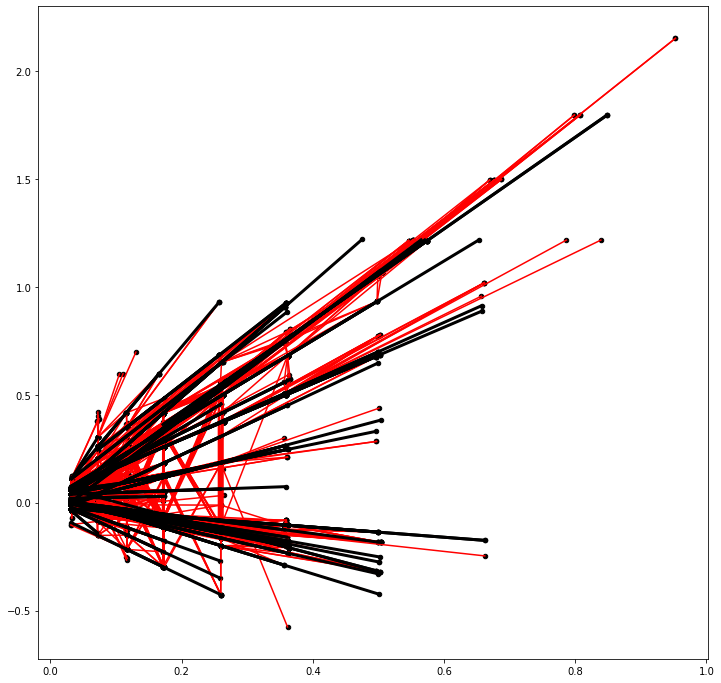

In [12]:
plt.figure(figsize=(12,12))
plt.plot(r[e[:, ~y]], z[e[:, ~y]], c='r', alpha=0.3 );
plt.plot(r[e[:, y]], z[e[:, y]], c='k', linewidth=3 );
plt.scatter(r[e], z[e], c='k', s=20);

In [ ]:
for data in model.trainset[:1000:50]:
    r, phi, z = data.x.T
    e = data.edge_index
    pid = data.pid
    y = pid[e[0]] == pid[e[1]]
    
    plt.figure(figsize=(12,12))
    plt.plot(r[e[:, ~y]], z[e[:, ~y]], c='r', alpha=0.3 );
    plt.plot(r[e[:, y]], z[e[:, y]], c='k', linewidth=3 );
    plt.scatter(r[e], z[e], c='k', s=20);
    
    plt.pause(0.001)